Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(250)
%matplotlib inline

In [2]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
data

Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0     13500   23  46986   Diesel   90         1          0  2000      3   
1     13750   23  72937   Diesel   90         1          0  2000      3   
2     13950   24  41711   Diesel   90         1          0  2000      3   
3     14950   26  48000   Diesel   90         0          0  2000      3   
4     13750   30  38500   Diesel   90         0          0  2000      3   
...     ...  ...    ...      ...  ...       ...        ...   ...    ...   
1431   7500   69  20544   Petrol   86         1          0  1300      3   
1432  10845   72  19000   Petrol   86         0          0  1300      3   
1433   8500   71  17016   Petrol   86         0          0  1300      3   
1434   7250   70  16916   Petrol   86         1          0  1300      3   
1435   6950   76      1   Petrol  110         0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

In [4]:
data.describe()

Price          Age             KM           HP     MetColor  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.674791   
std     3626.964585    18.599988   37506.448872    14.981080     0.468616   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     1.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     1.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

         Automatic           CC        Doors      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      0.055710  1566.827994     4.033426  1072.45961  
std       0.229441   187.182436     0.952677    52.64112  
min       0.000000  1300.000000     2.000000  1000.00000  
25%       0.000000  1400.000000     3.000000  1040.00000  
50%       0.000000  1600.000000     4.000000  1070.00000  
75%       0.000000  1600.000000     5.000000  1085.00000  
max       1.000000  2000.000000     5.000000  1615.00000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
data.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [7]:
data.corr()

Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.876590 -0.569960  0.314990  0.108905   0.033081   
Age       -0.876590  1.000000  0.505672 -0.156622 -0.108150   0.031717   
KM        -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   
HP         0.314990 -0.156622 -0.333538  1.000000  0.058712   0.013144   
MetColor   0.108905 -0.108150 -0.080503  0.058712  1.000000  -0.019335   
Automatic  0.033081  0.031717 -0.081854  0.013144 -0.019335   1.000000   
CC         0.165067 -0.133182  0.302150  0.050884  0.034921  -0.069321   
Doors      0.185326 -0.148359 -0.036197  0.092424  0.085243  -0.027654   
Weight     0.581198 -0.470253 -0.028598  0.089614  0.057929   0.057249   

                 CC     Doors    Weight  
Price      0.165067  0.185326  0.581198  
Age       -0.133182 -0.148359 -0.470253  
KM         0.302150 -0.036197 -0.028598  
HP         0.050884  0.092424  0.089614  
MetColor   0.034921  0.085243  0.057929  
Automatic -0.069321 -0.027654  0.057249  
CC         1.000000  0.126768  0.651450  
Doors      0.126768  1.000000  0.302618  
Weight     0.651450  0.302618  1.000000

<AxesSubplot:>

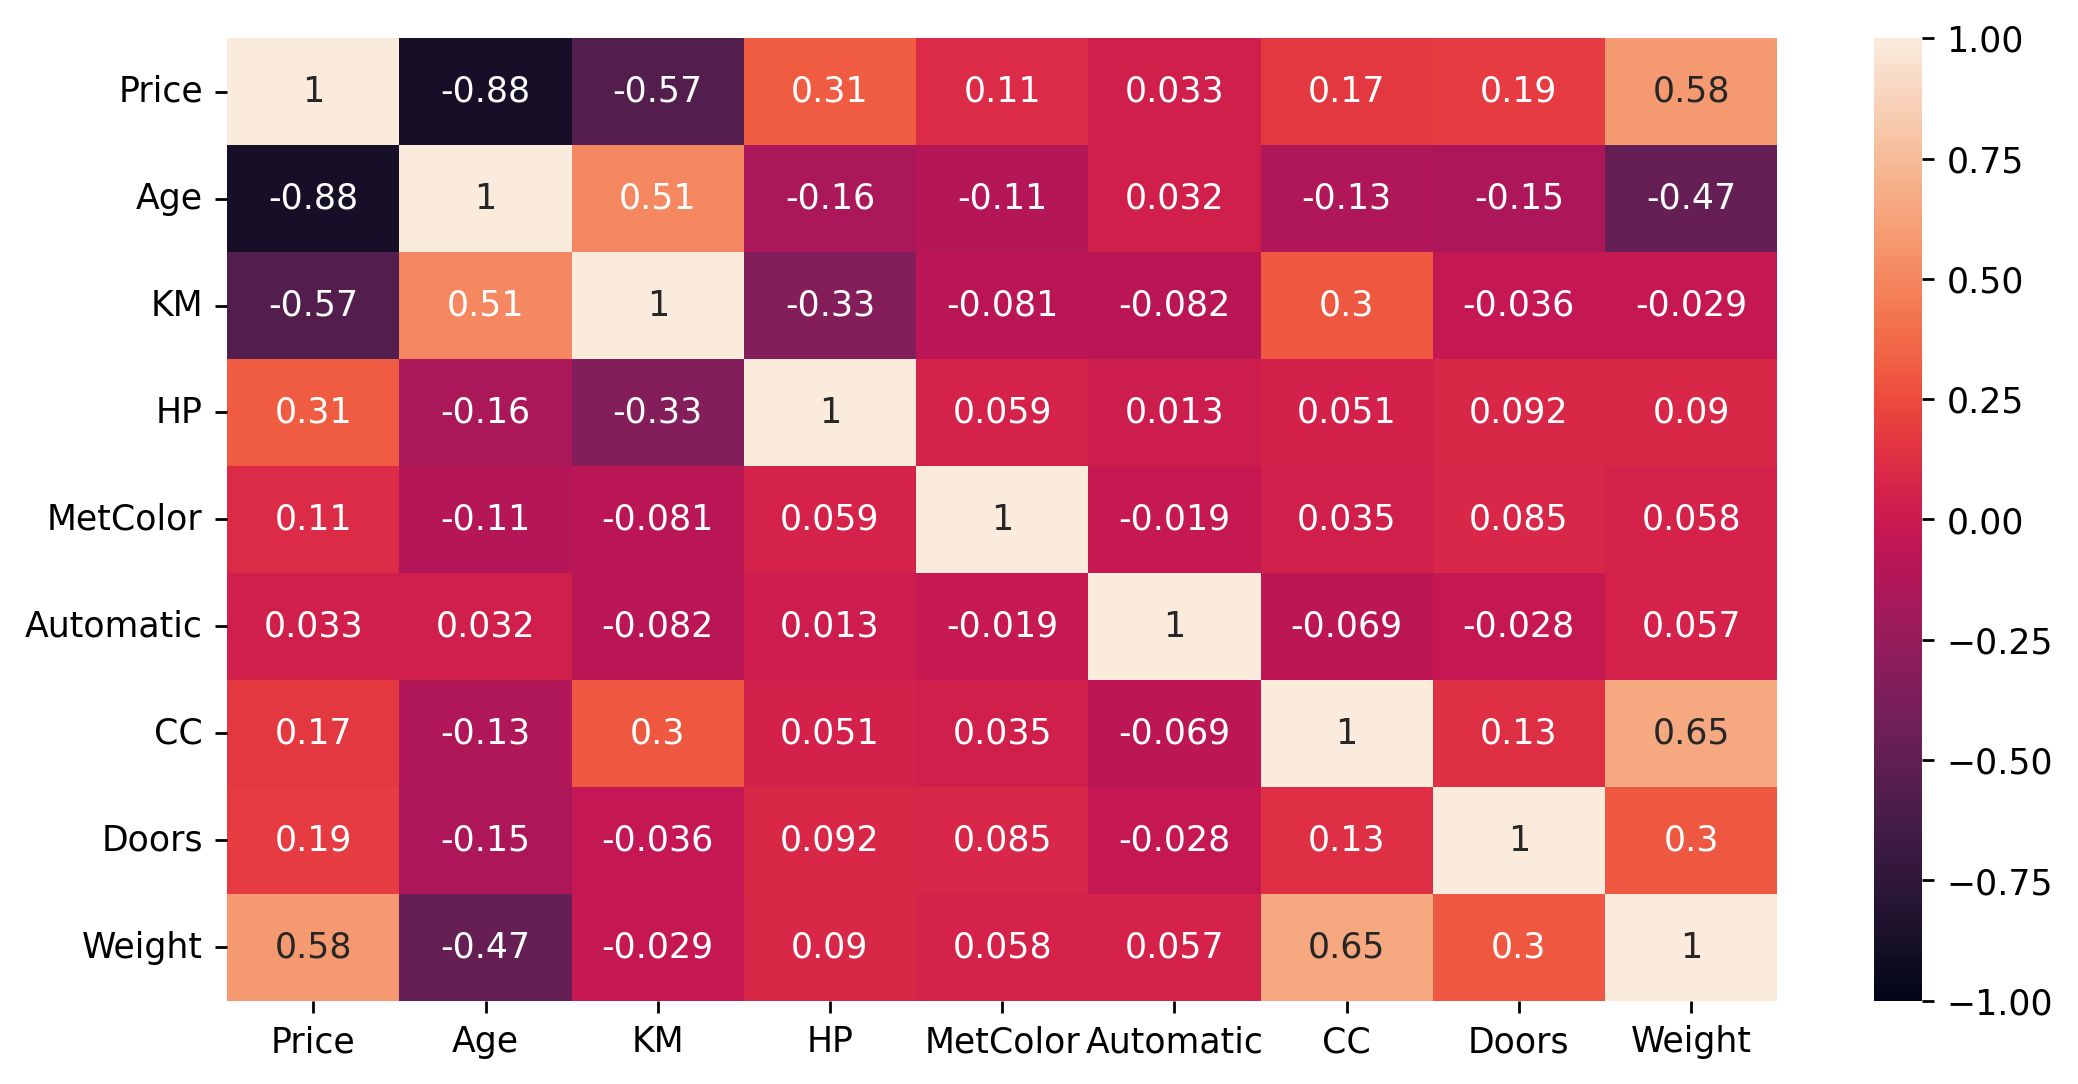

In [8]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

- heatmap show the correlation between the columns ,whenever there is high correlation between independent columns it shows presence of multicollinearity,to deal with multicollinearity we are developing multiple linear regression moddel.
- here 1 represent the 100% correlation between the columns.Heatmap shows that metcolor and weight have some correlation.

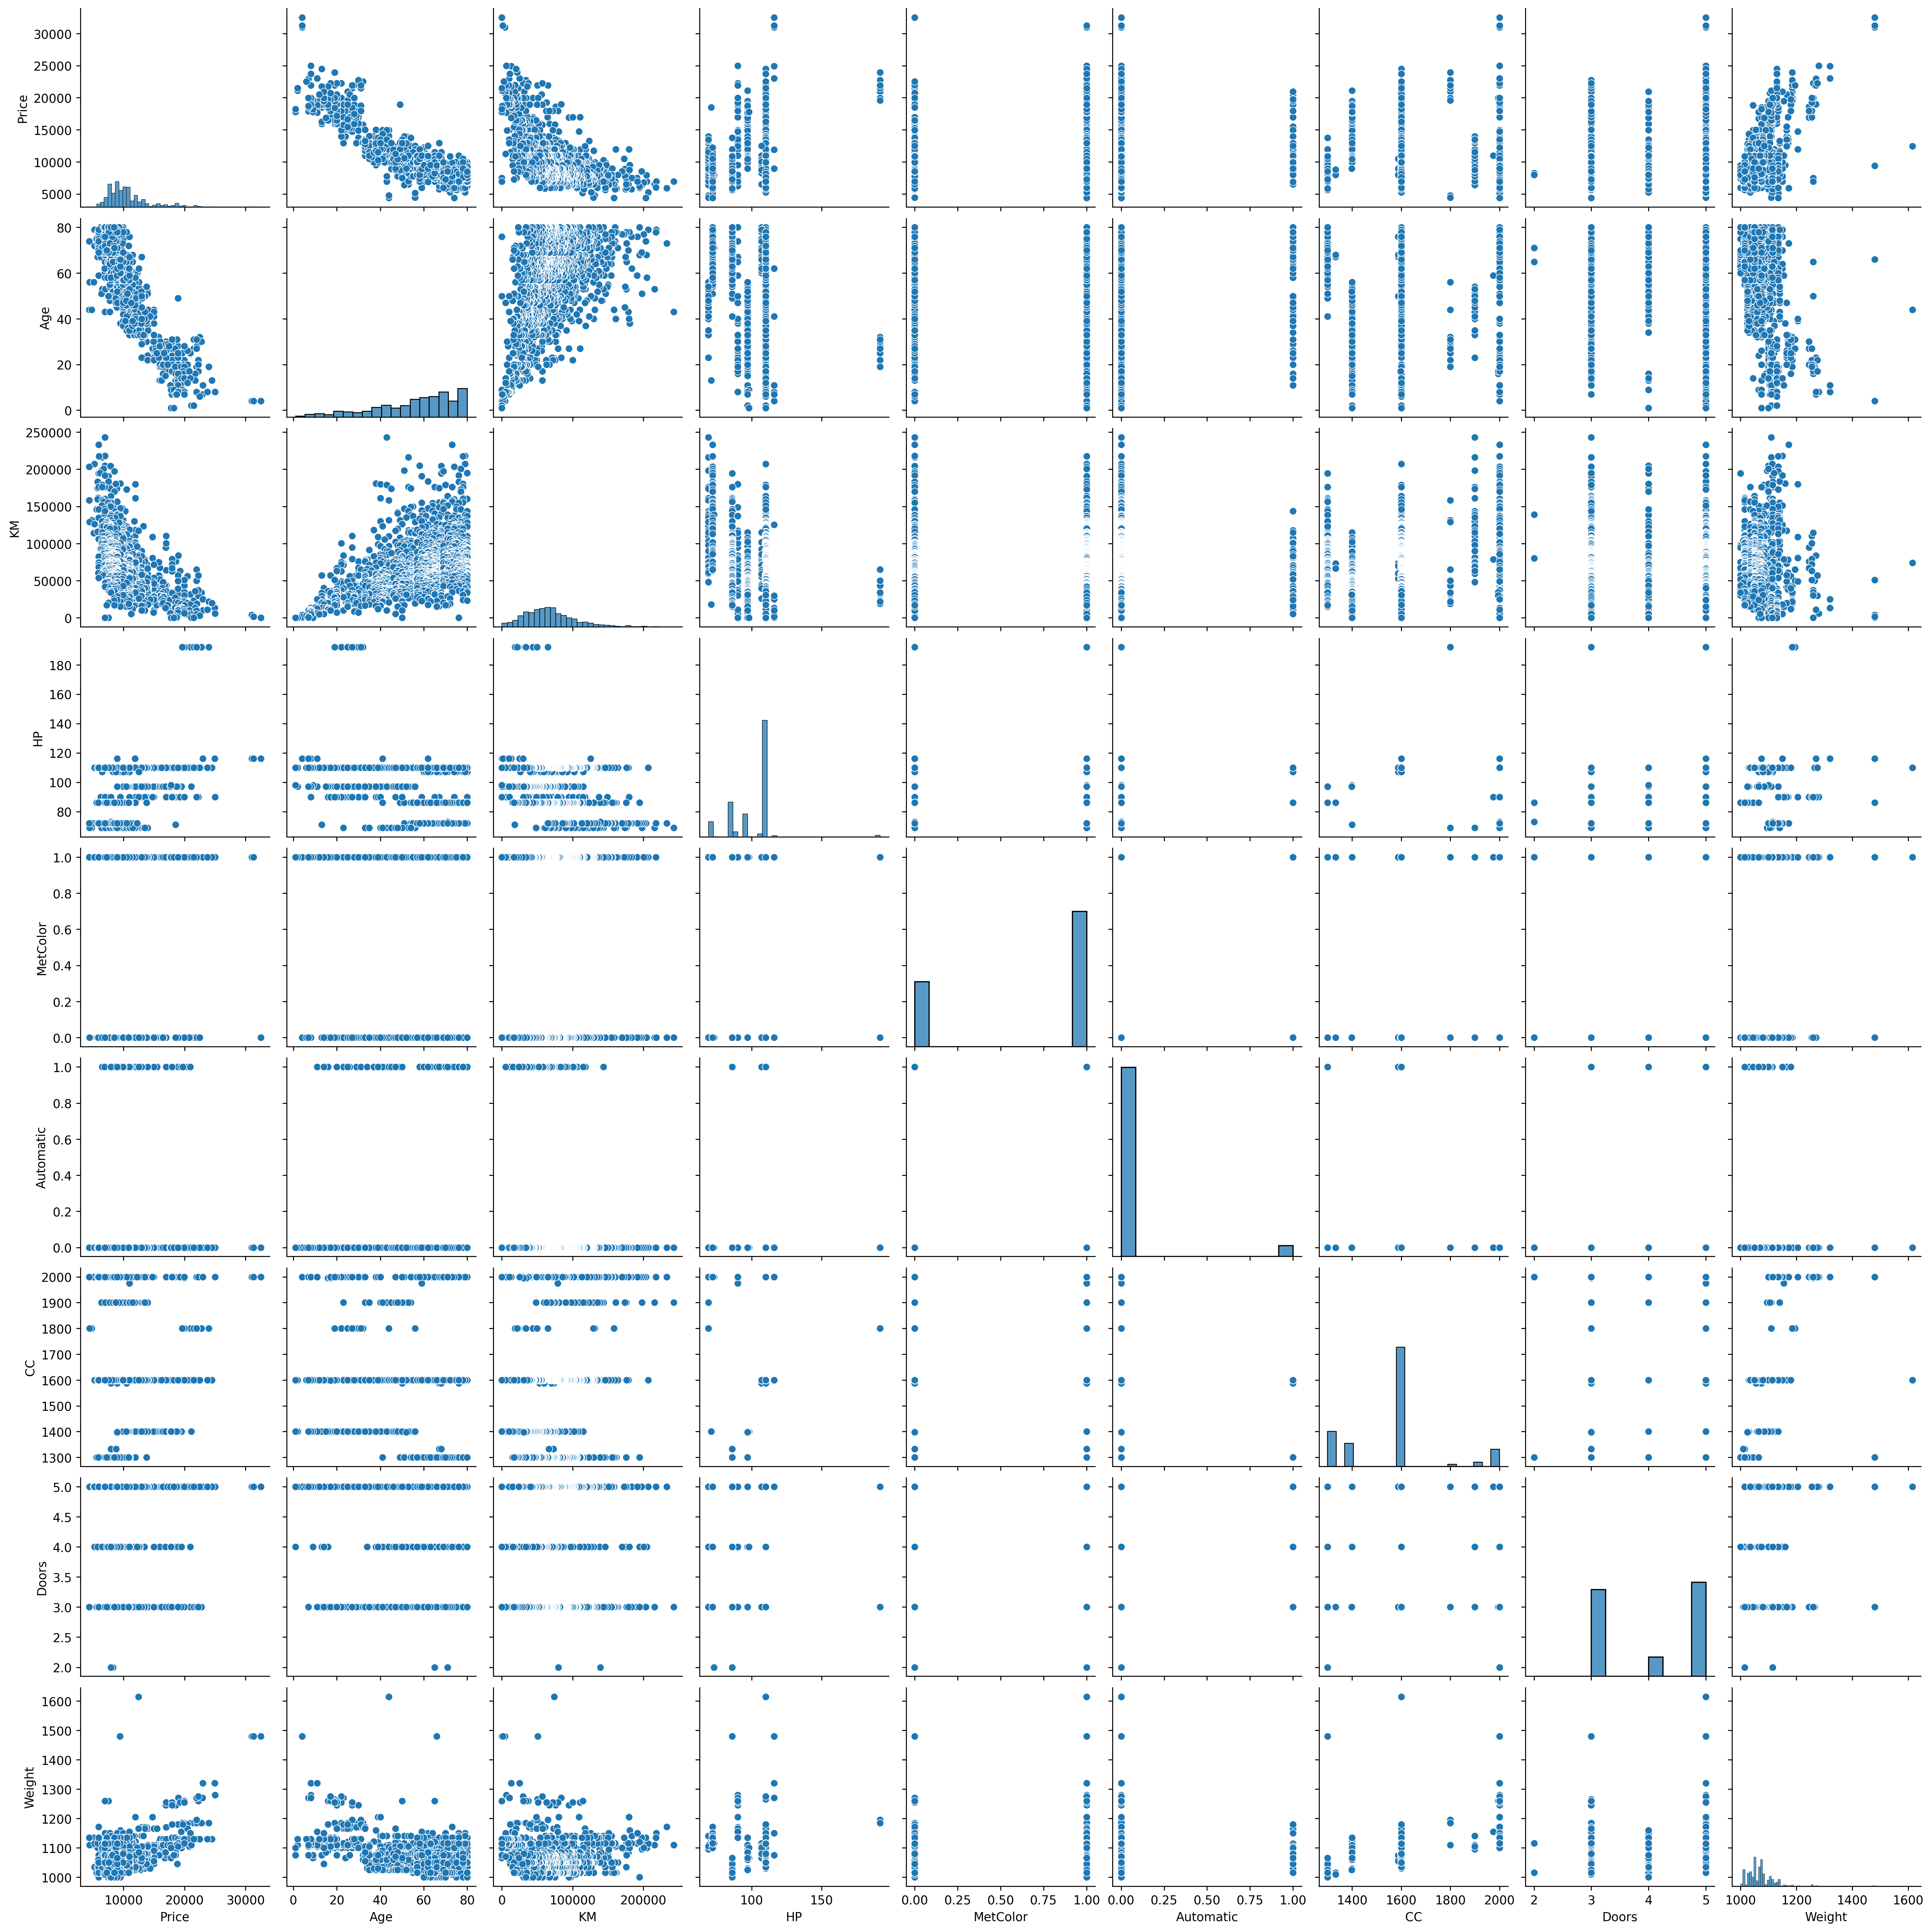

In [9]:
sns.pairplot(data)

- inference
- paiplot show the correlation between the columns

In [10]:
data['FuelType'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [11]:
data = pd.get_dummies(data,columns=['FuelType'])

In [12]:
data

Price  Age     KM   HP  MetColor  Automatic    CC  Doors  Weight  \
0     13500   23  46986   90         1          0  2000      3    1165   
1     13750   23  72937   90         1          0  2000      3    1165   
2     13950   24  41711   90         1          0  2000      3    1165   
3     14950   26  48000   90         0          0  2000      3    1165   
4     13750   30  38500   90         0          0  2000      3    1170   
...     ...  ...    ...  ...       ...        ...   ...    ...     ...   
1431   7500   69  20544   86         1          0  1300      3    1025   
1432  10845   72  19000   86         0          0  1300      3    1015   
1433   8500   71  17016   86         0          0  1300      3    1015   
1434   7250   70  16916   86         1          0  1300      3    1015   
1435   6950   76      1  110         0          0  1600      5    1114   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0                0                1                0  
1                0                1                0  
2                0                1                0  
3                0                1                0  
4                0                1                0  
...            ...              ...              ...  
1431             0                0                1  
1432             0                0                1  
1433             0                0                1  
1434             0                0                1  
1435             0                0                1  

[1436 rows x 12 columns]

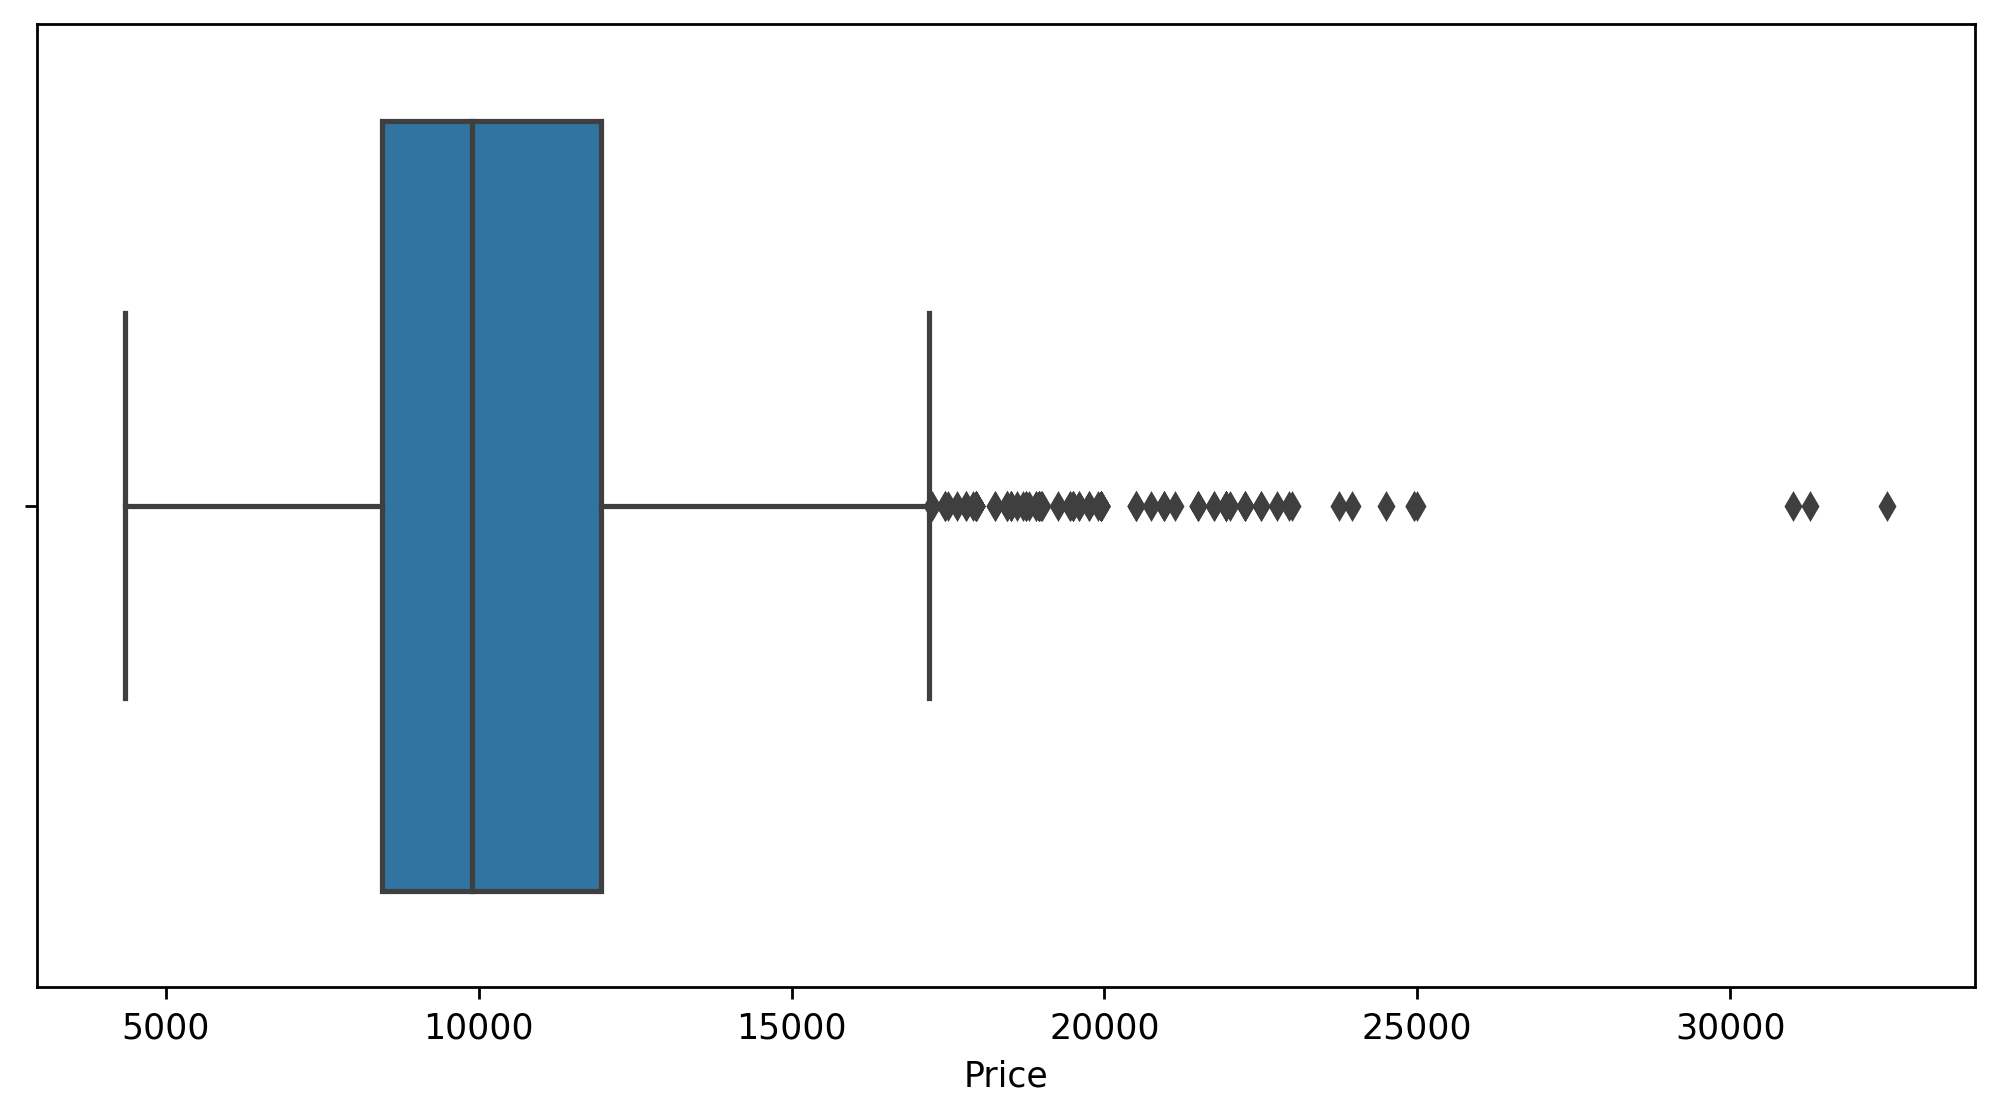

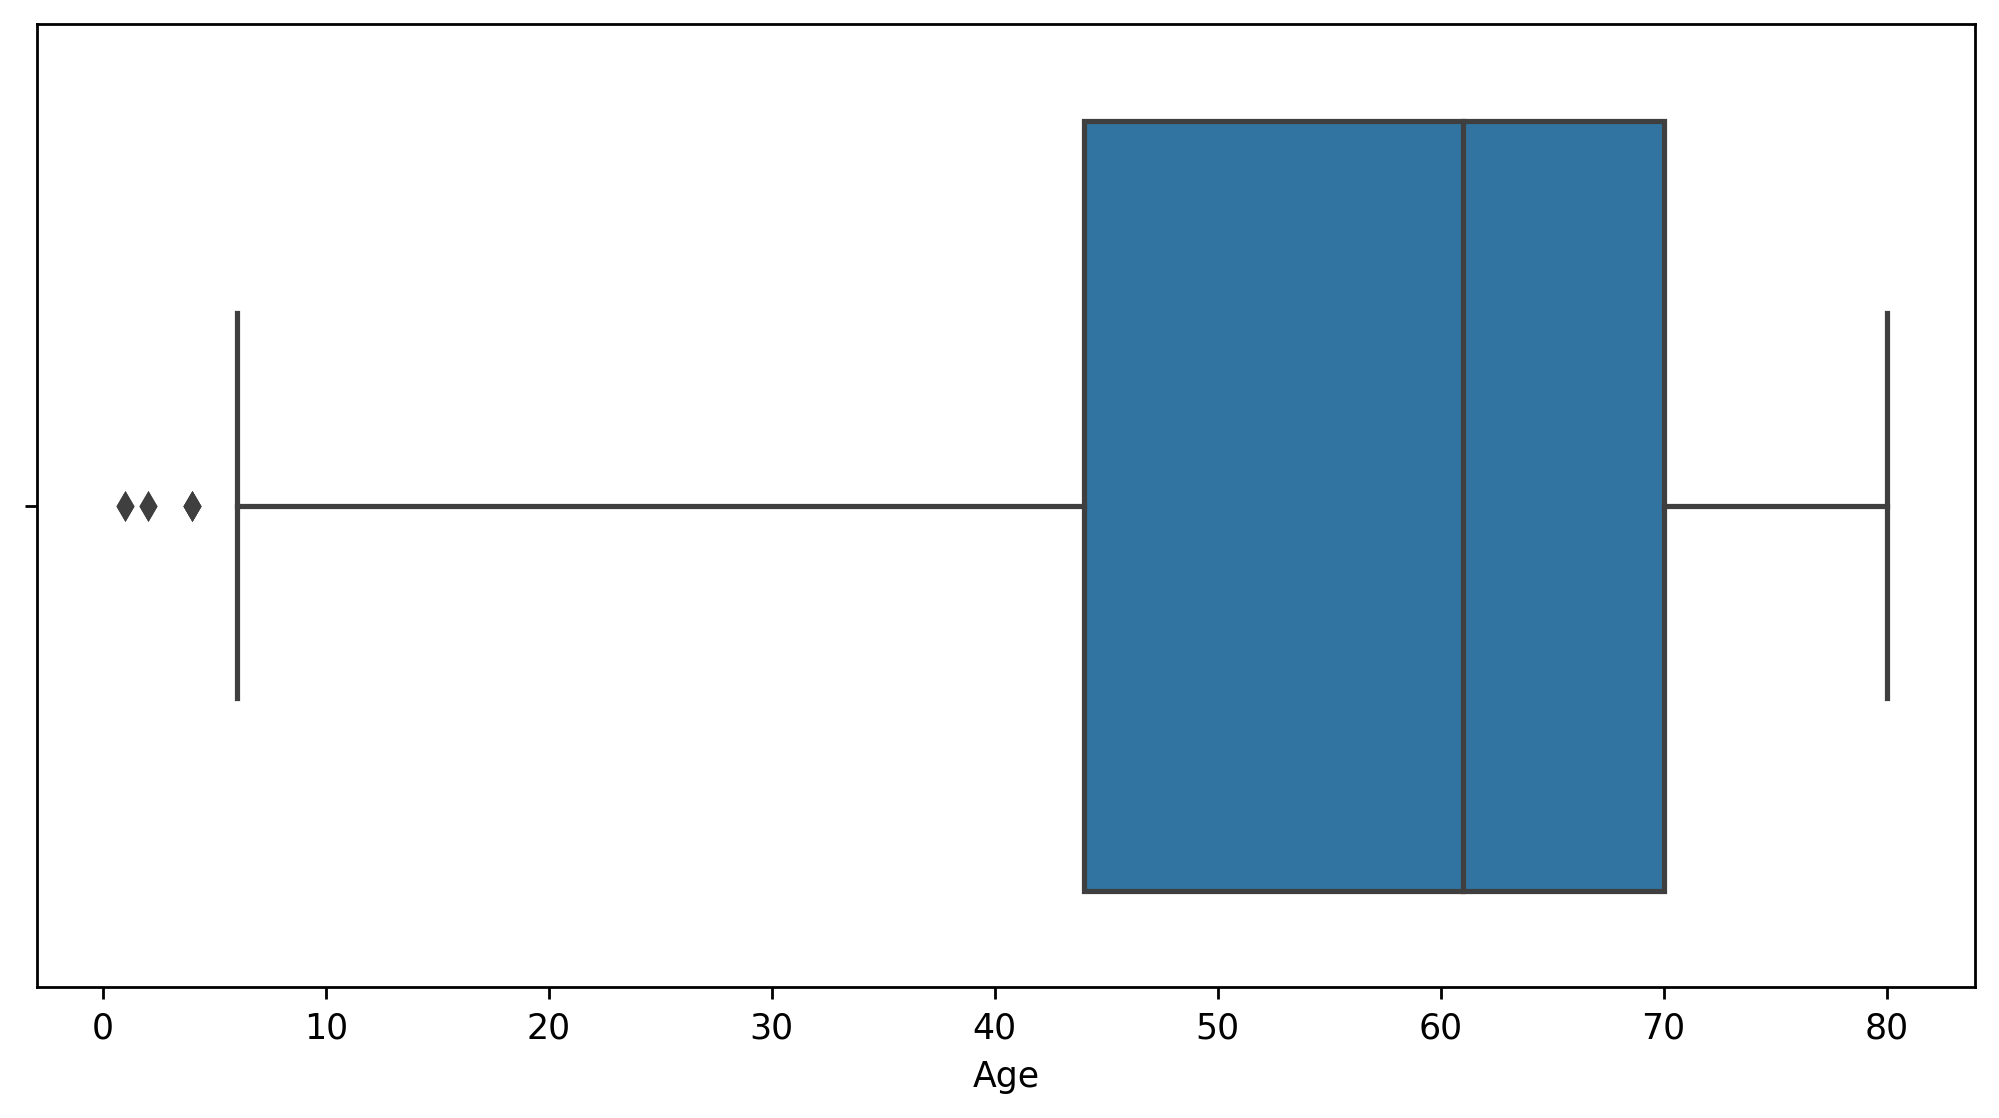

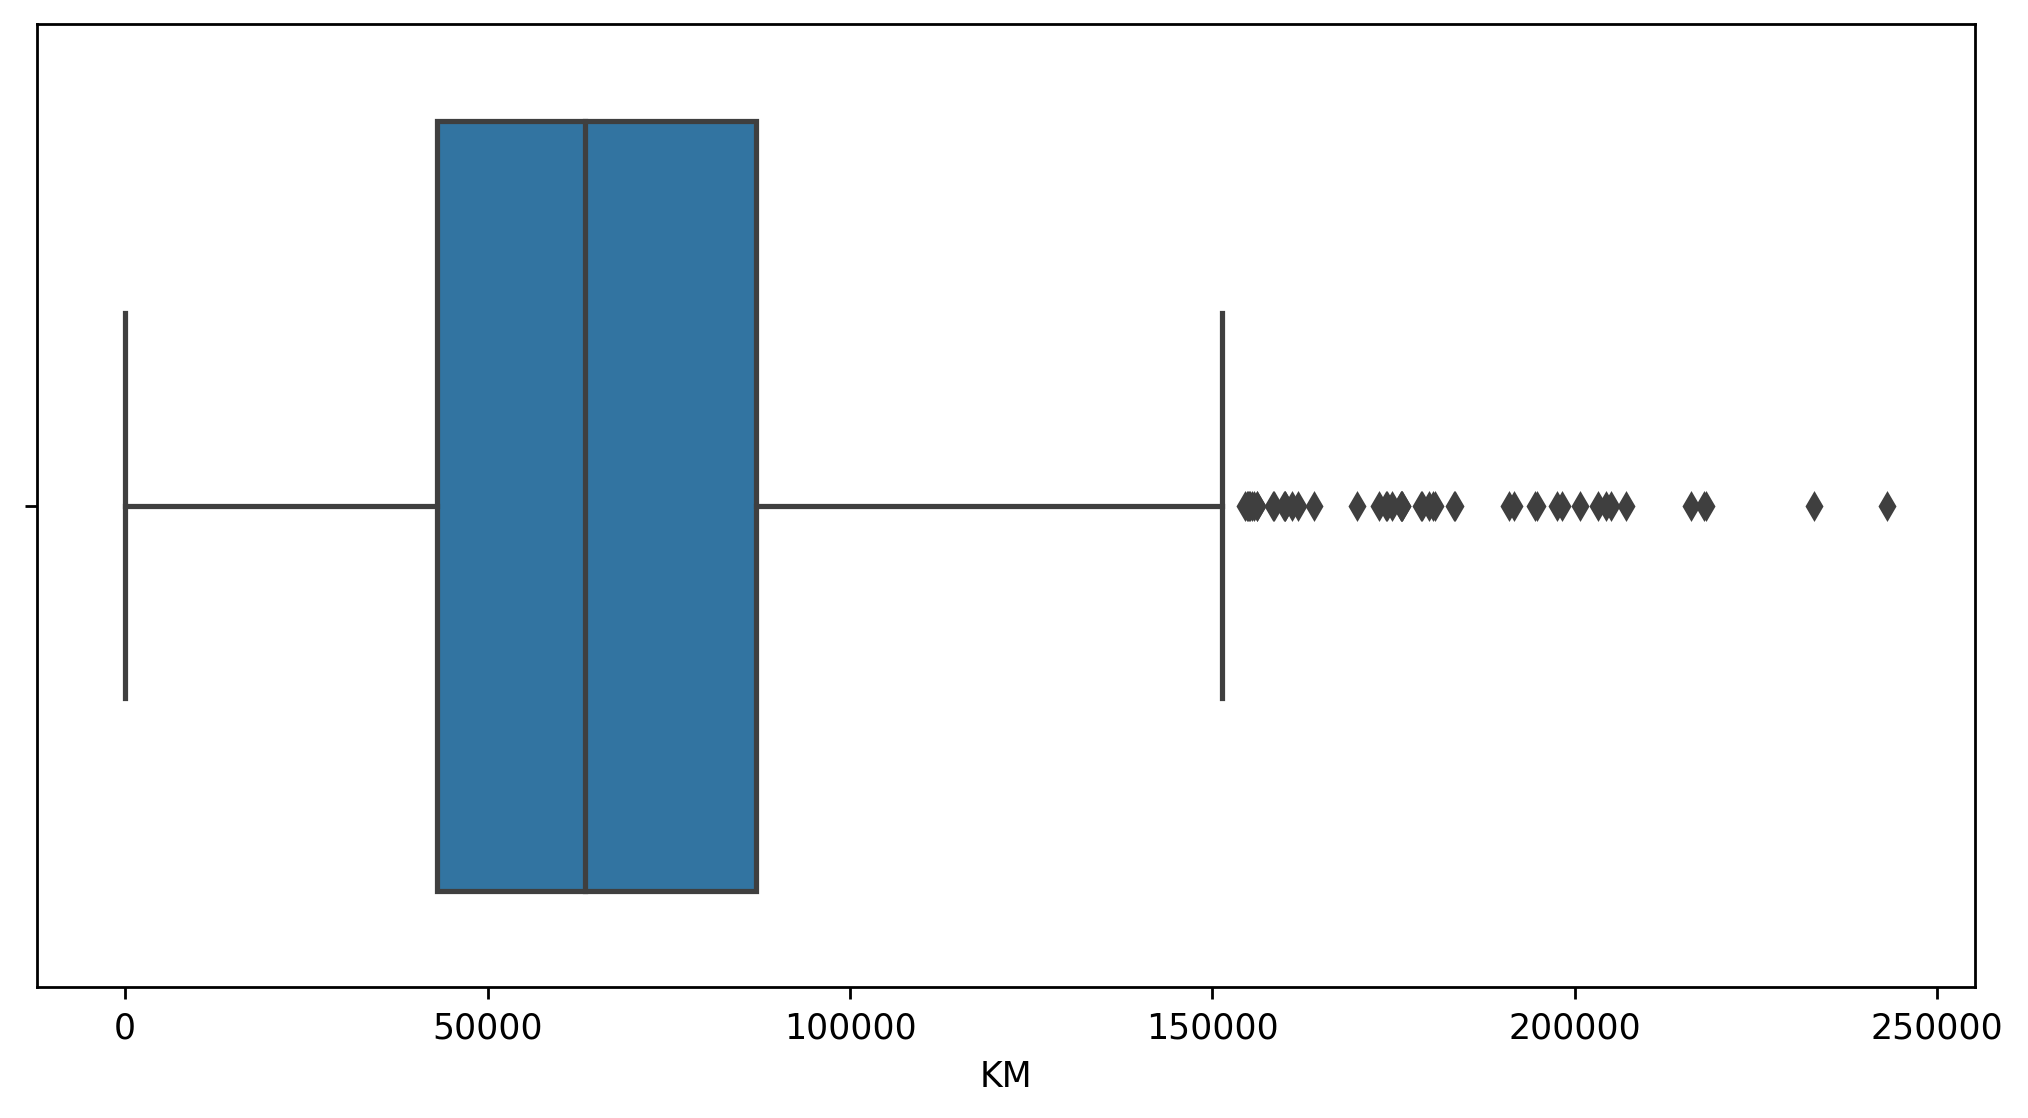

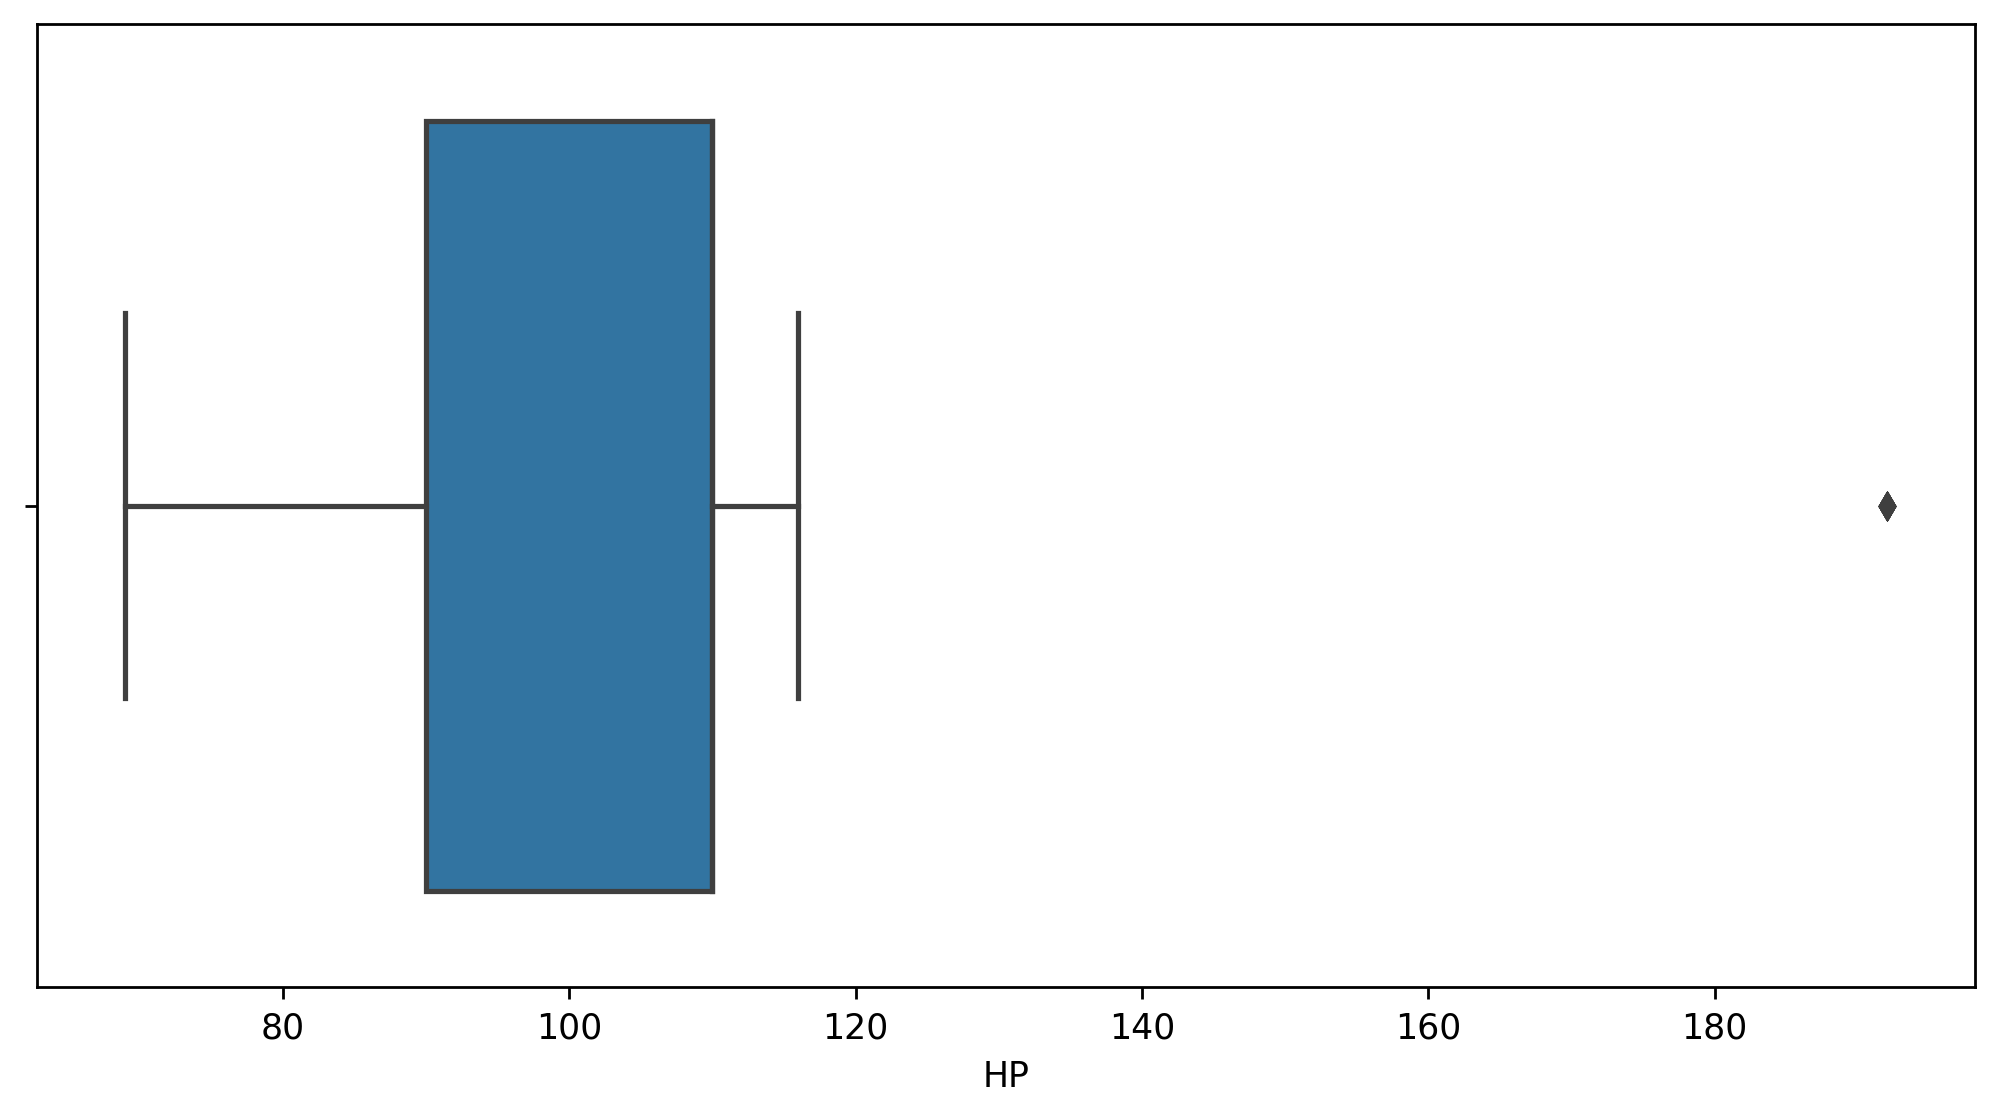

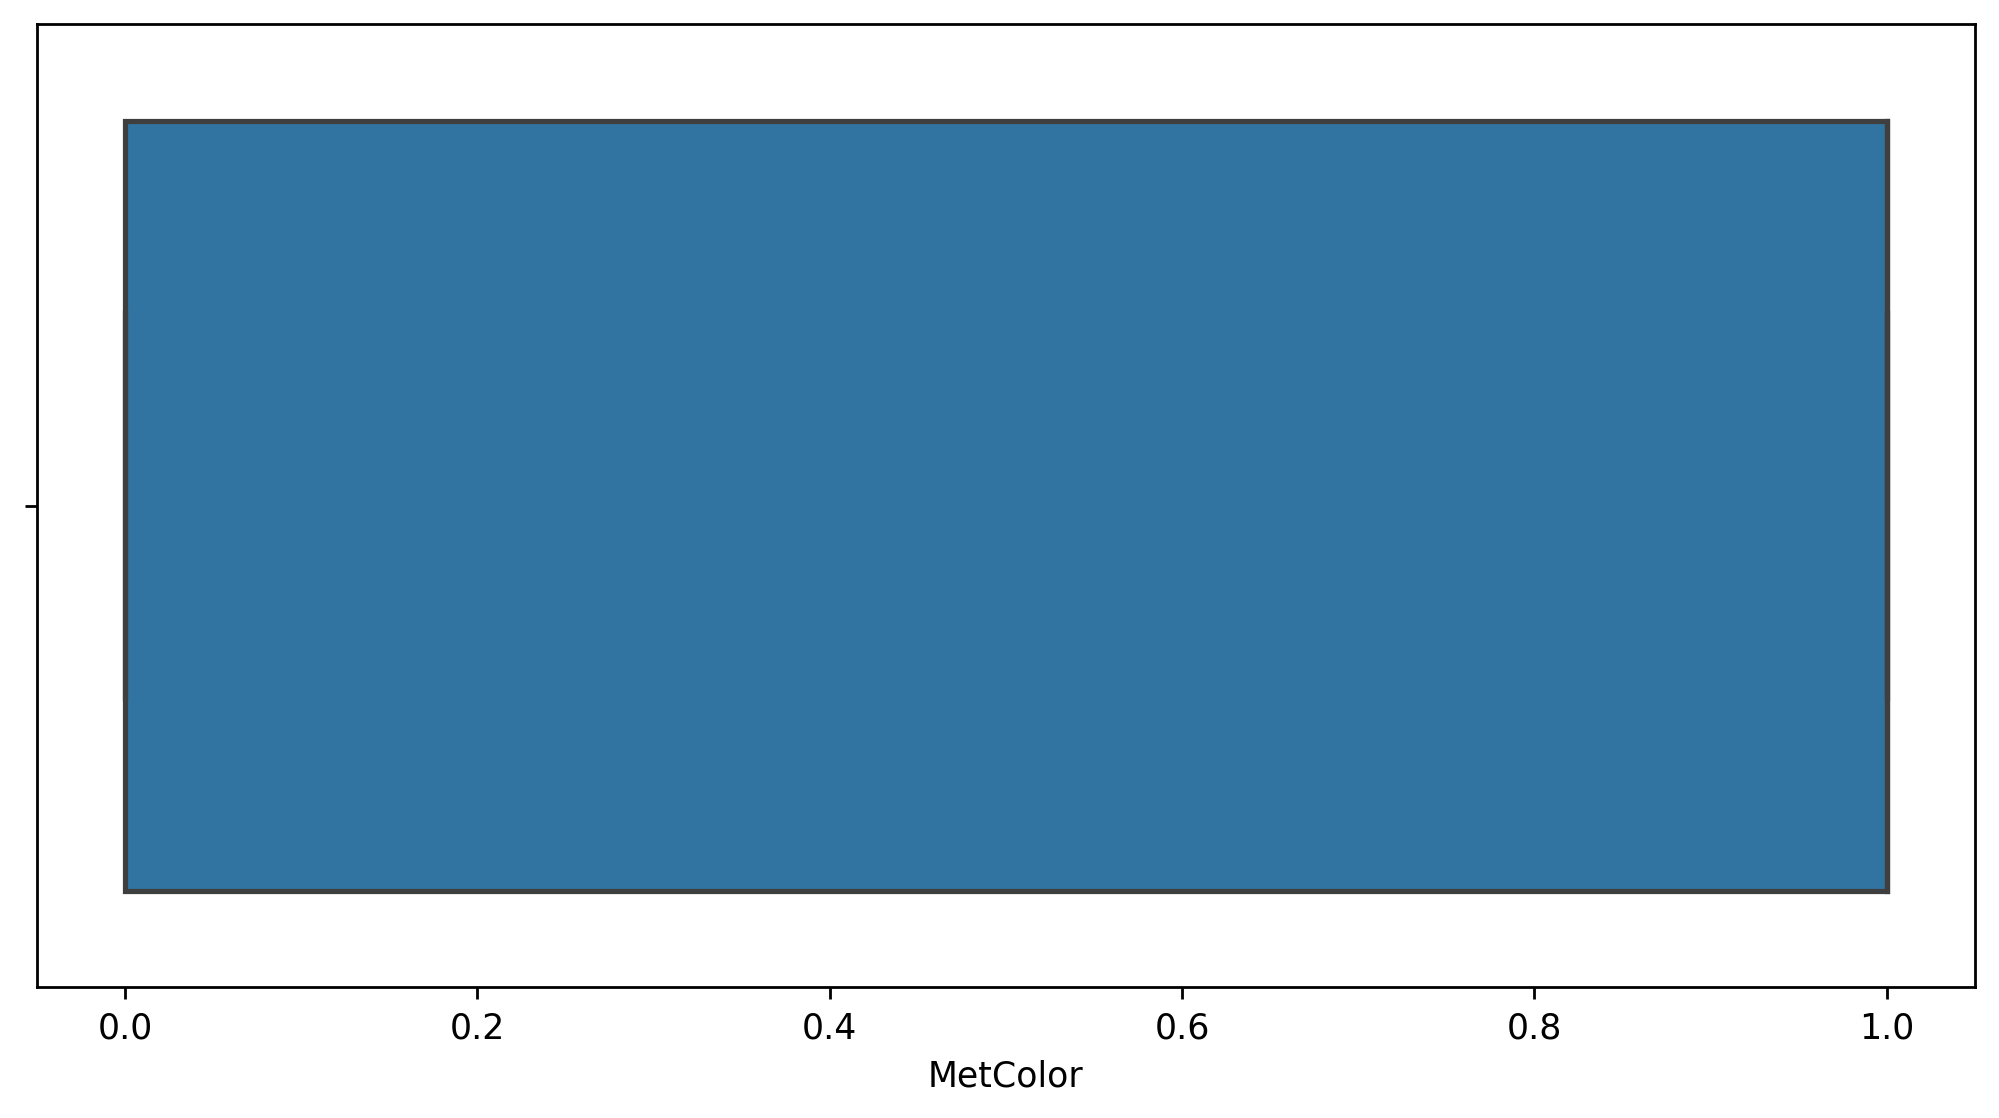

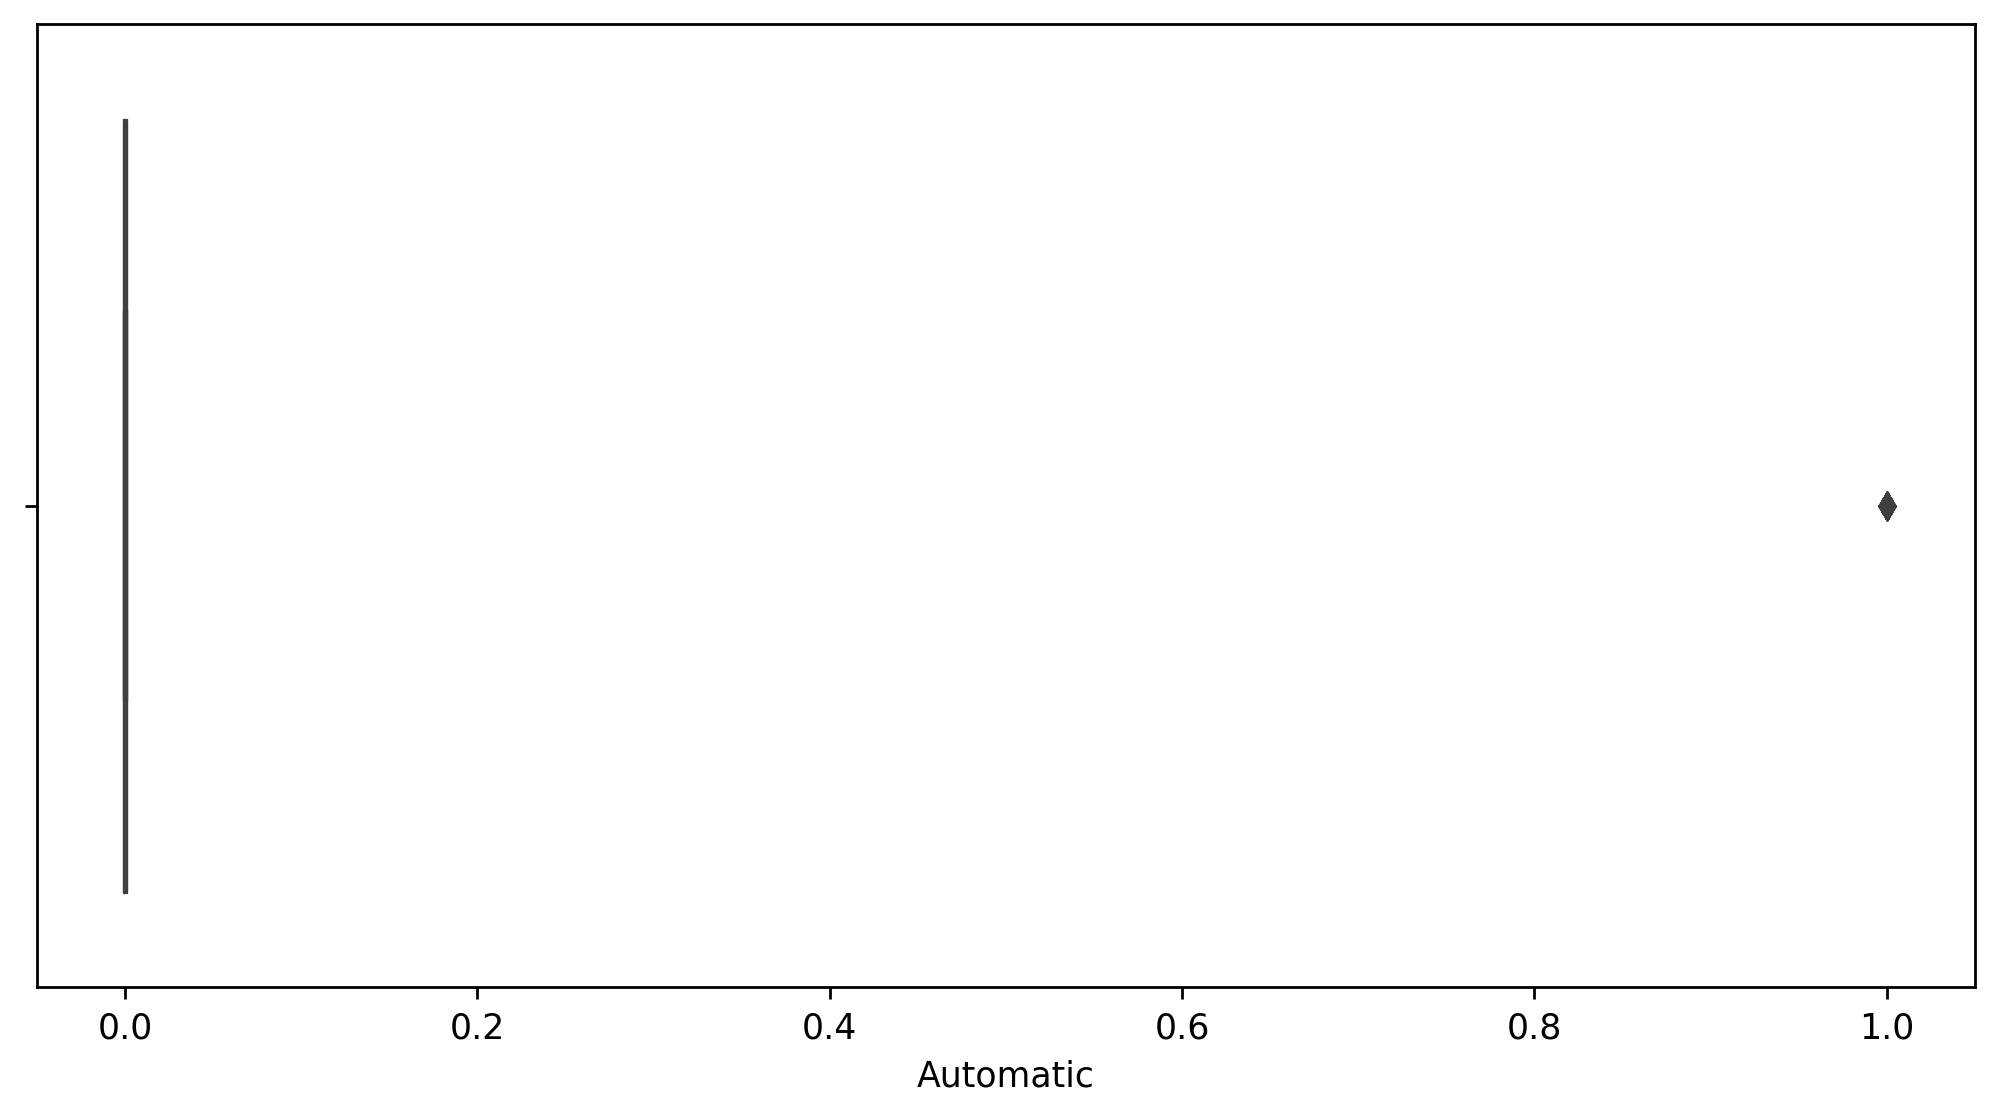

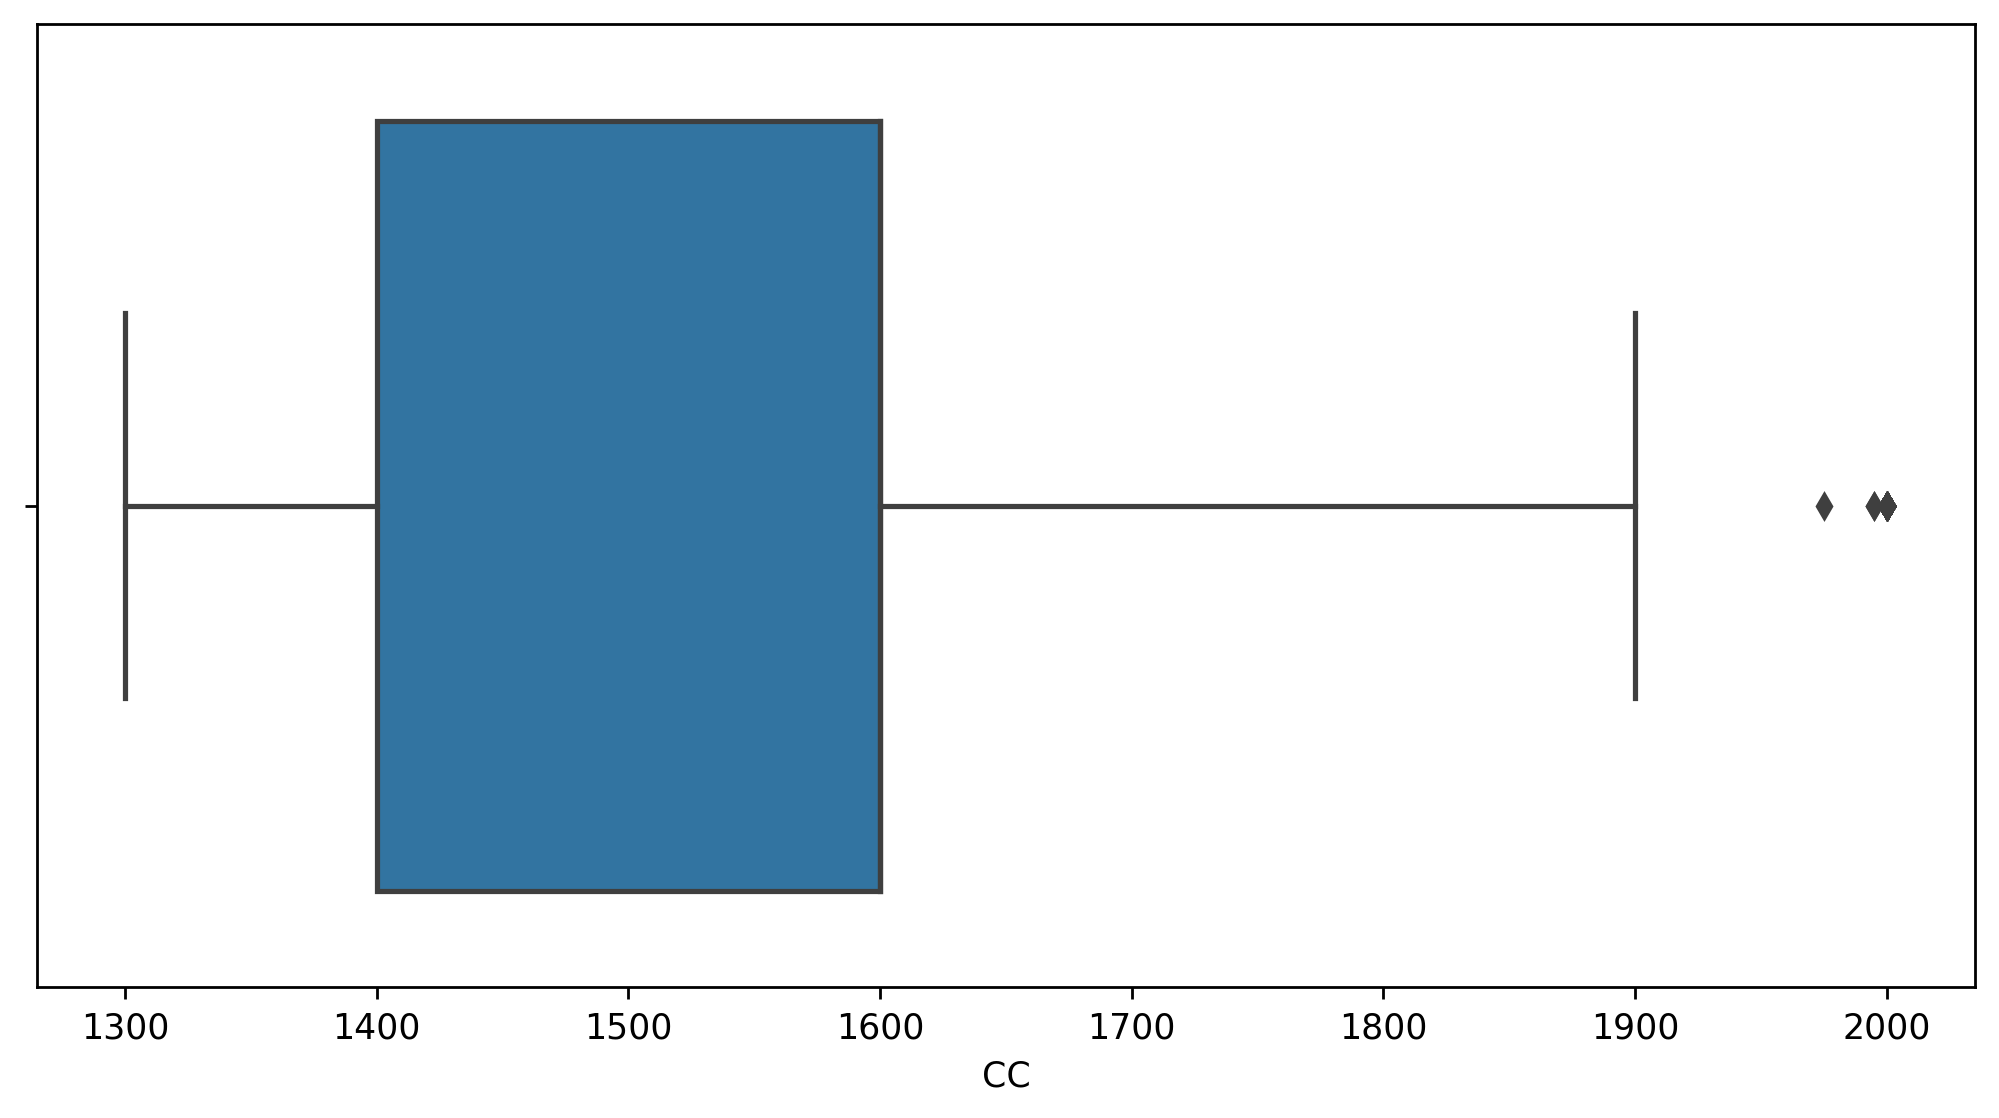

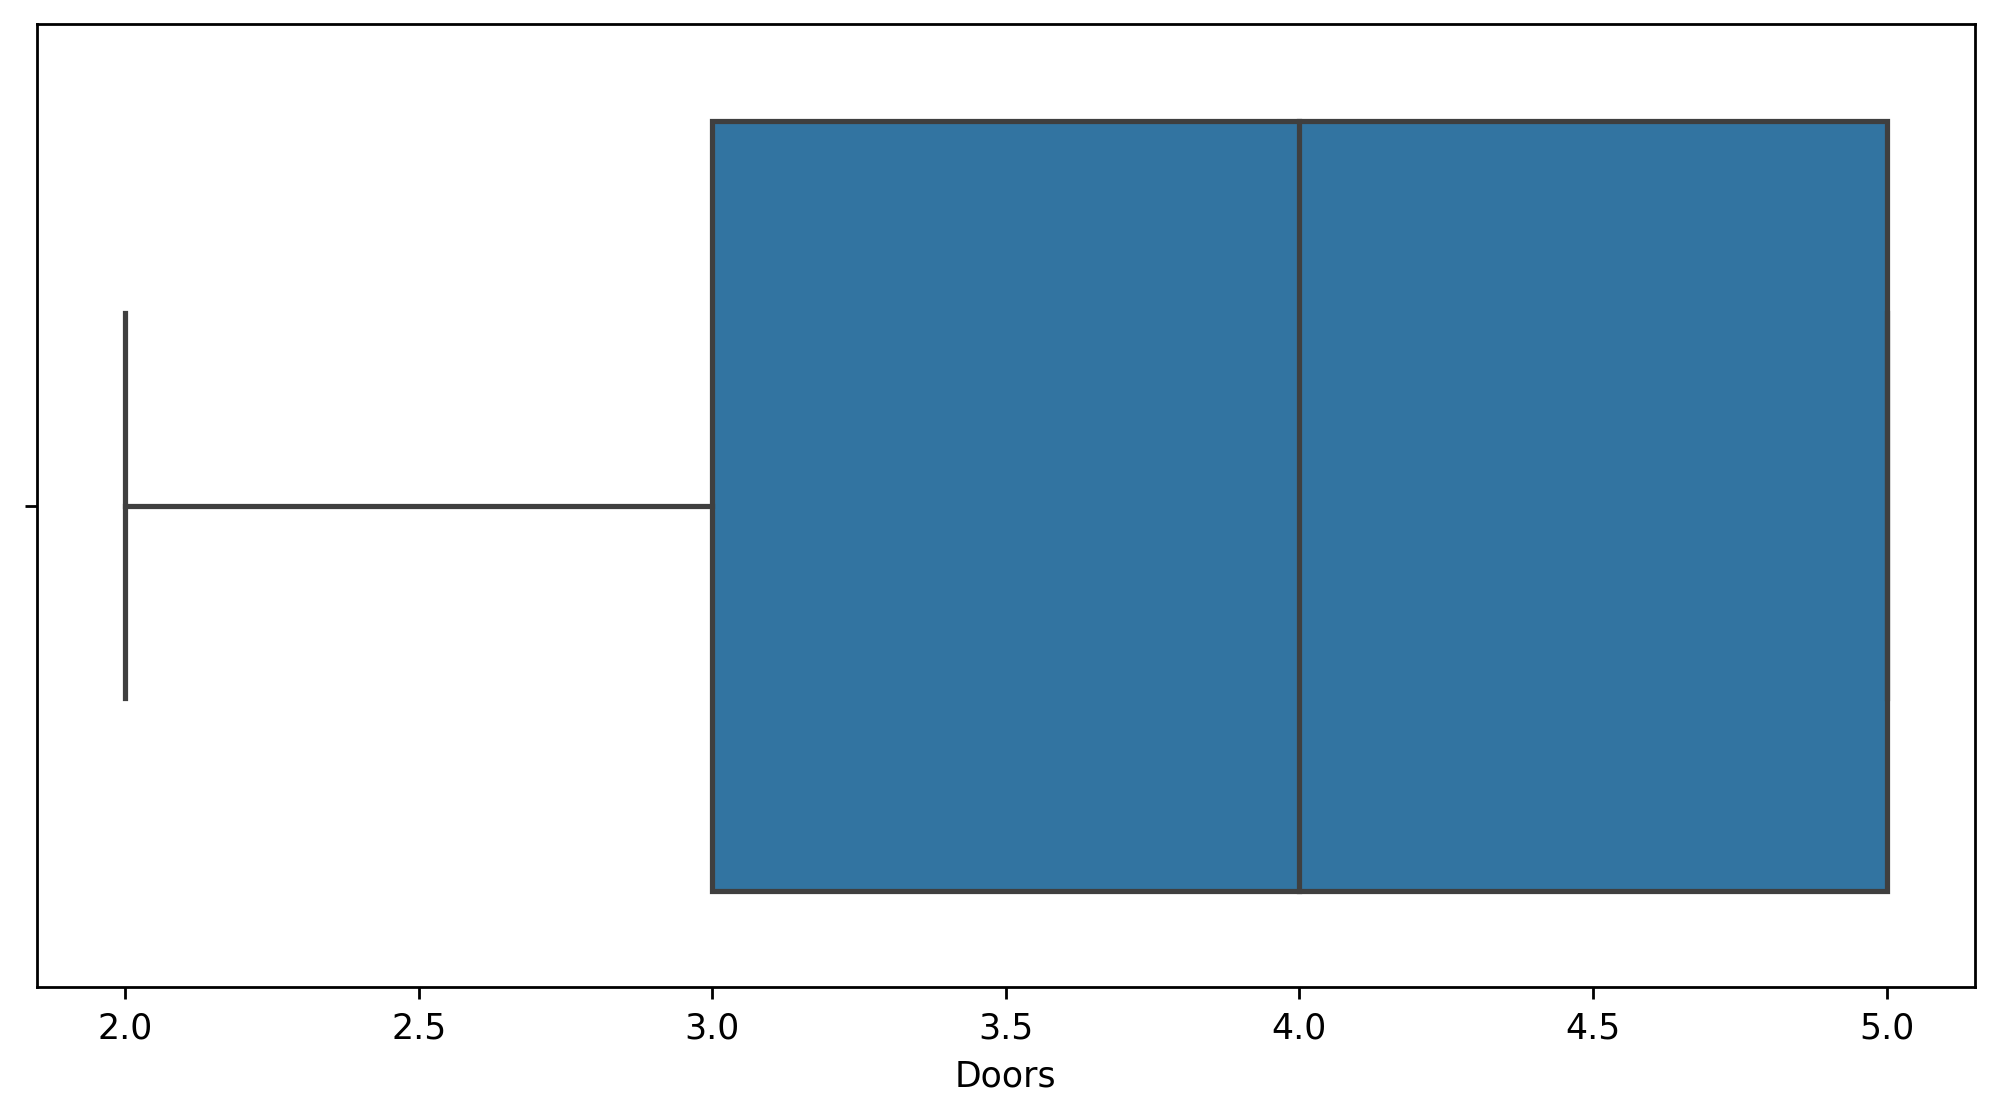

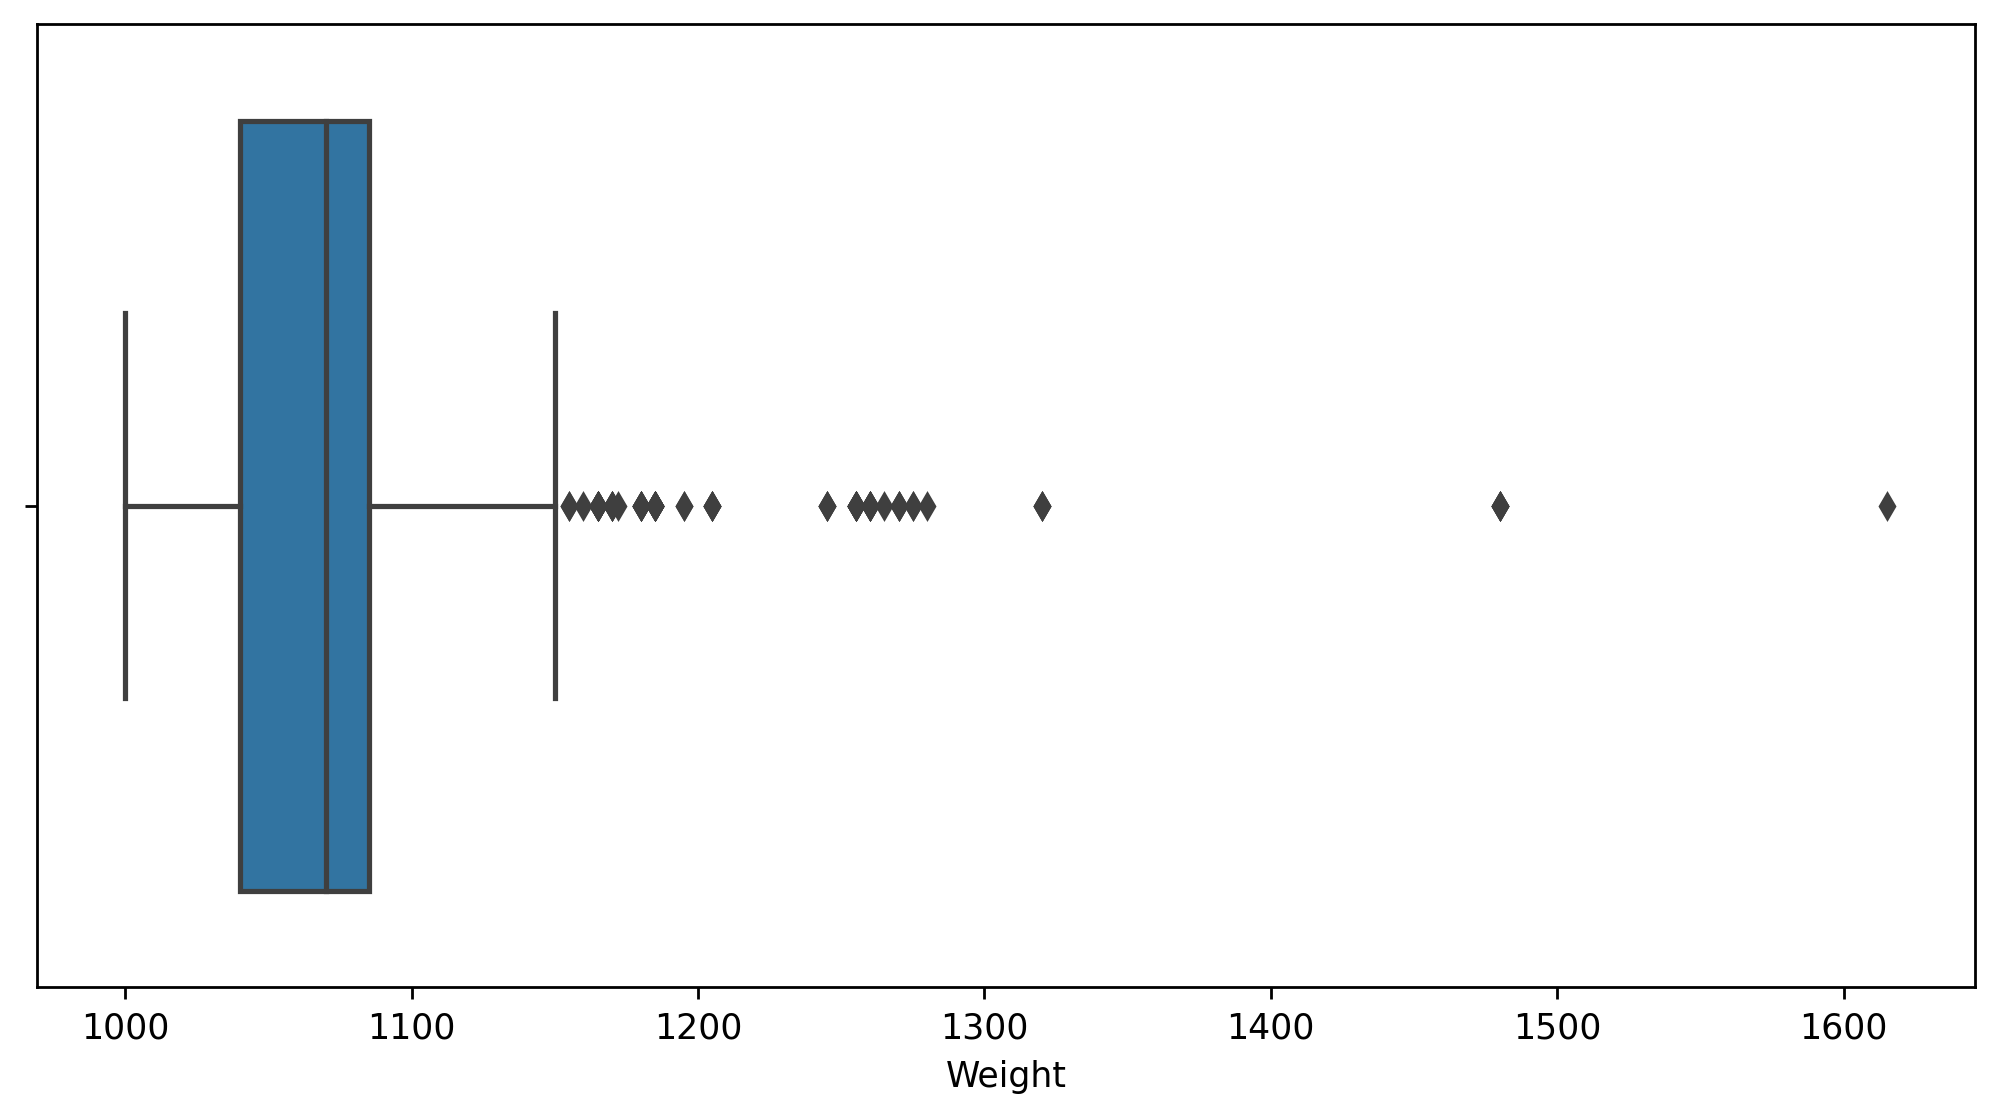

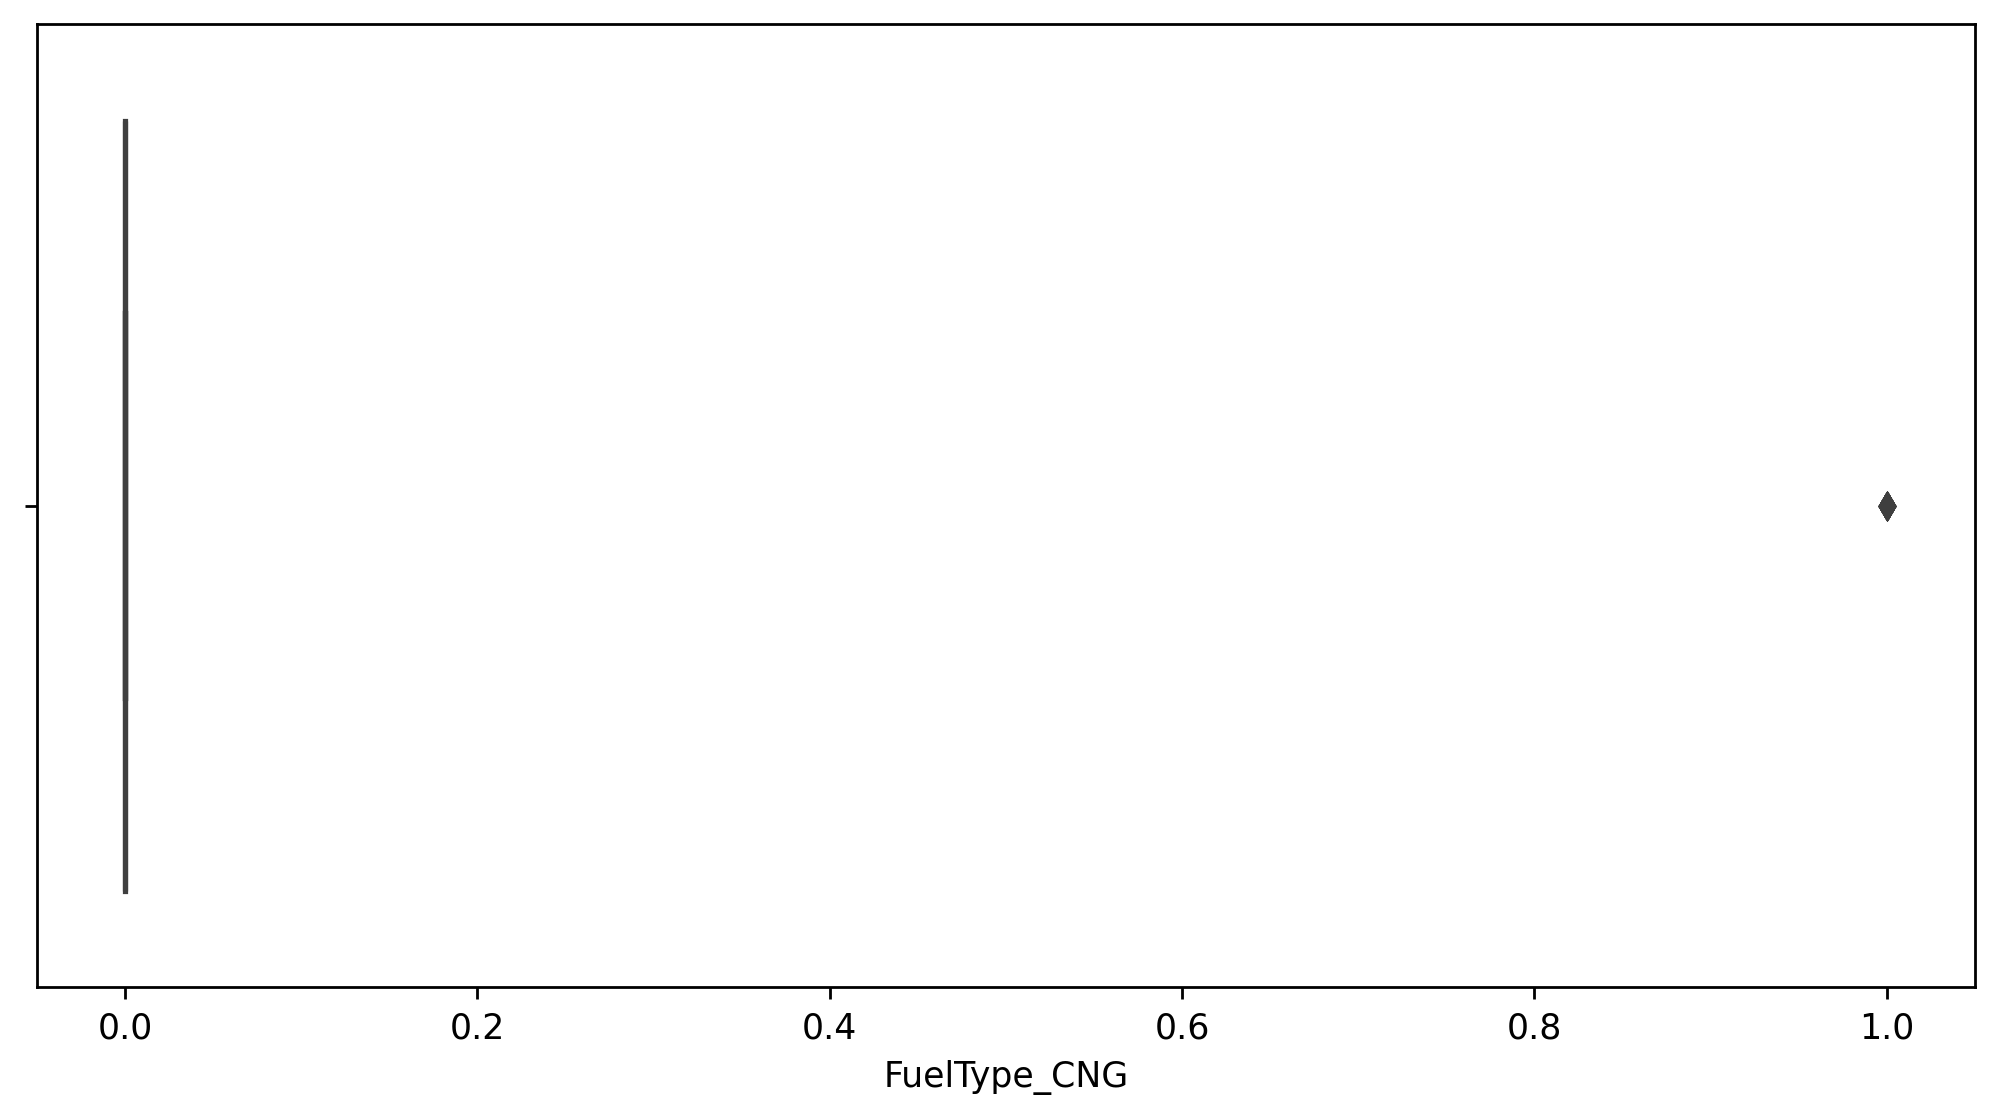

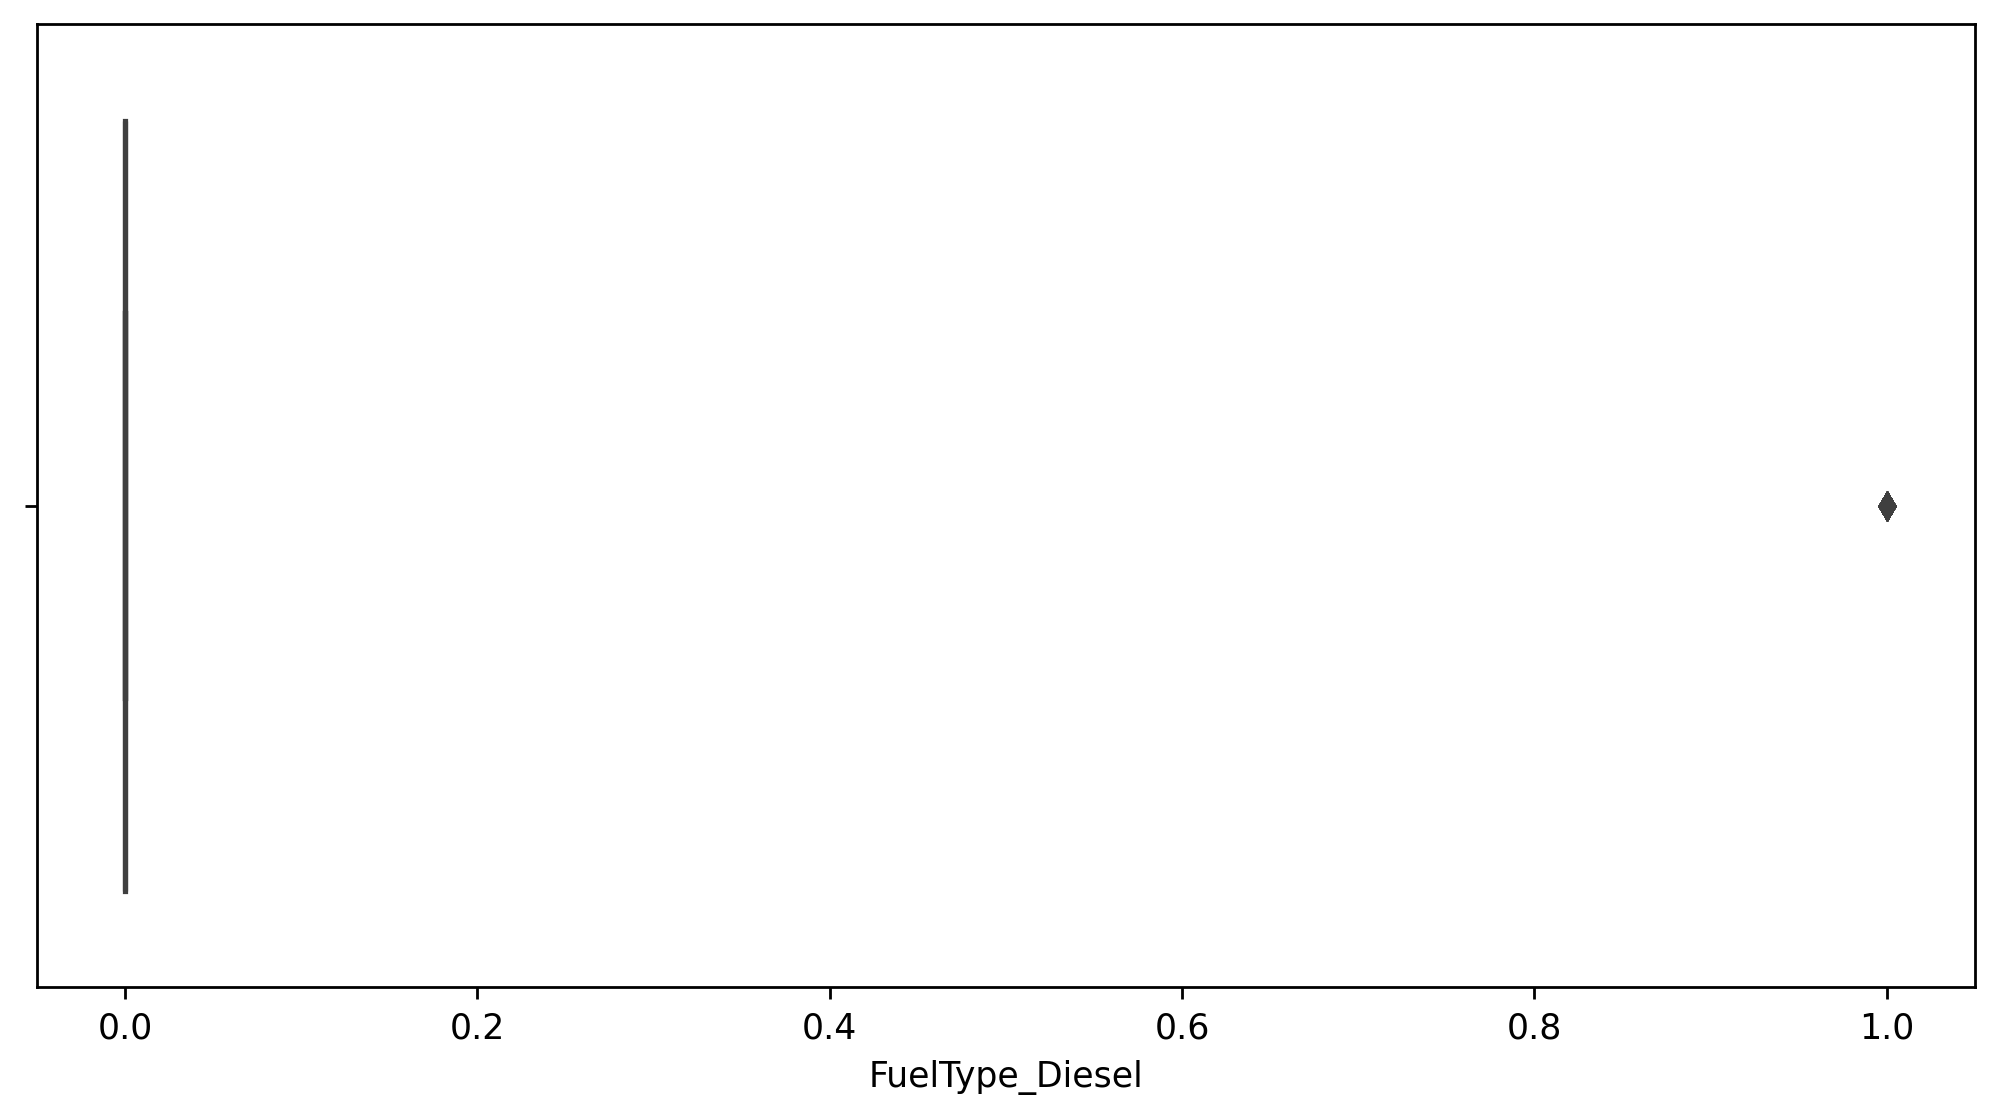

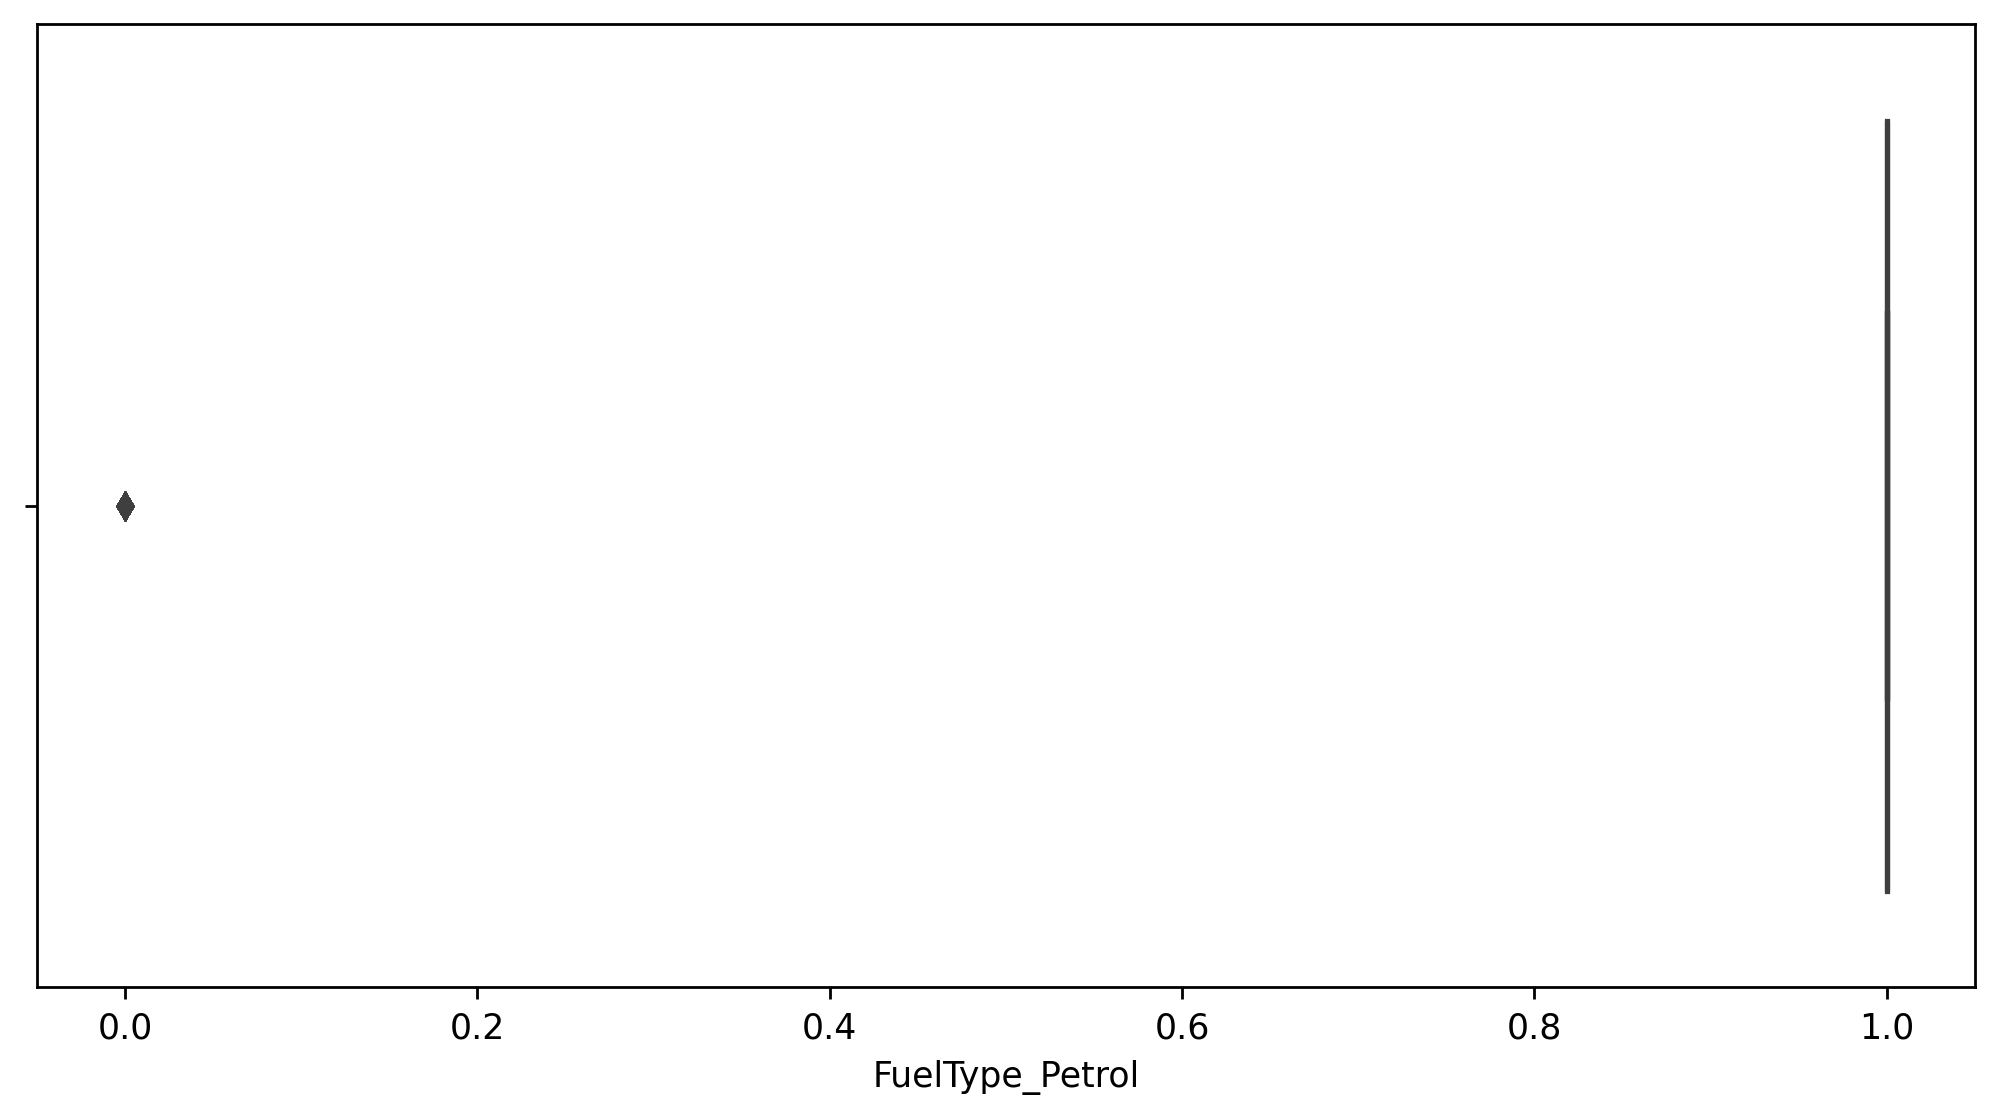

In [13]:
for i in data.columns:
    sns.boxplot(x=i,data=data)
    plt.show()
    

- Boxplot shows the presence of outlier into the columns.

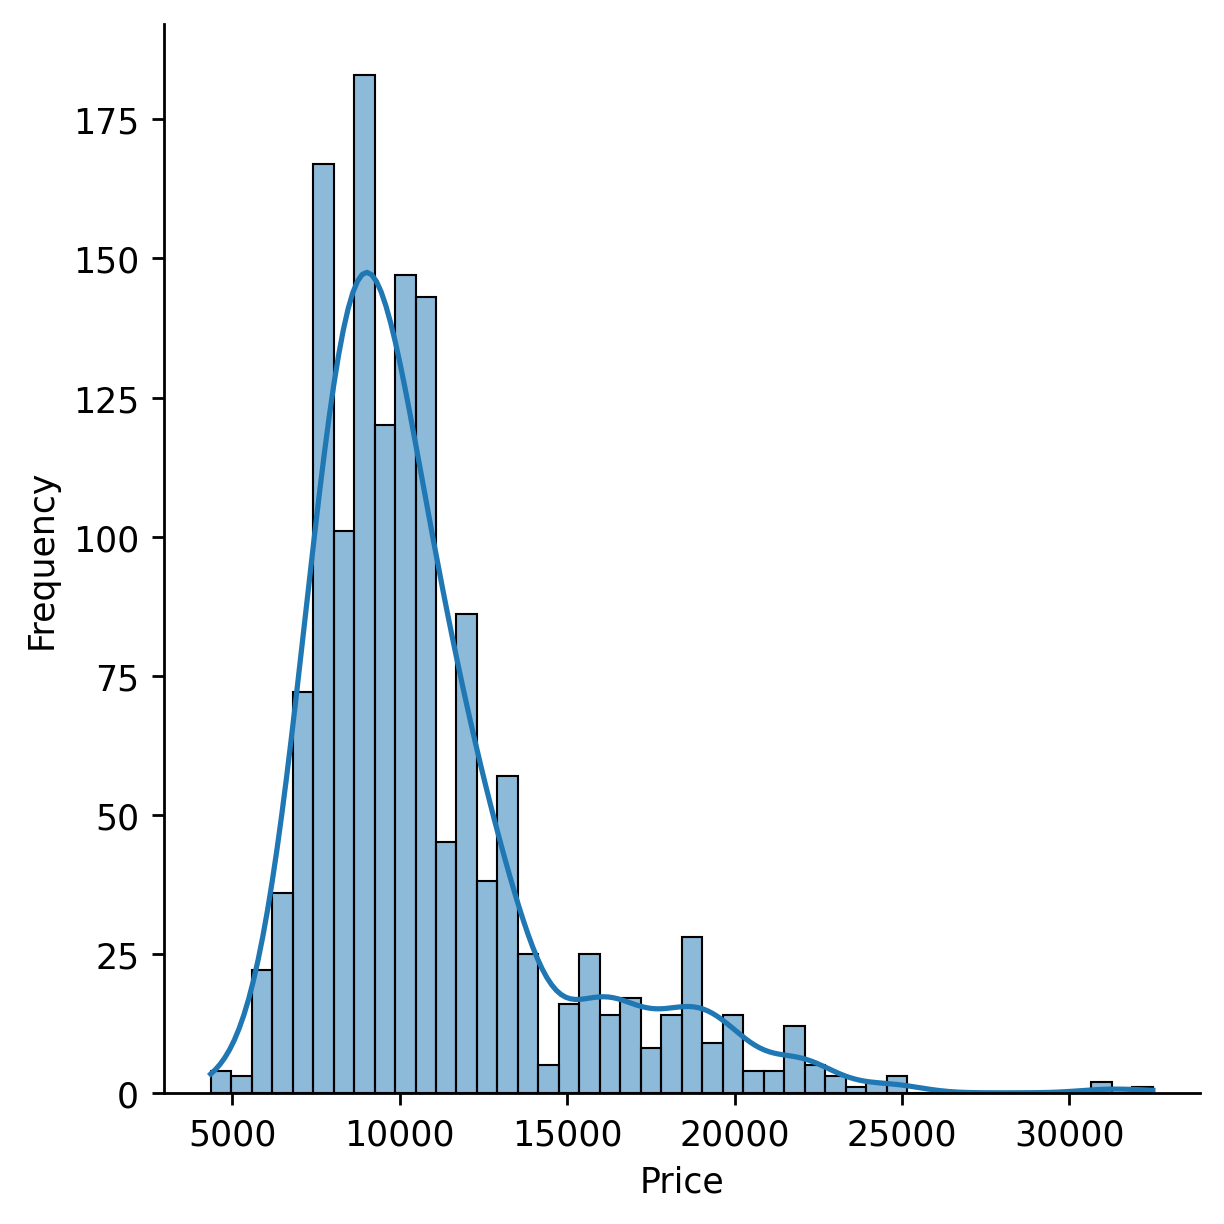

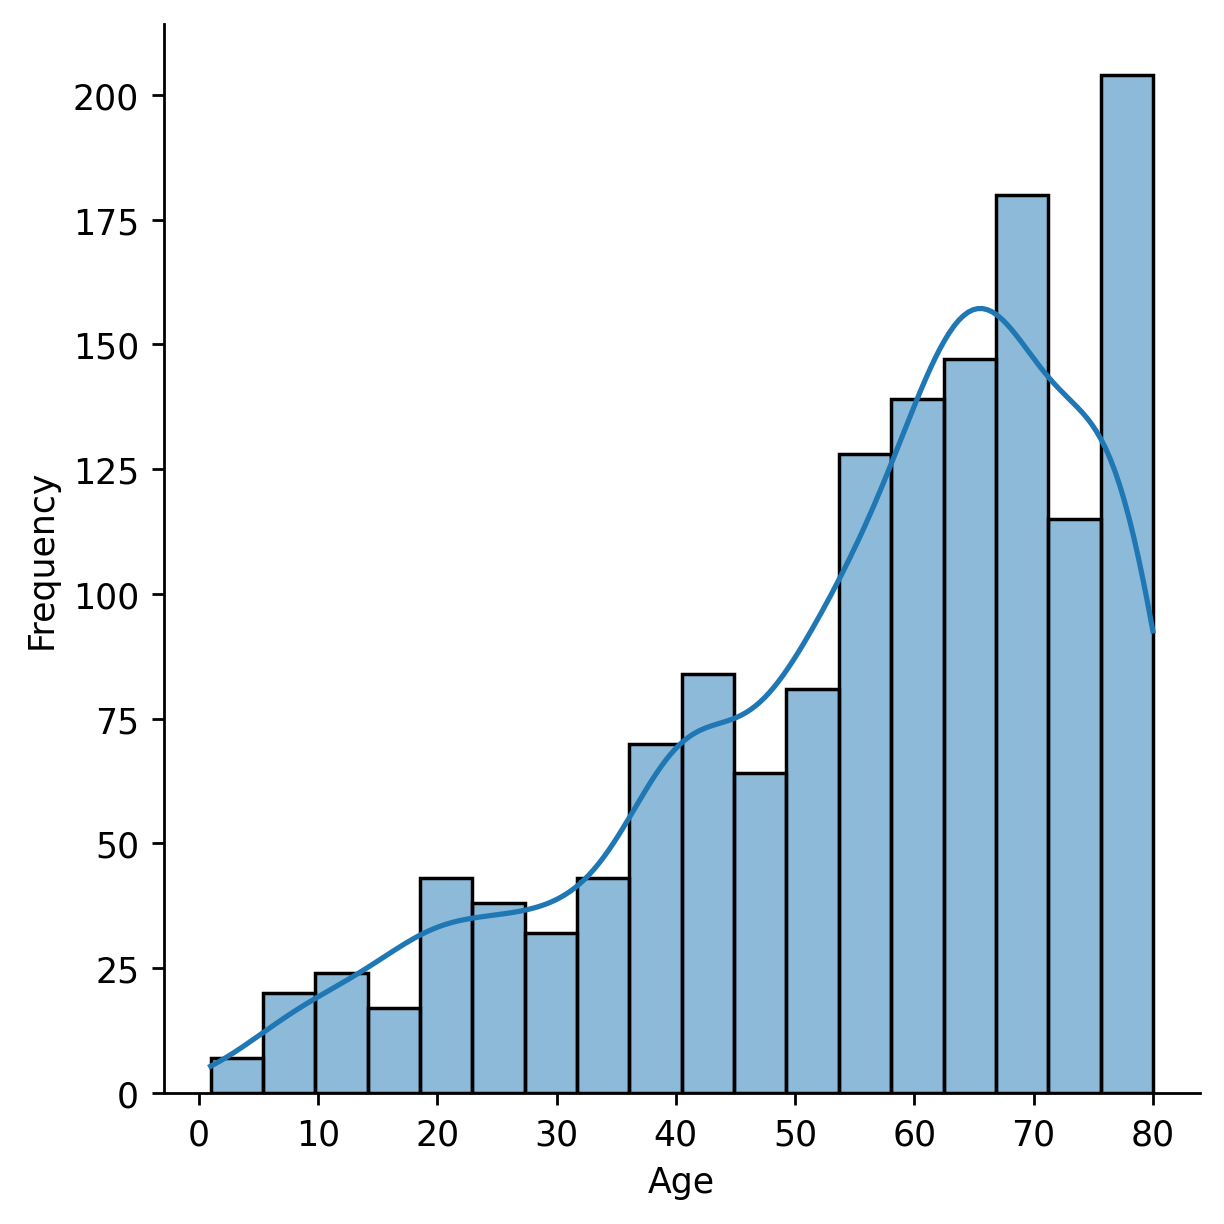

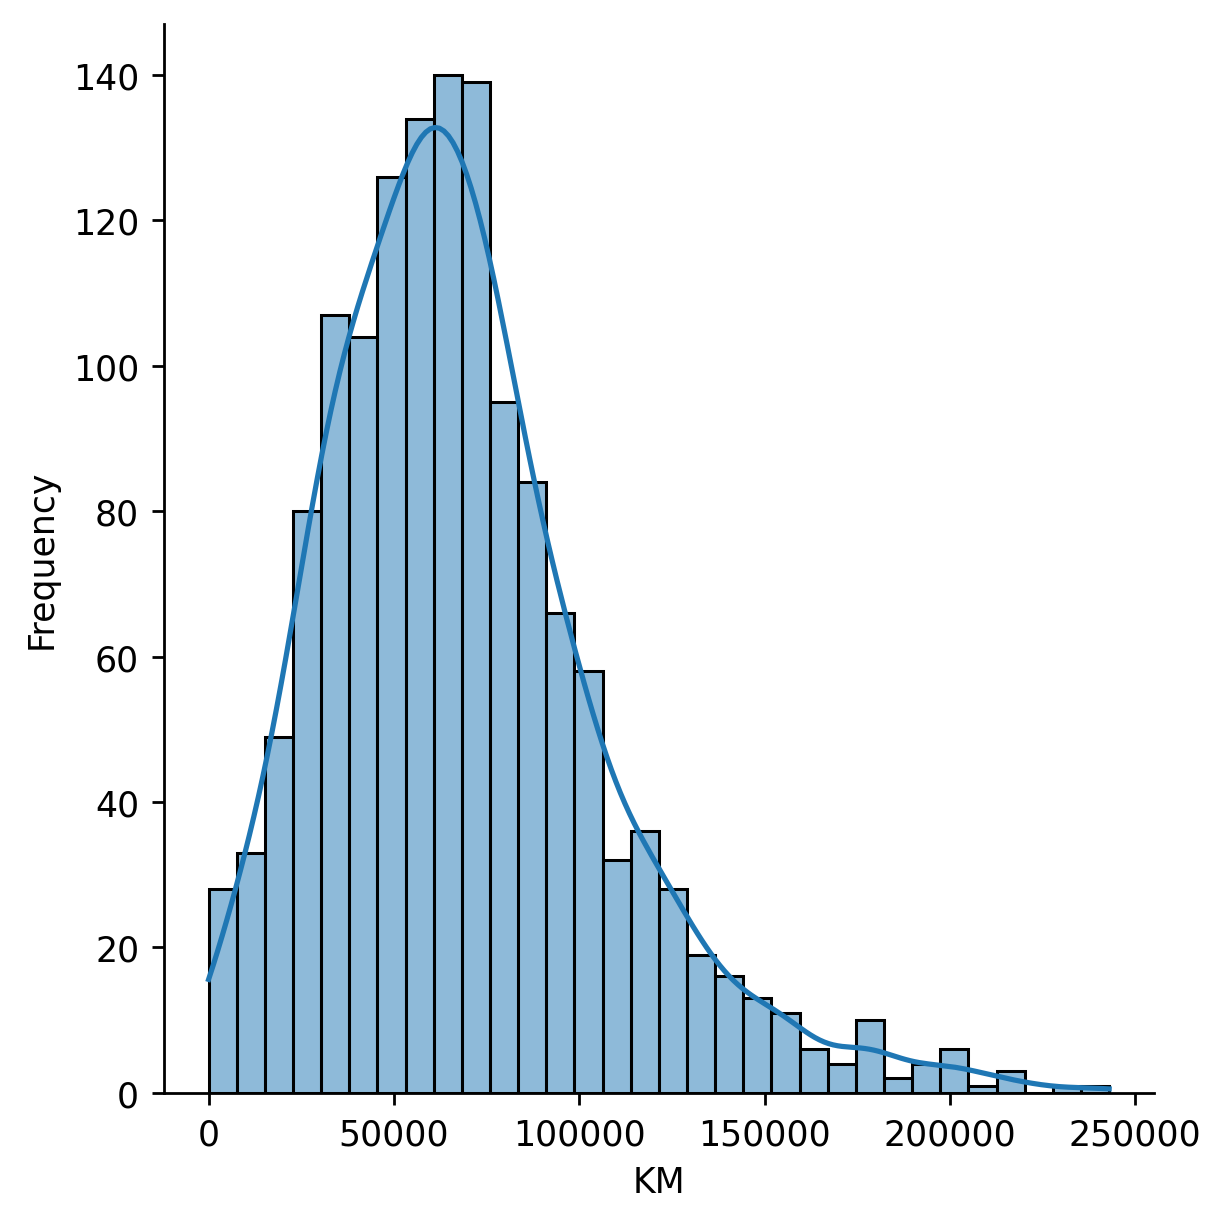

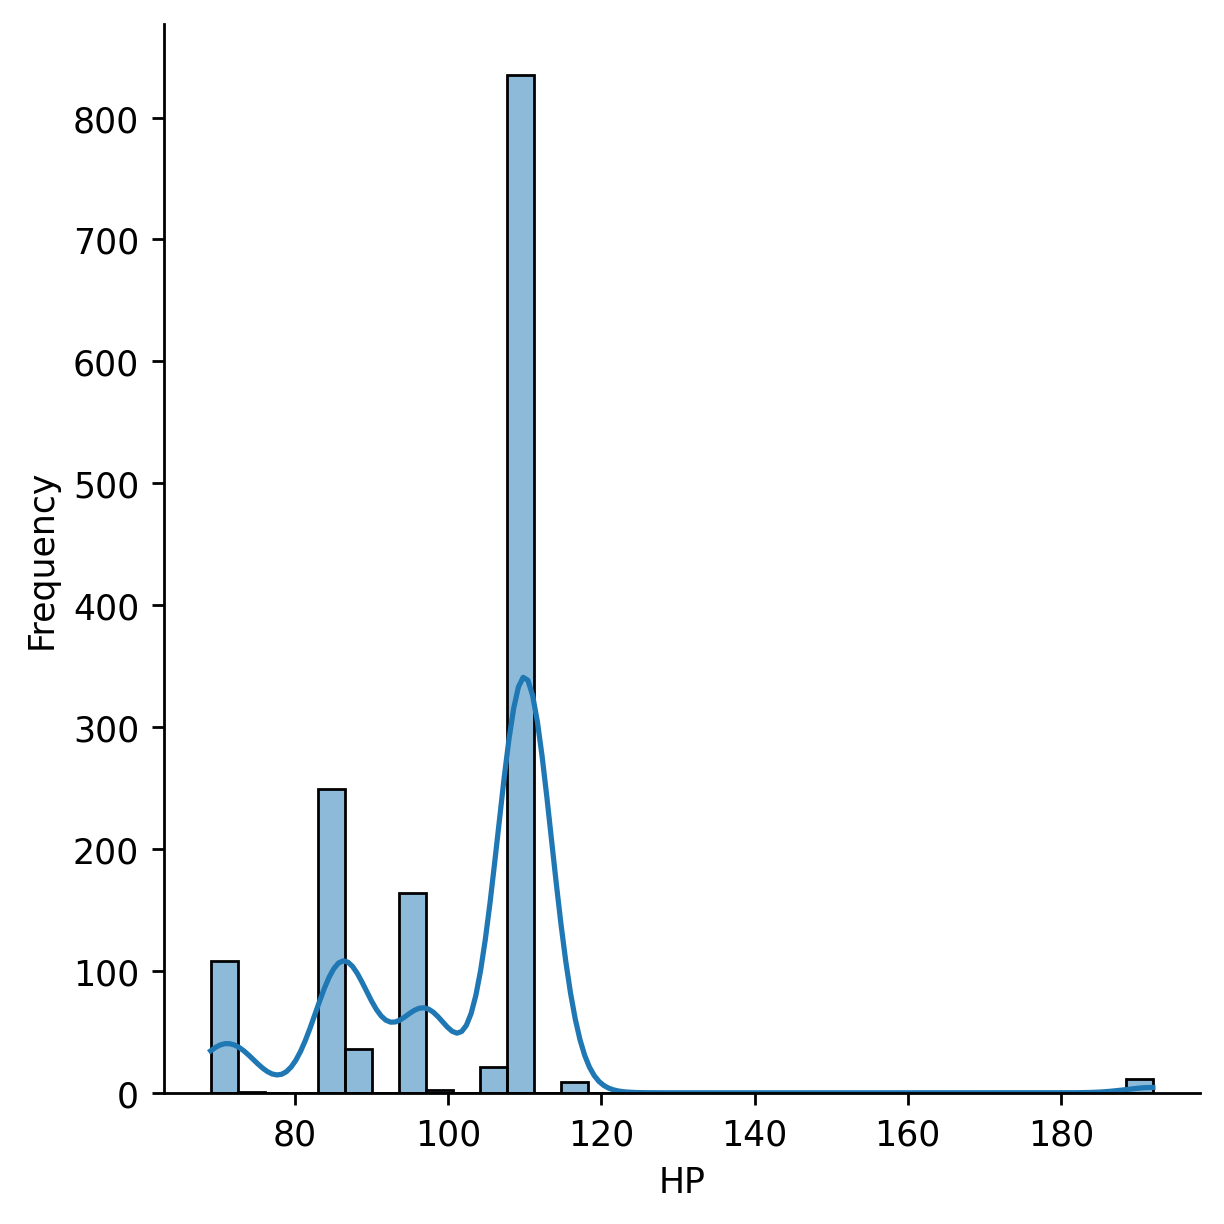

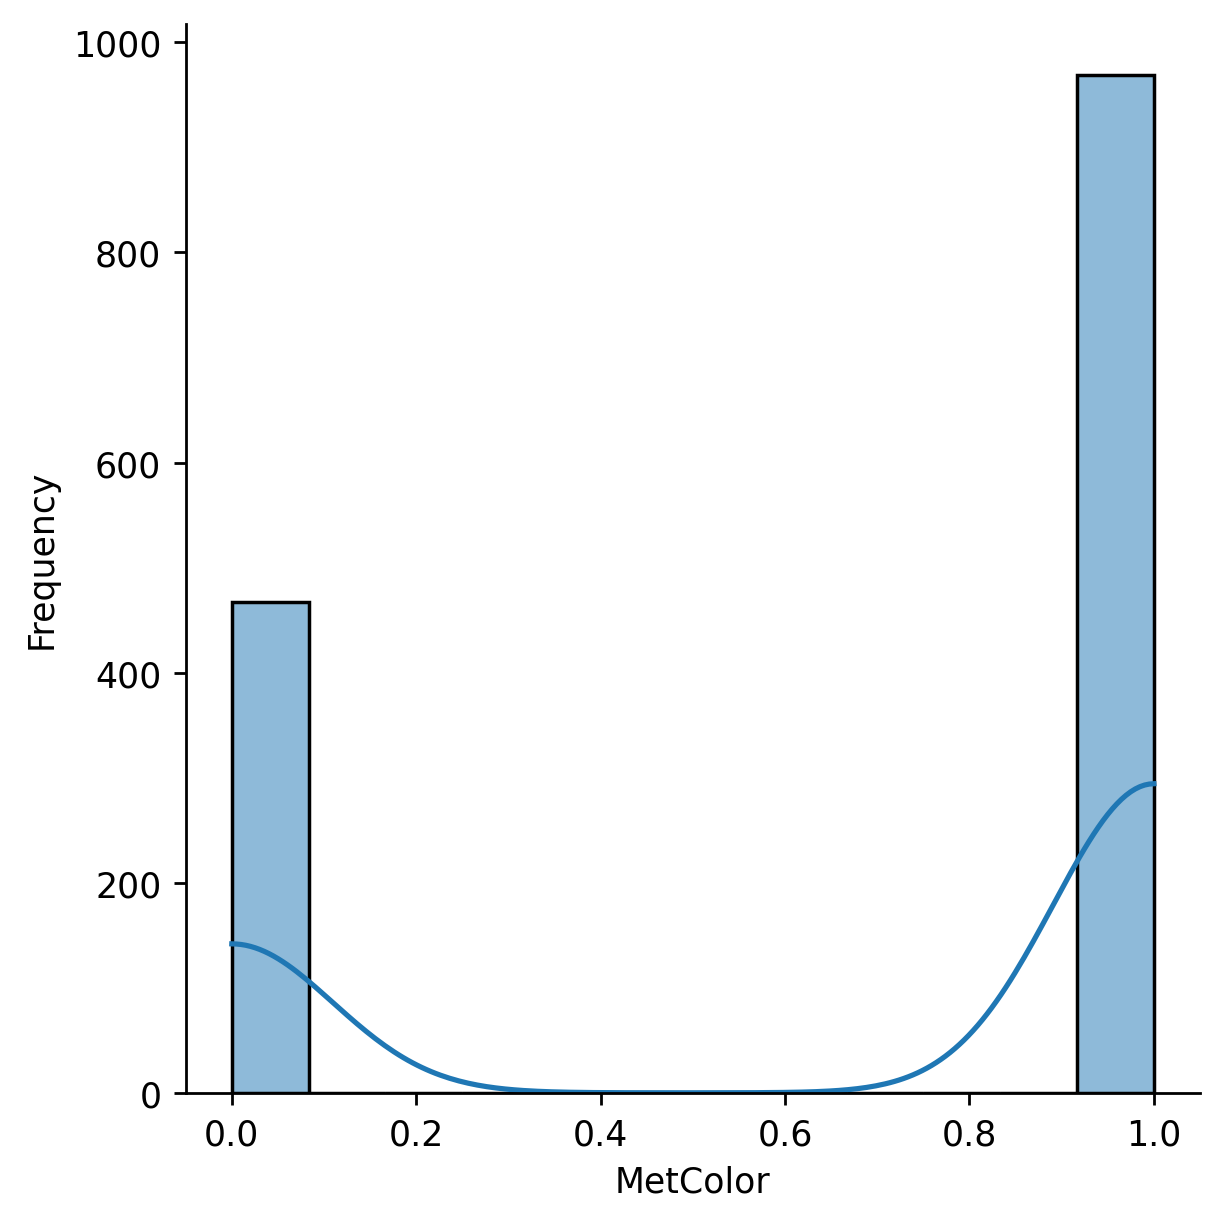

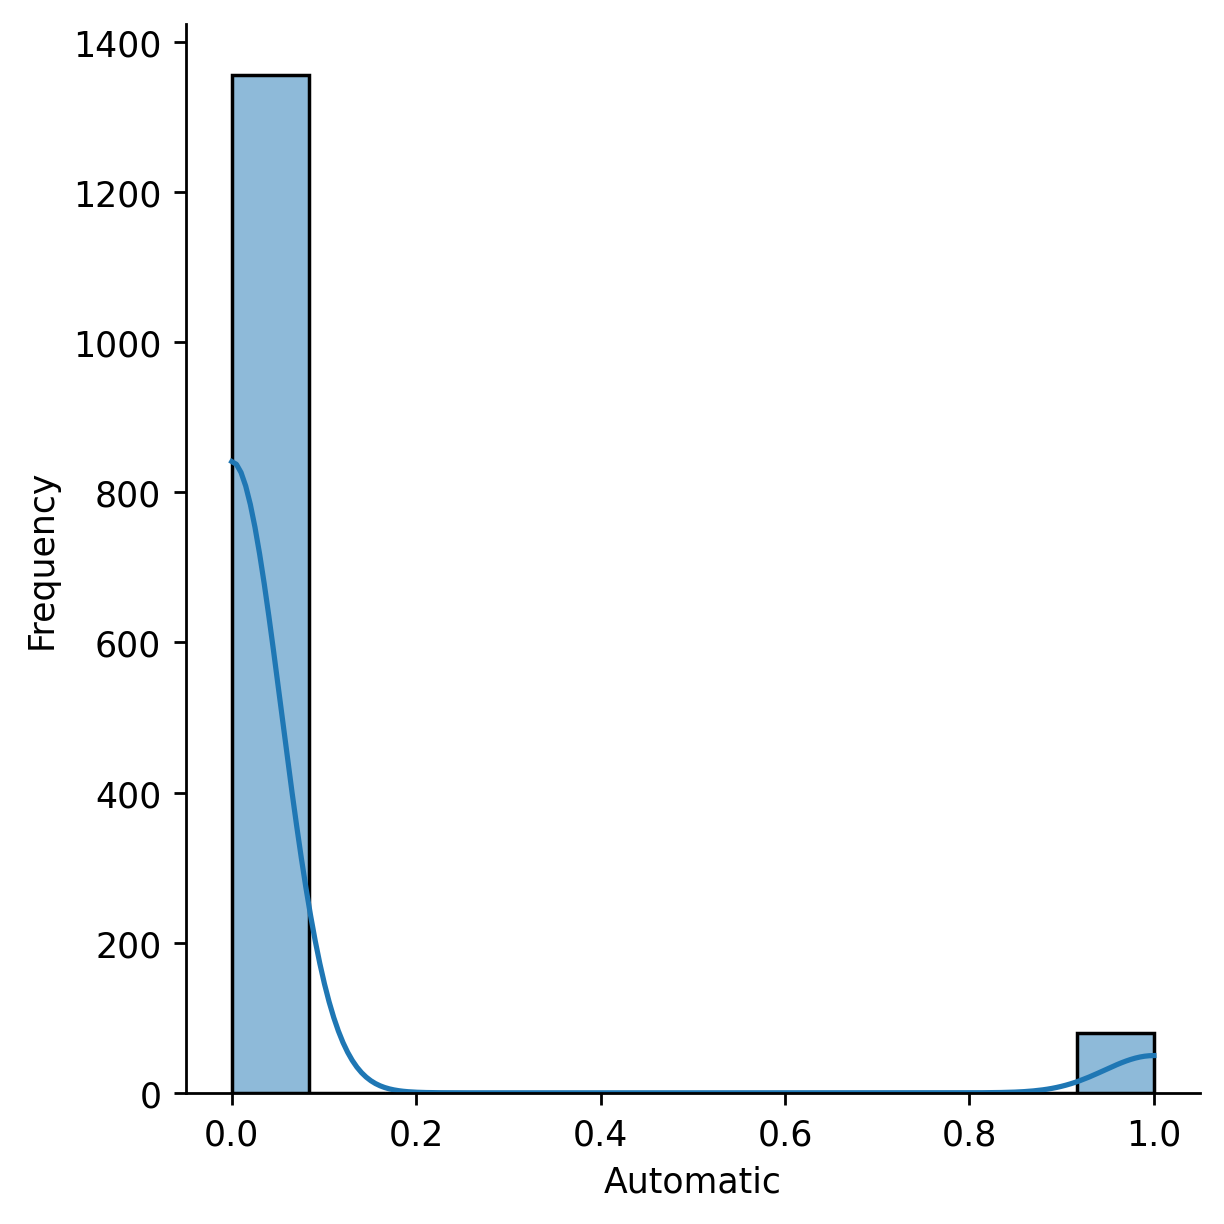

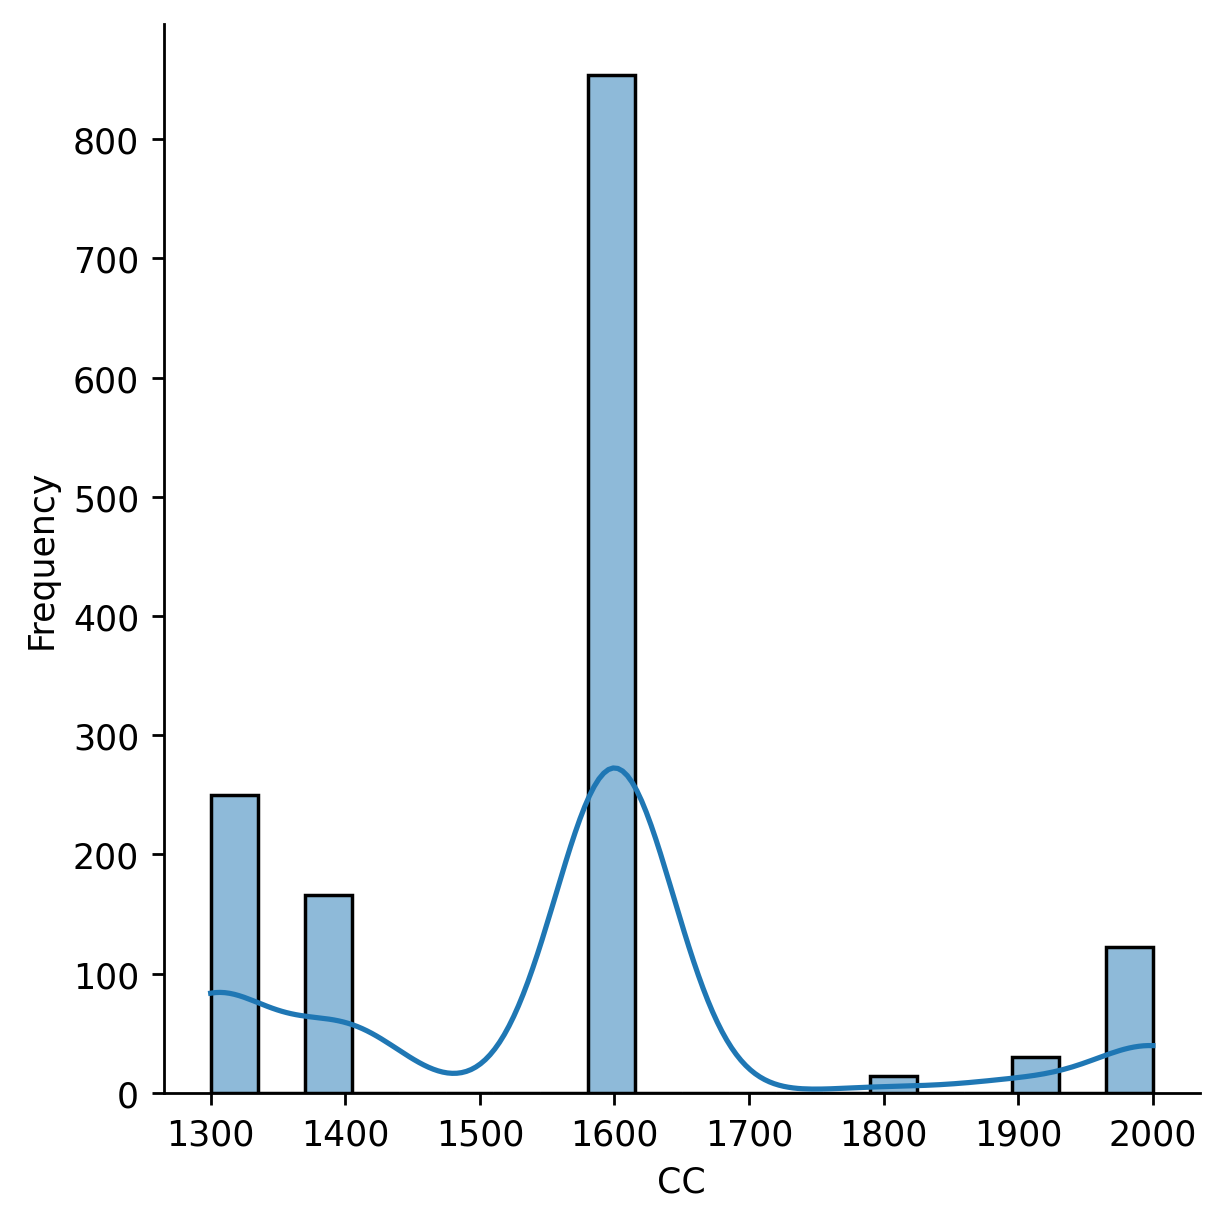

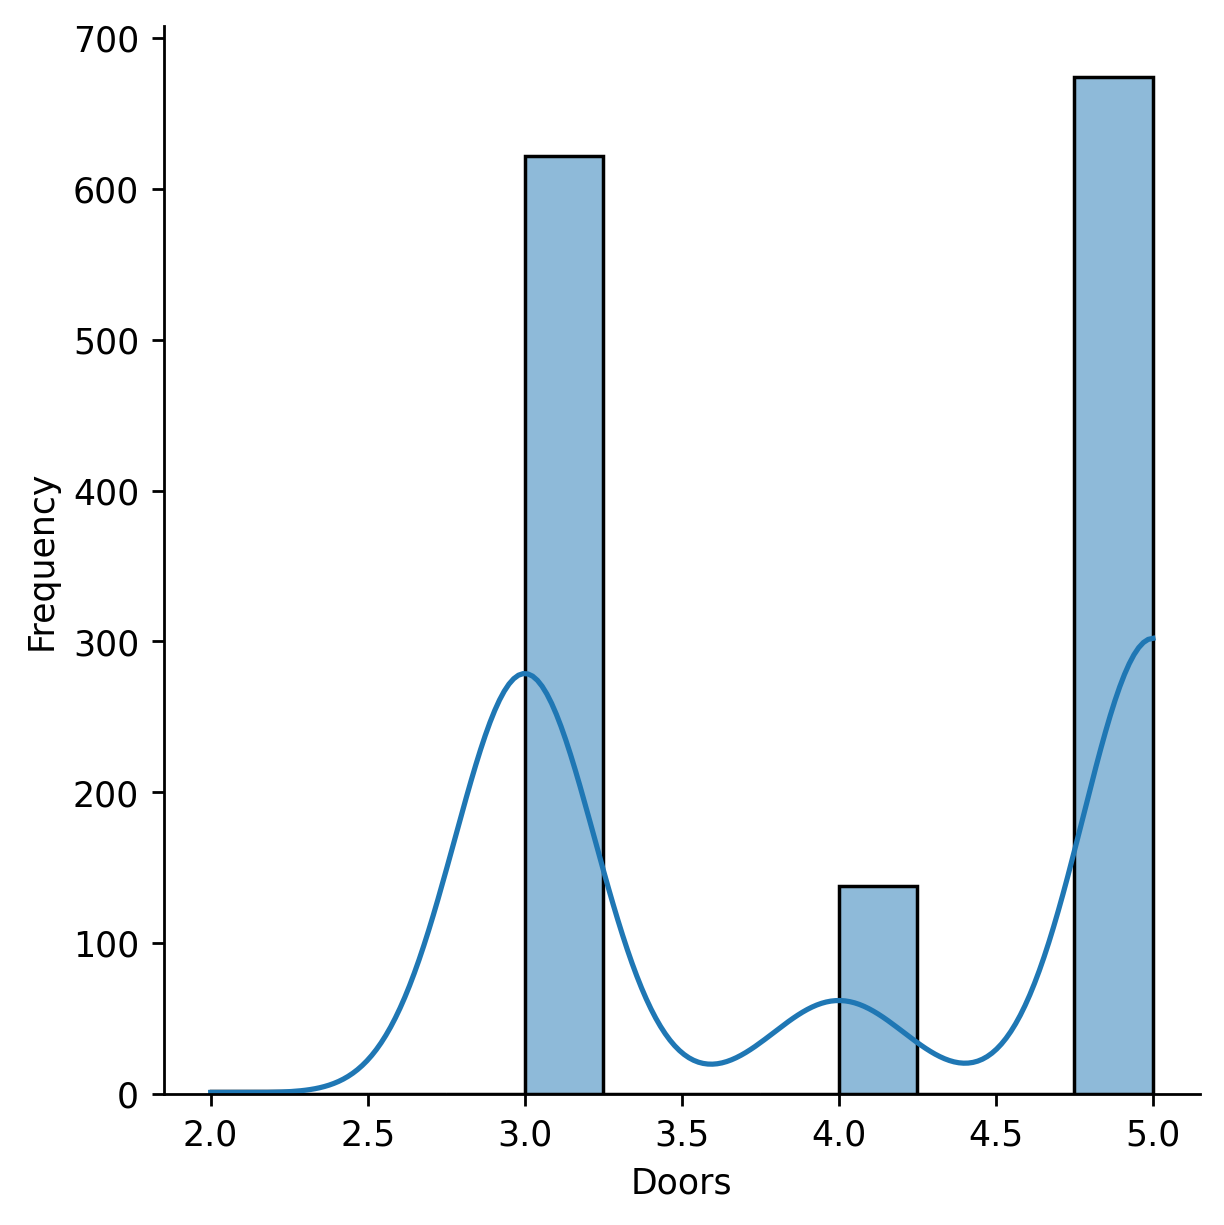

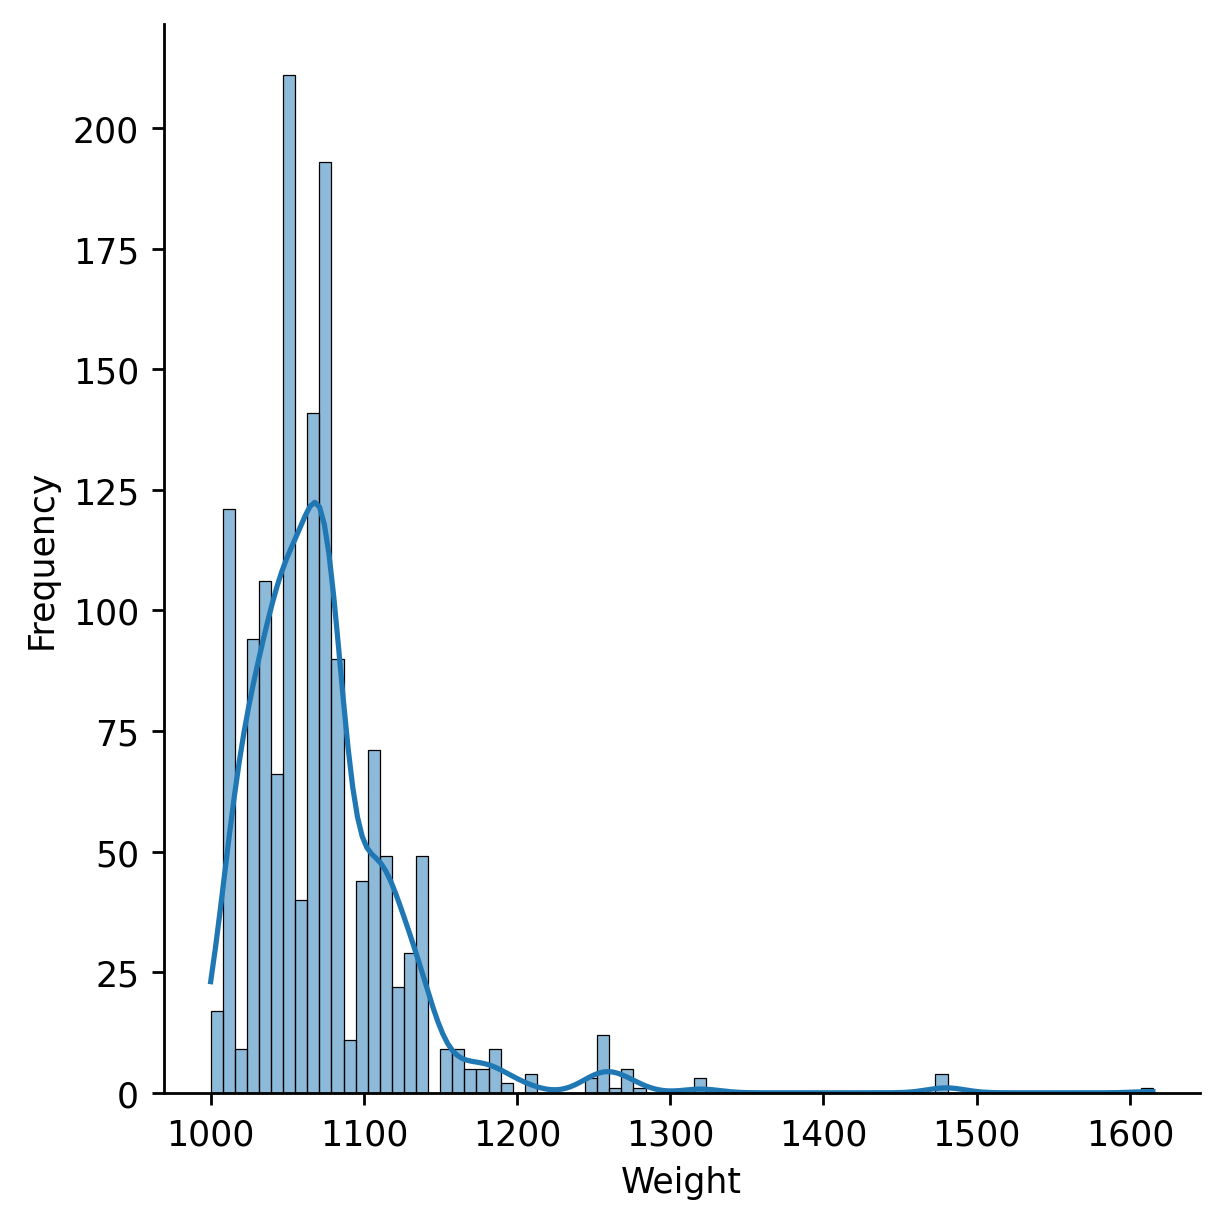

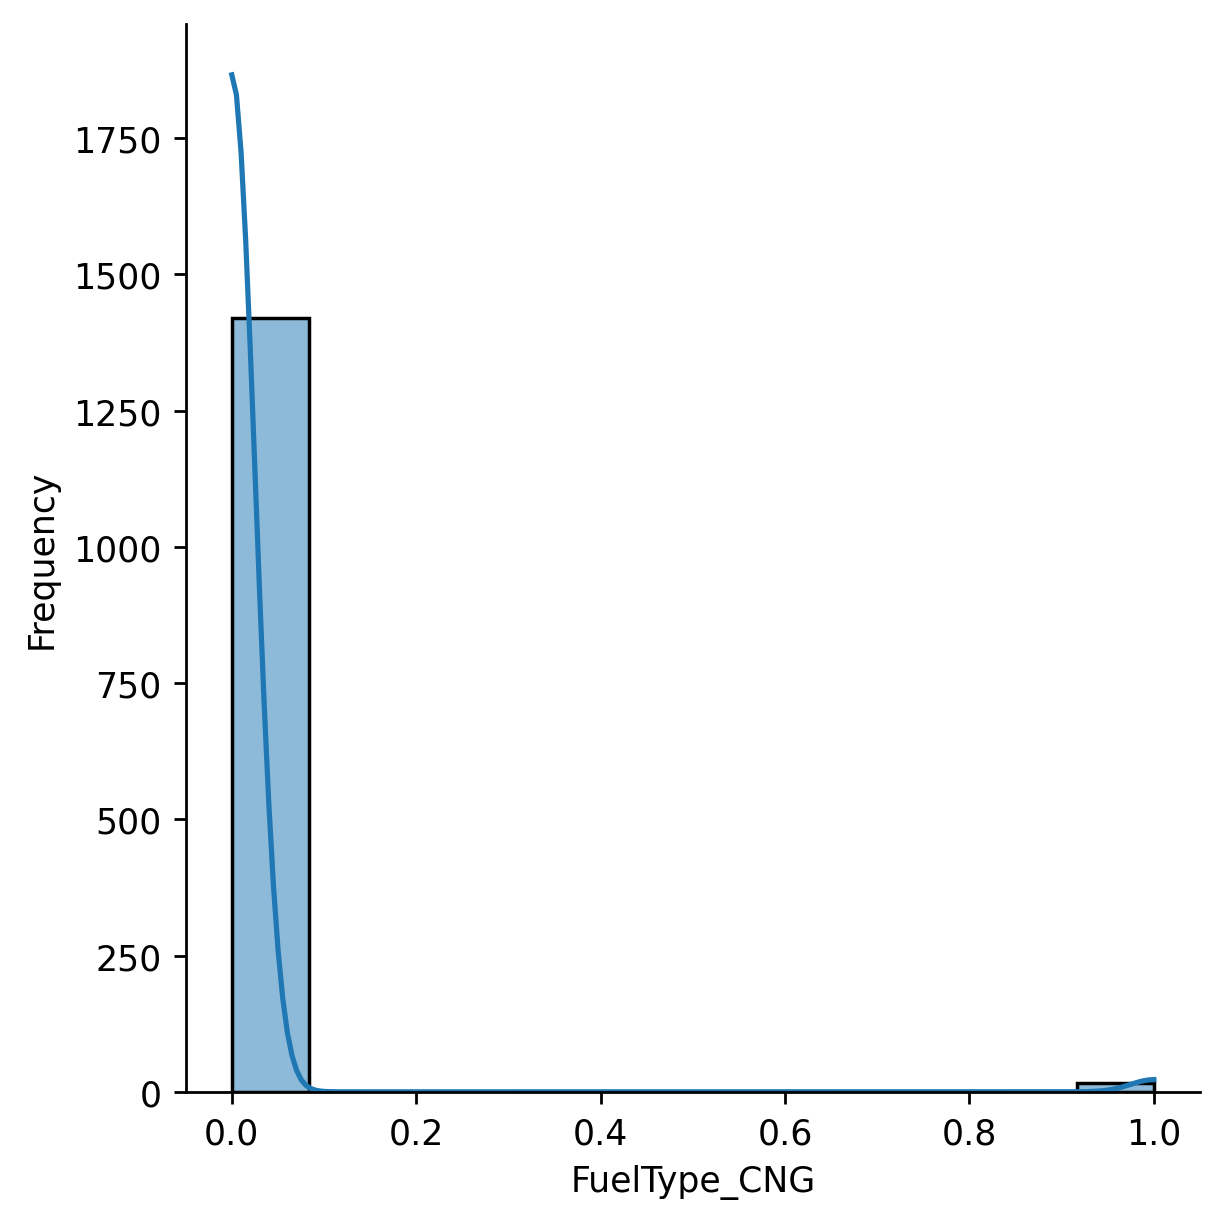

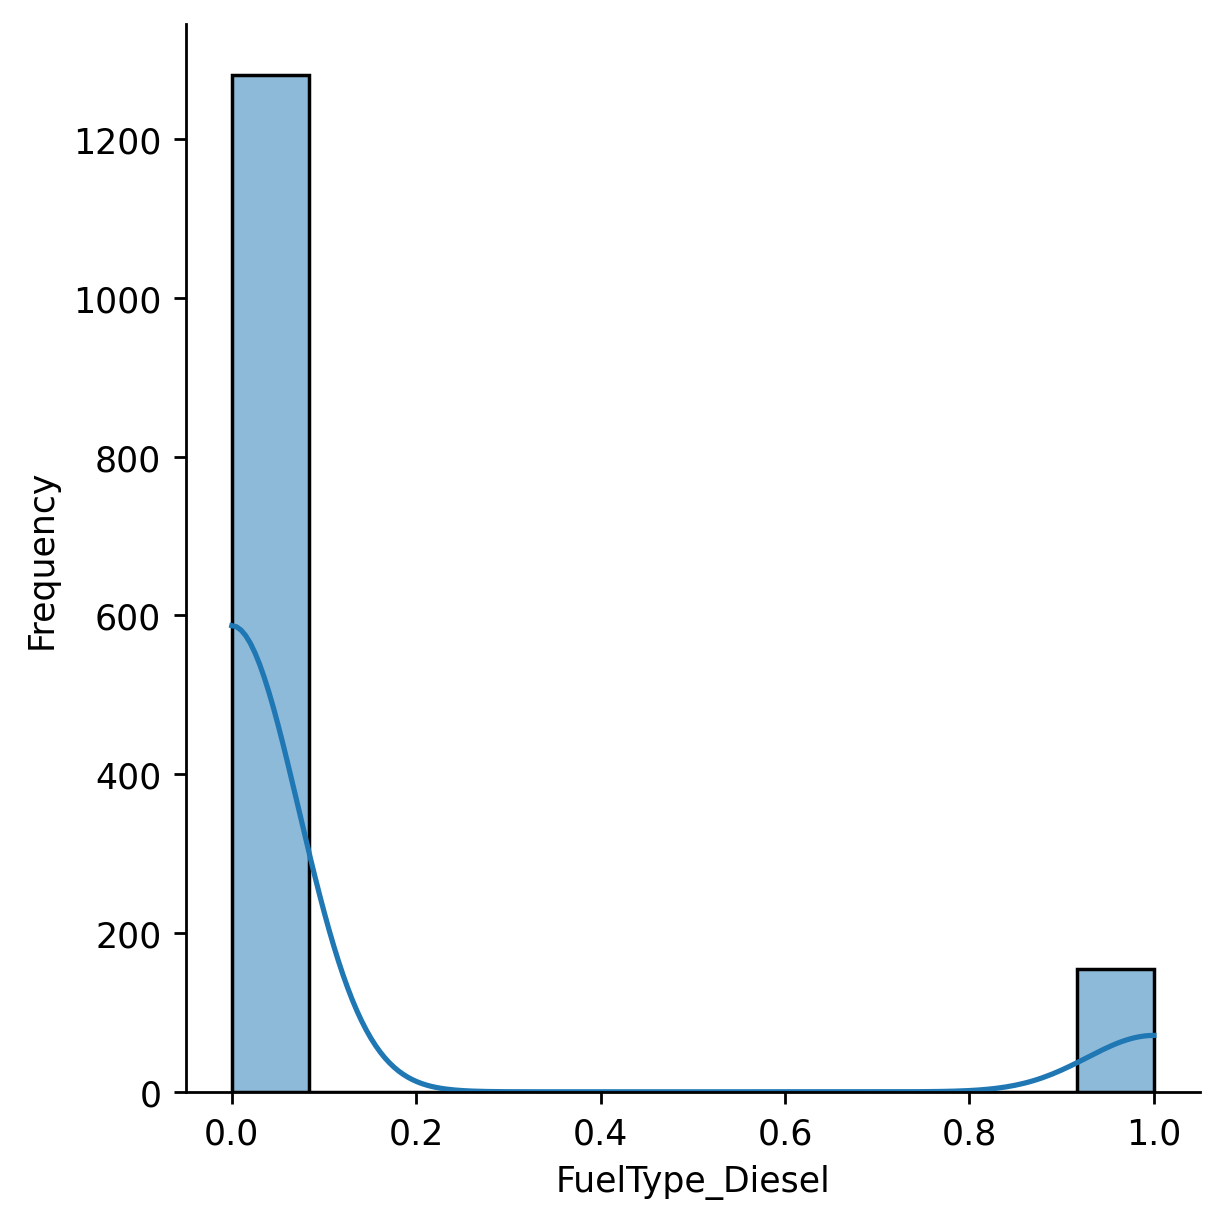

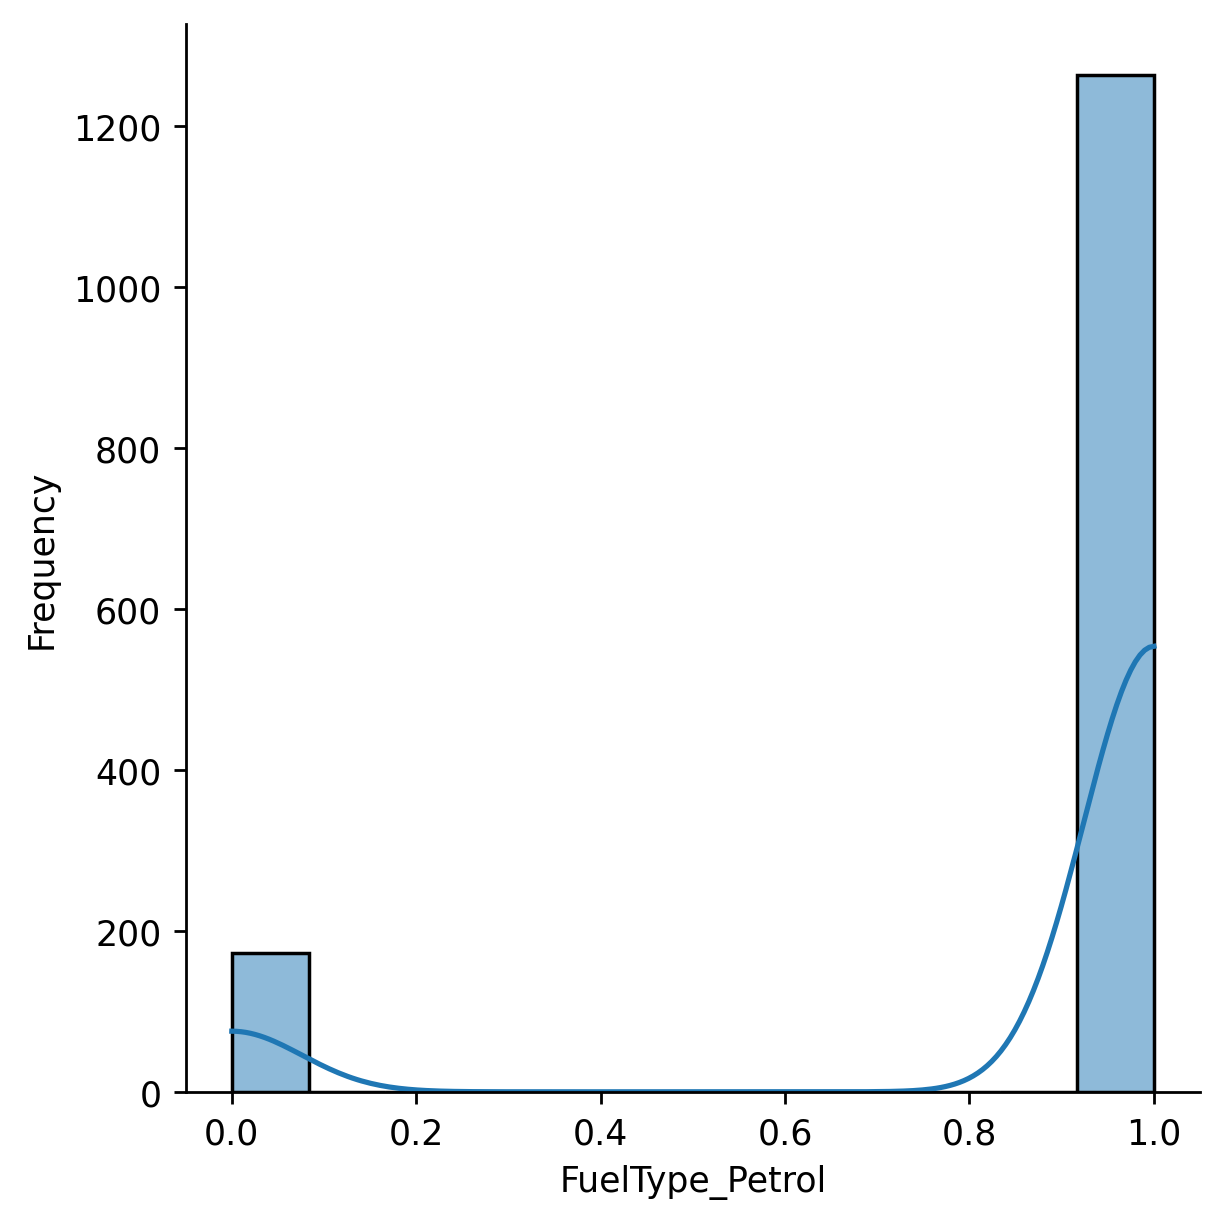

In [14]:
for i in data.columns:
    sns.displot(data[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.bar
    plt.show()

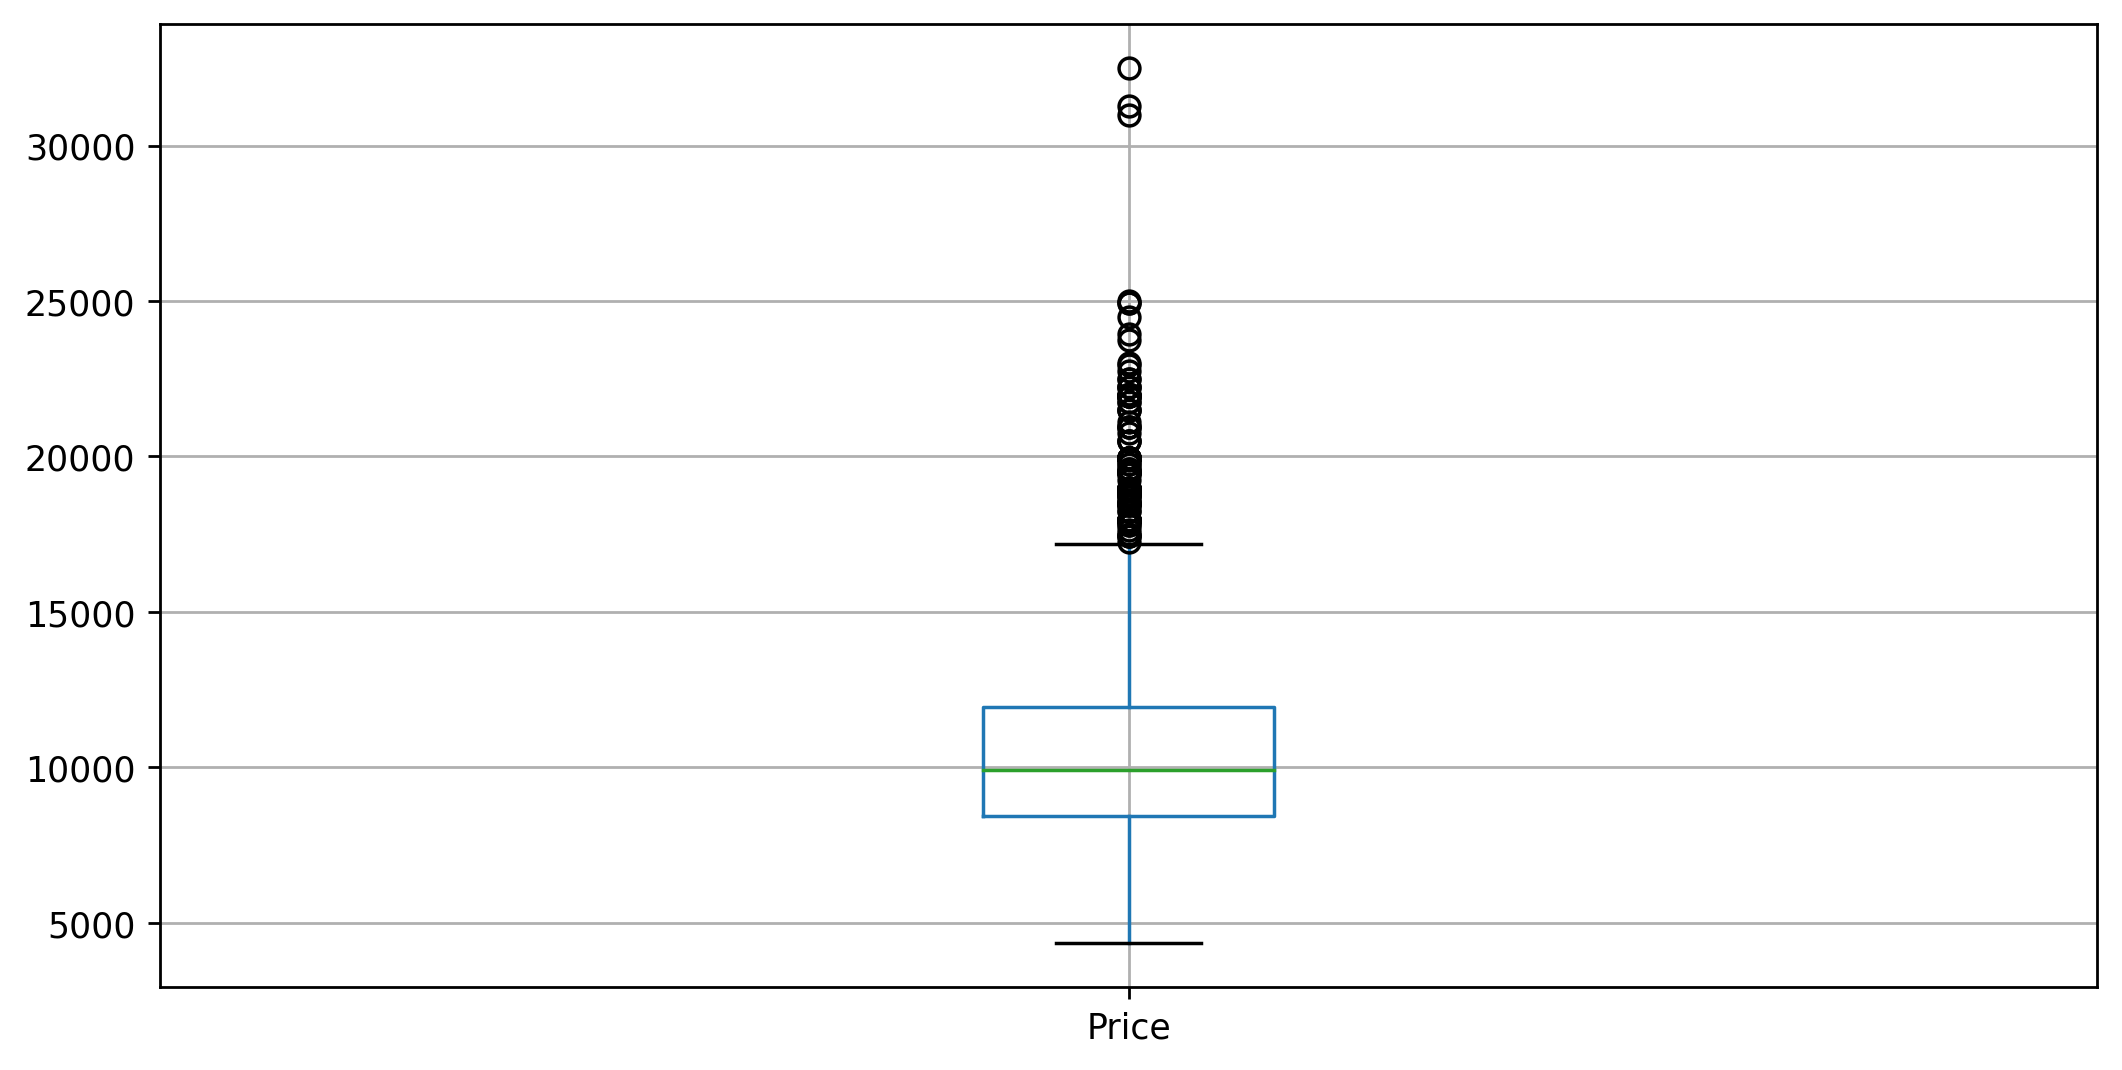

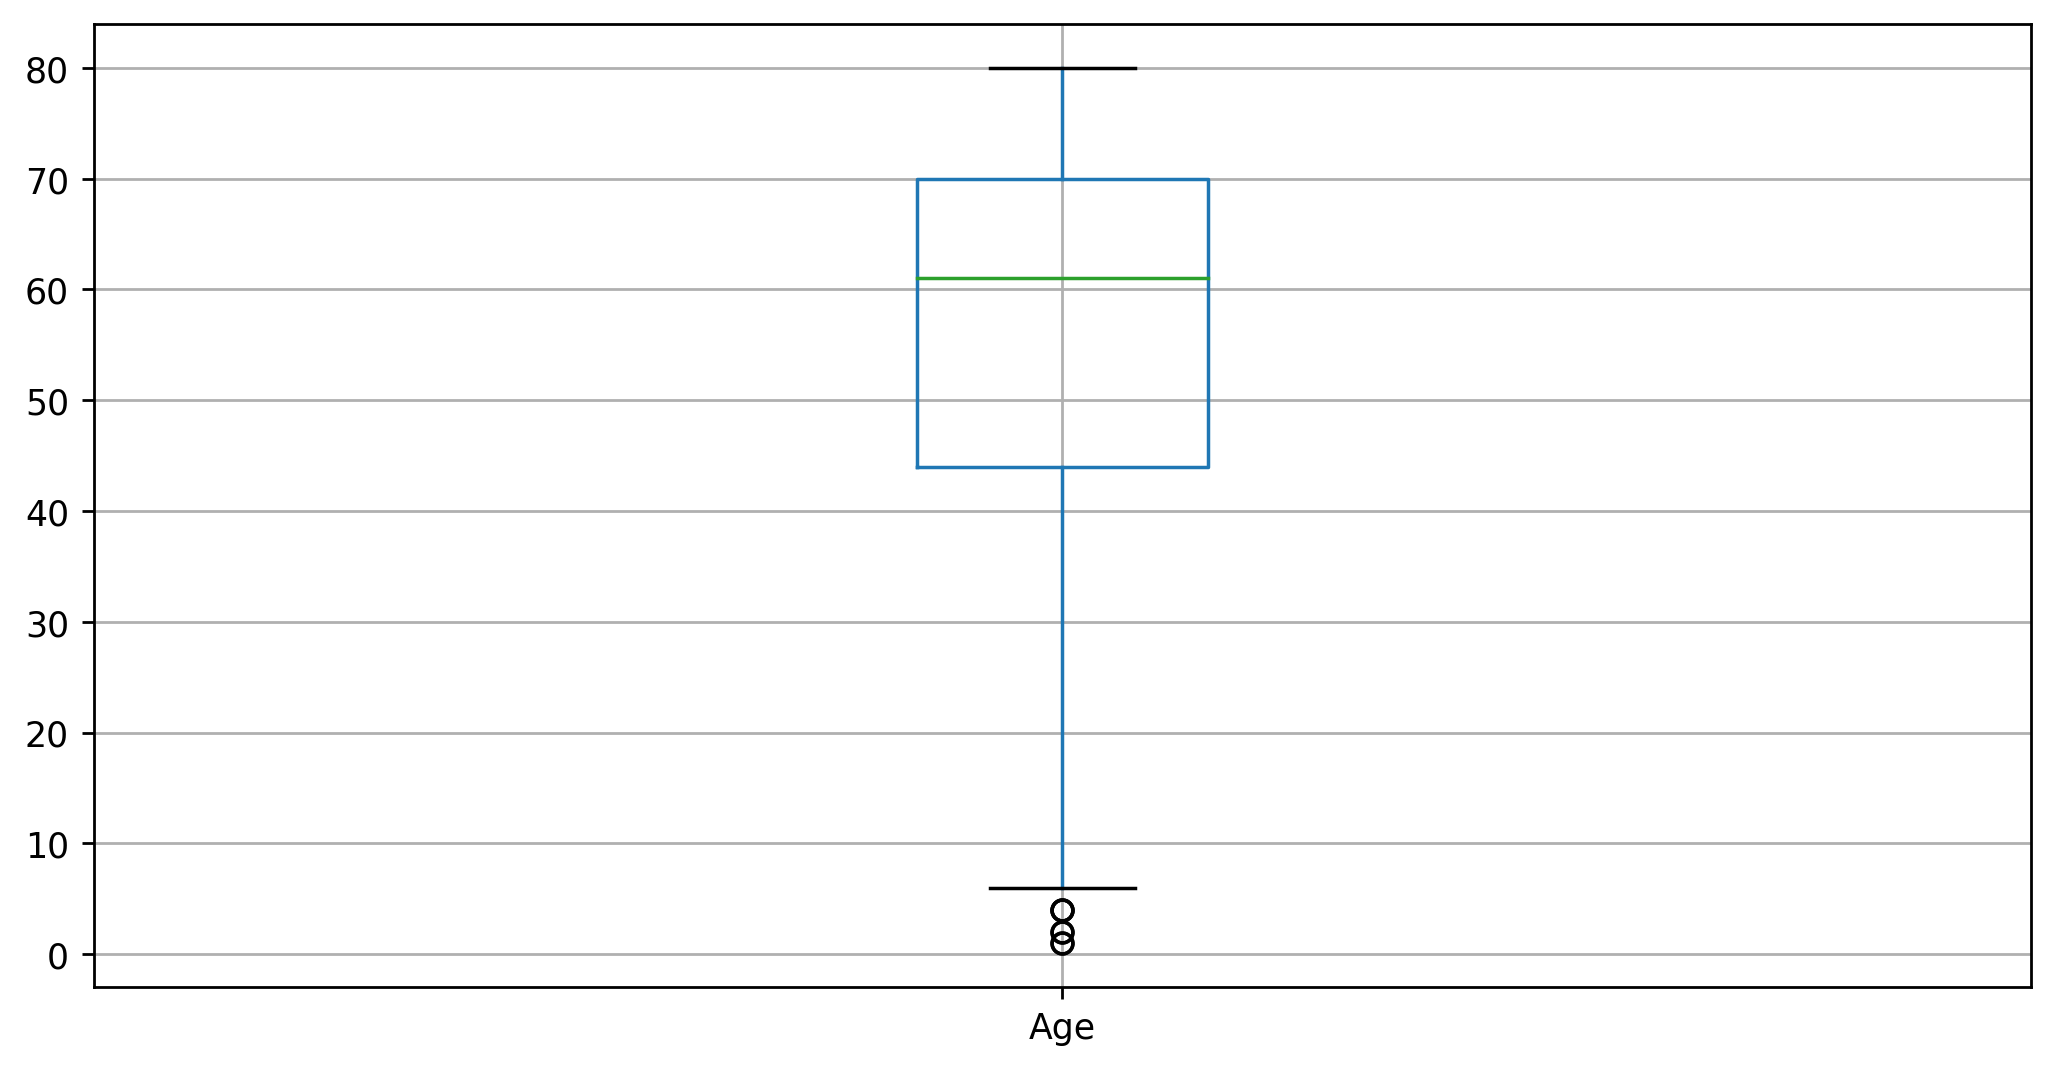

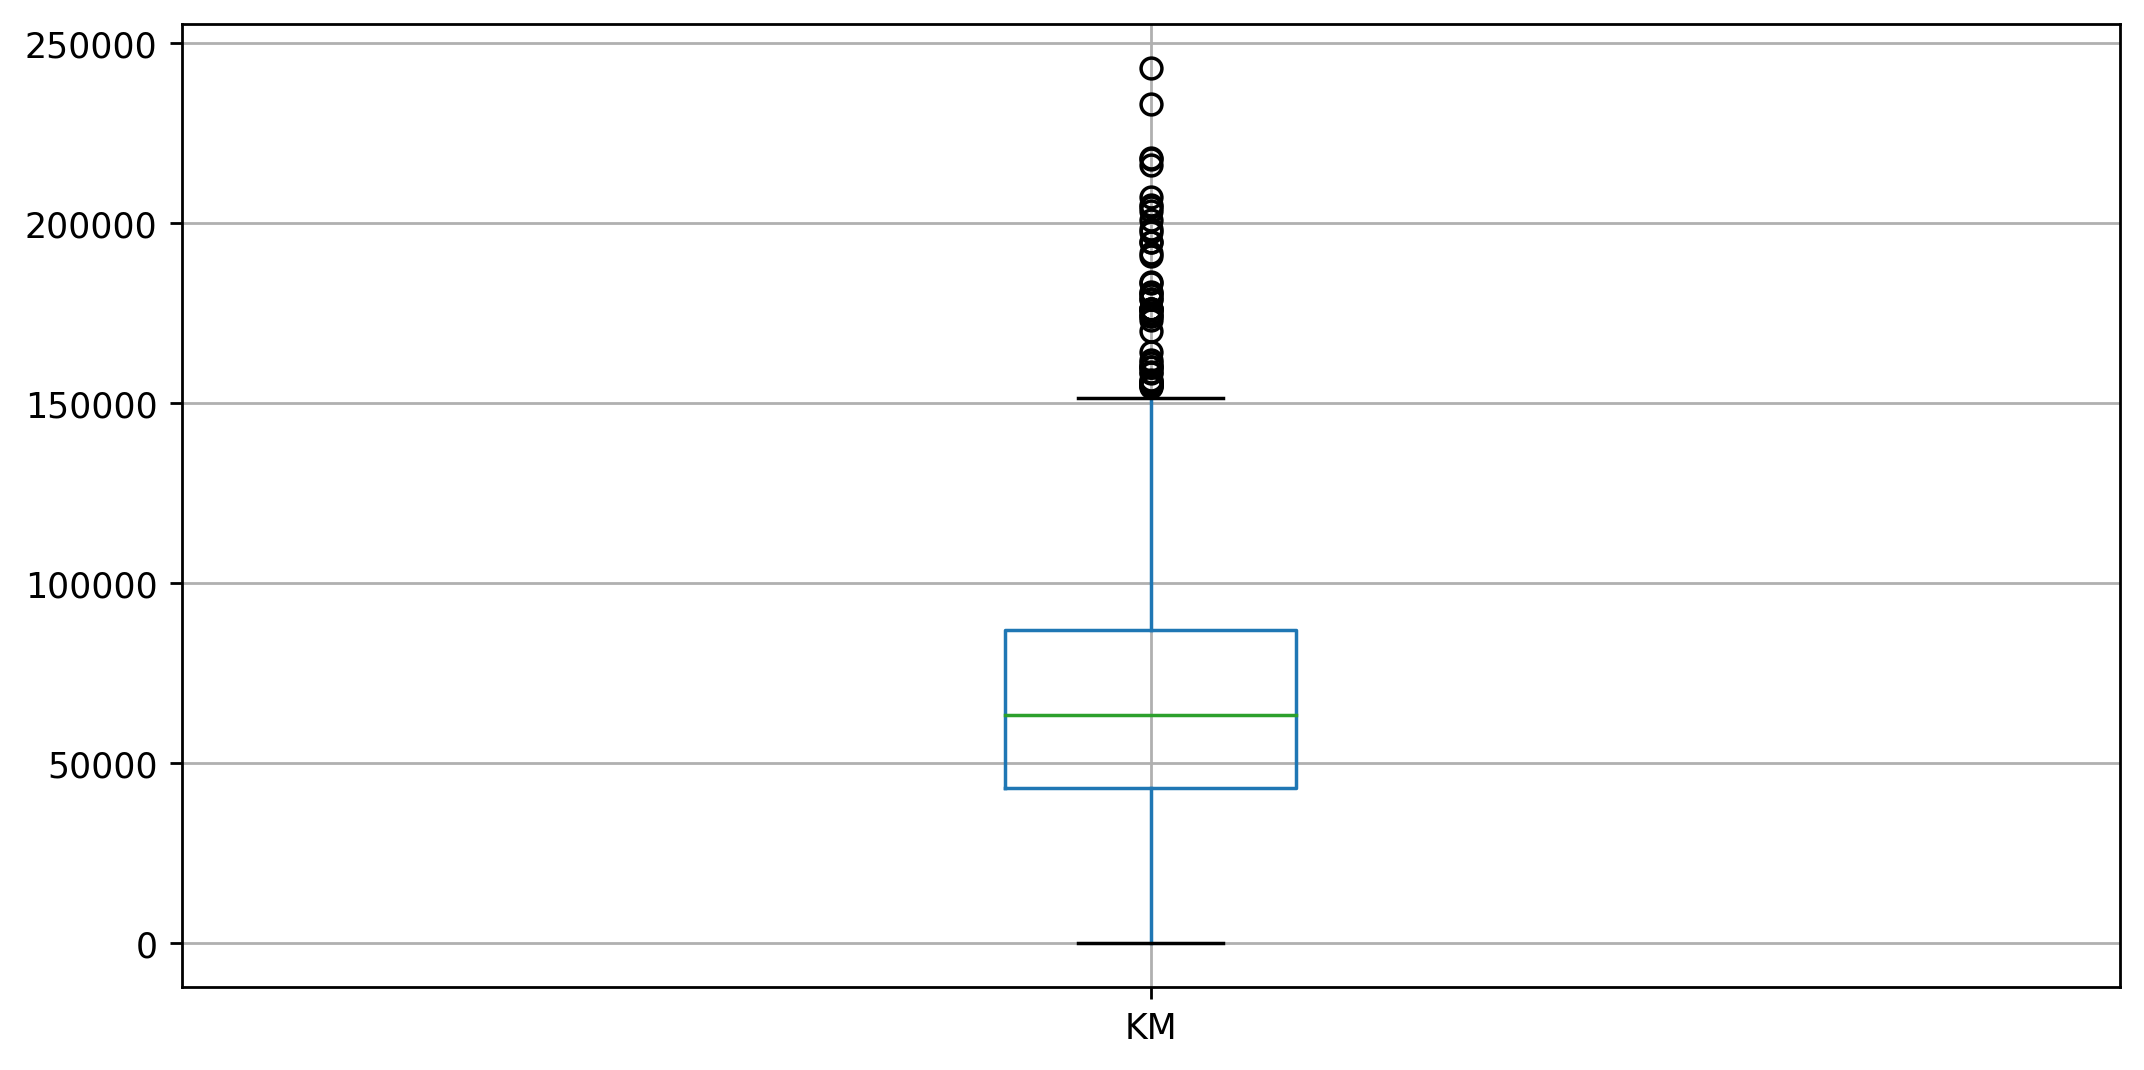

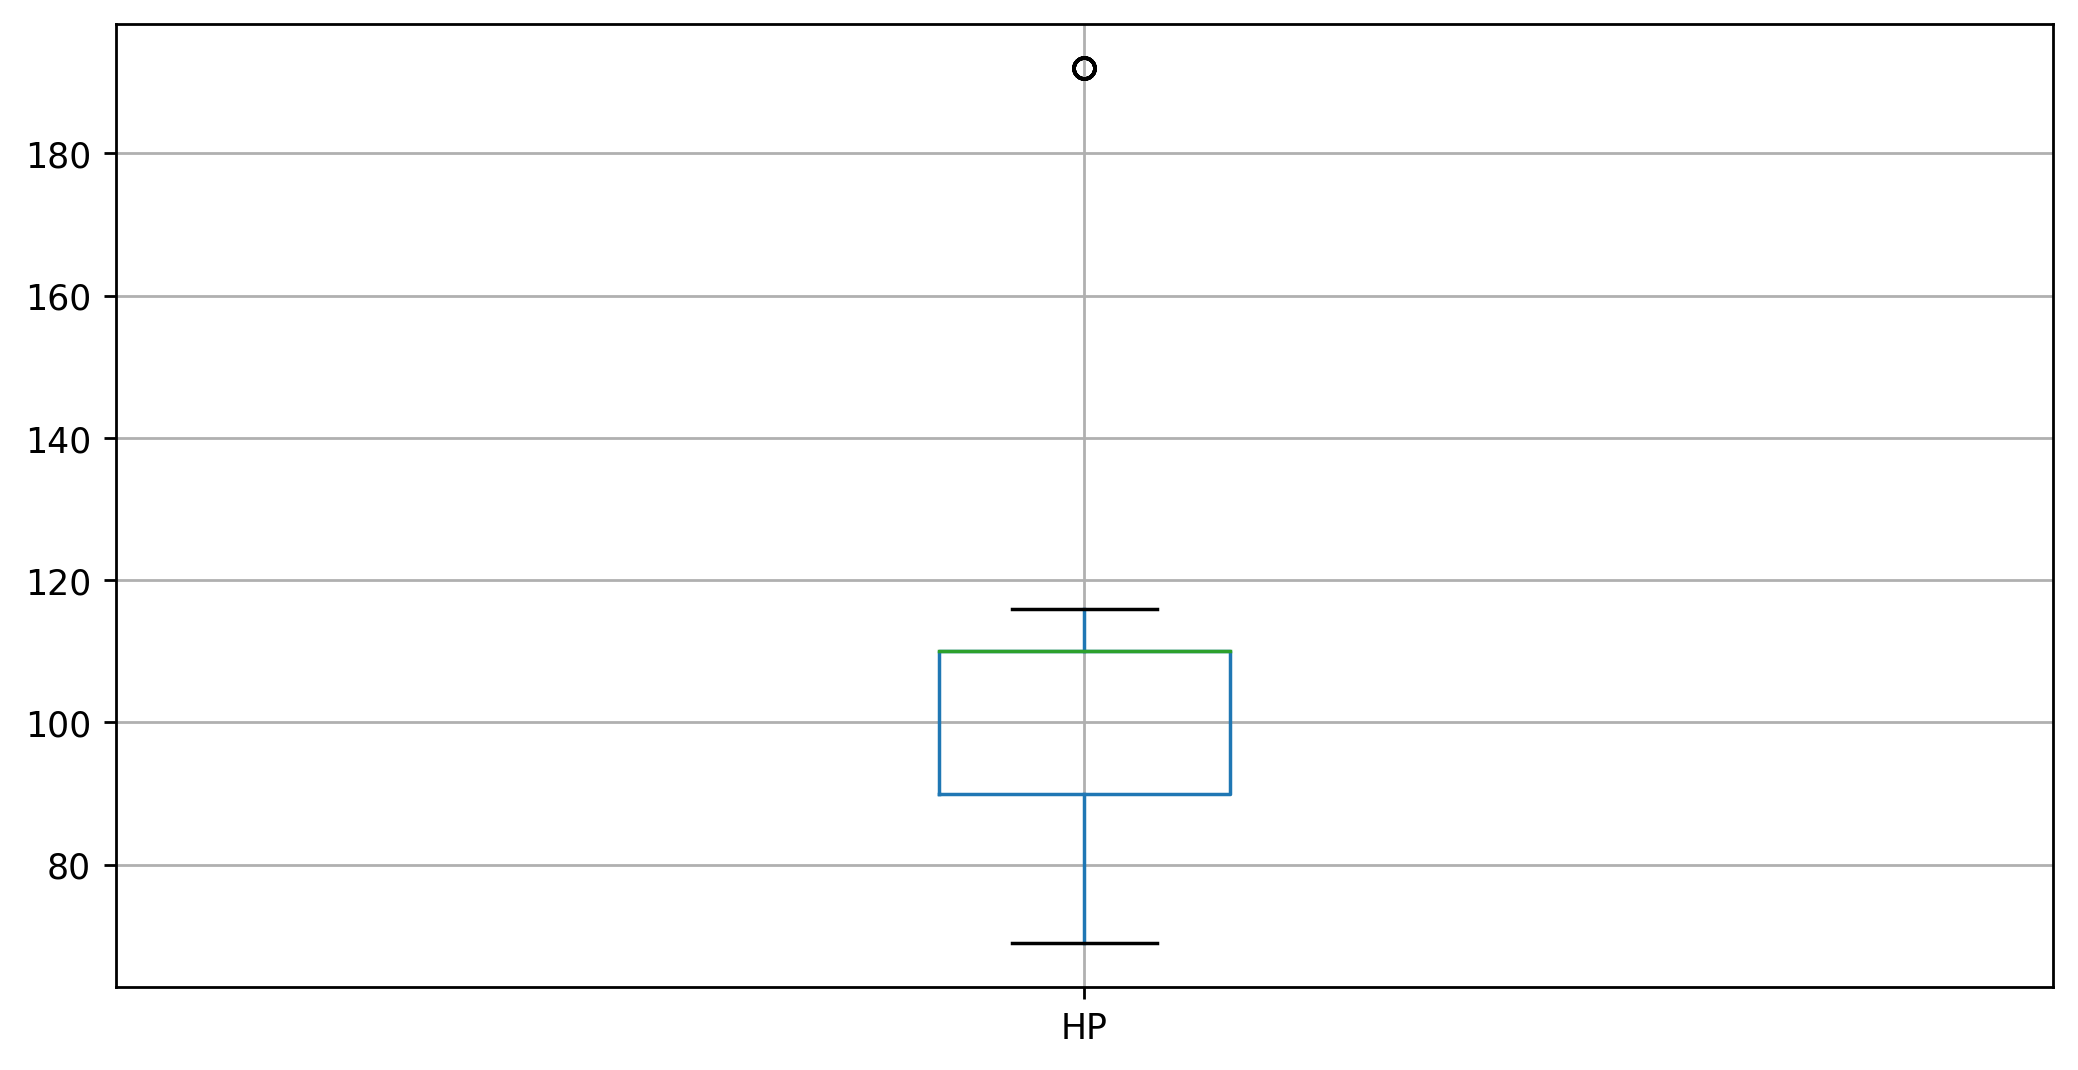

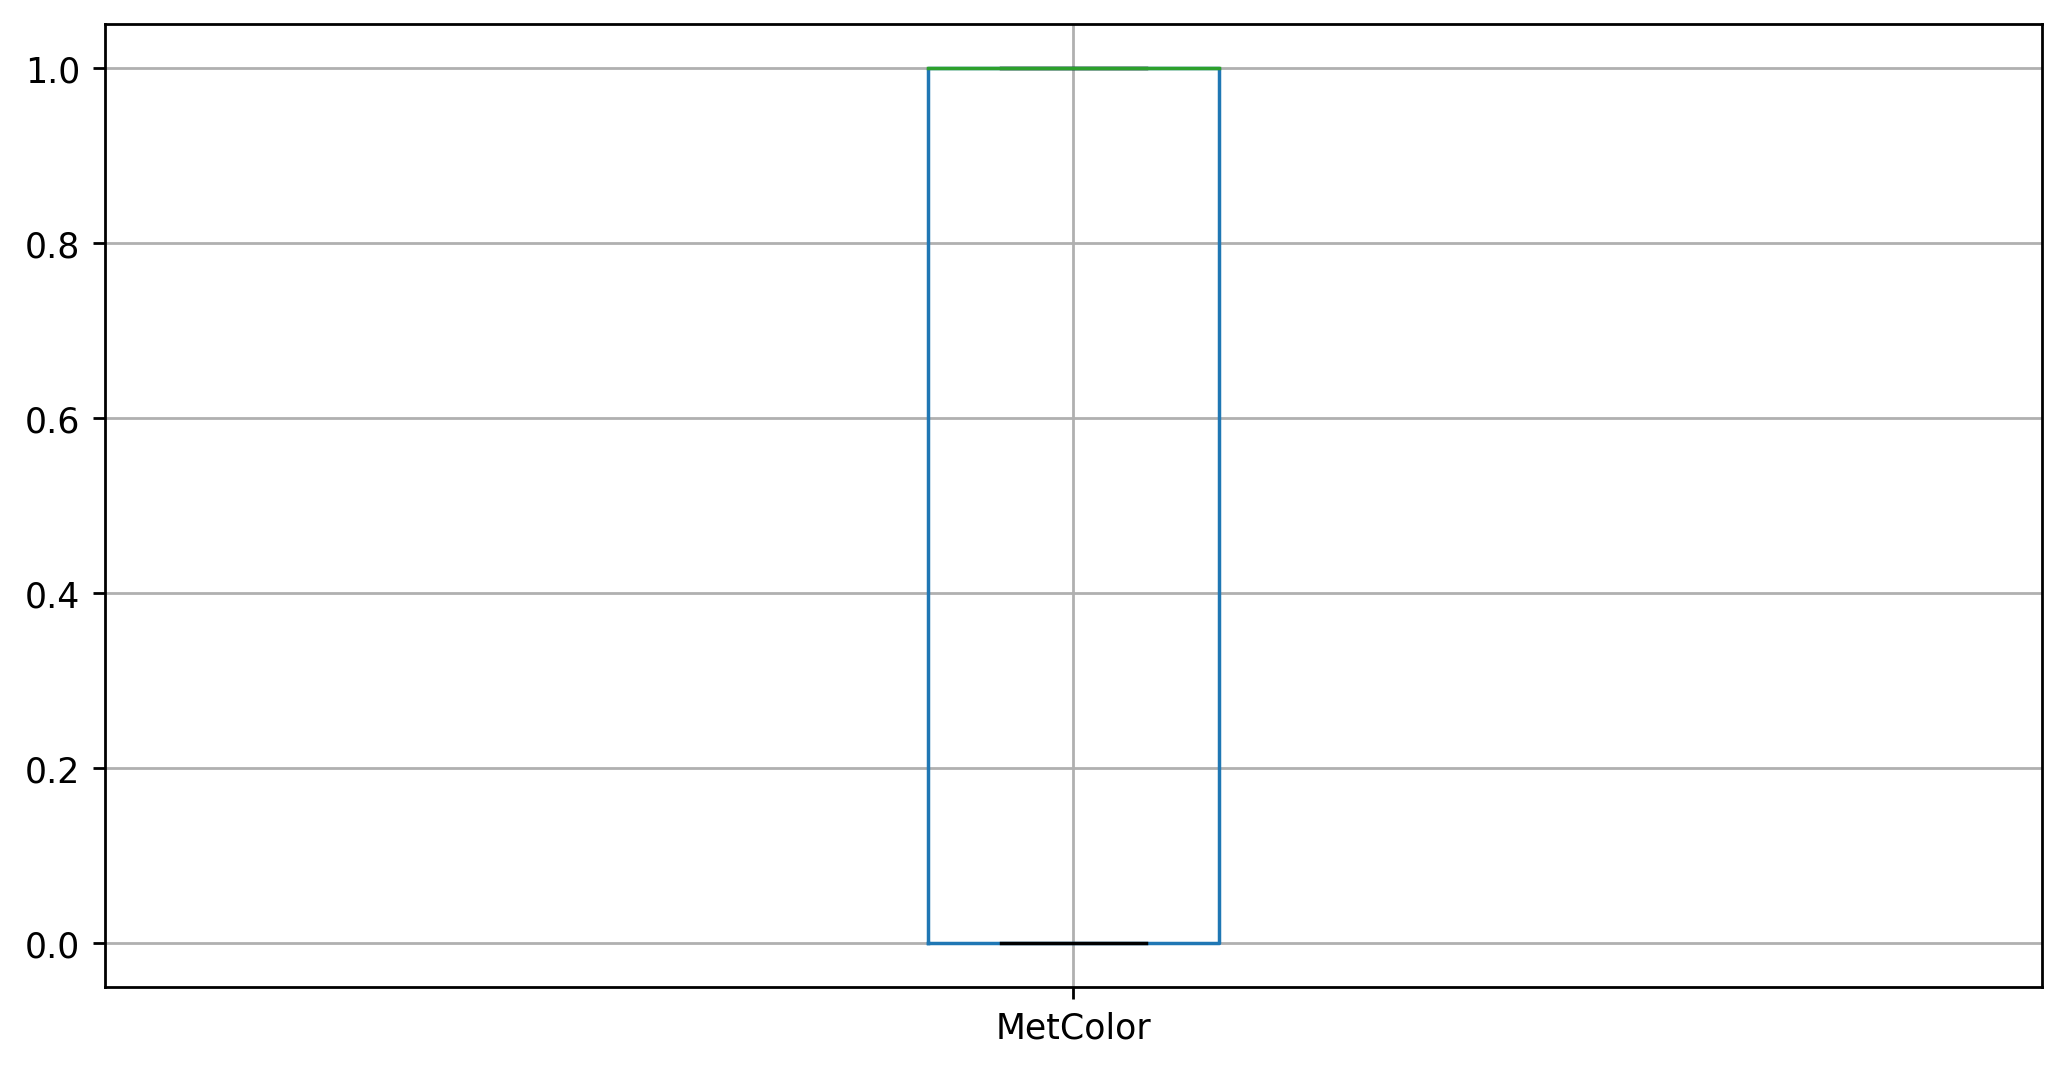

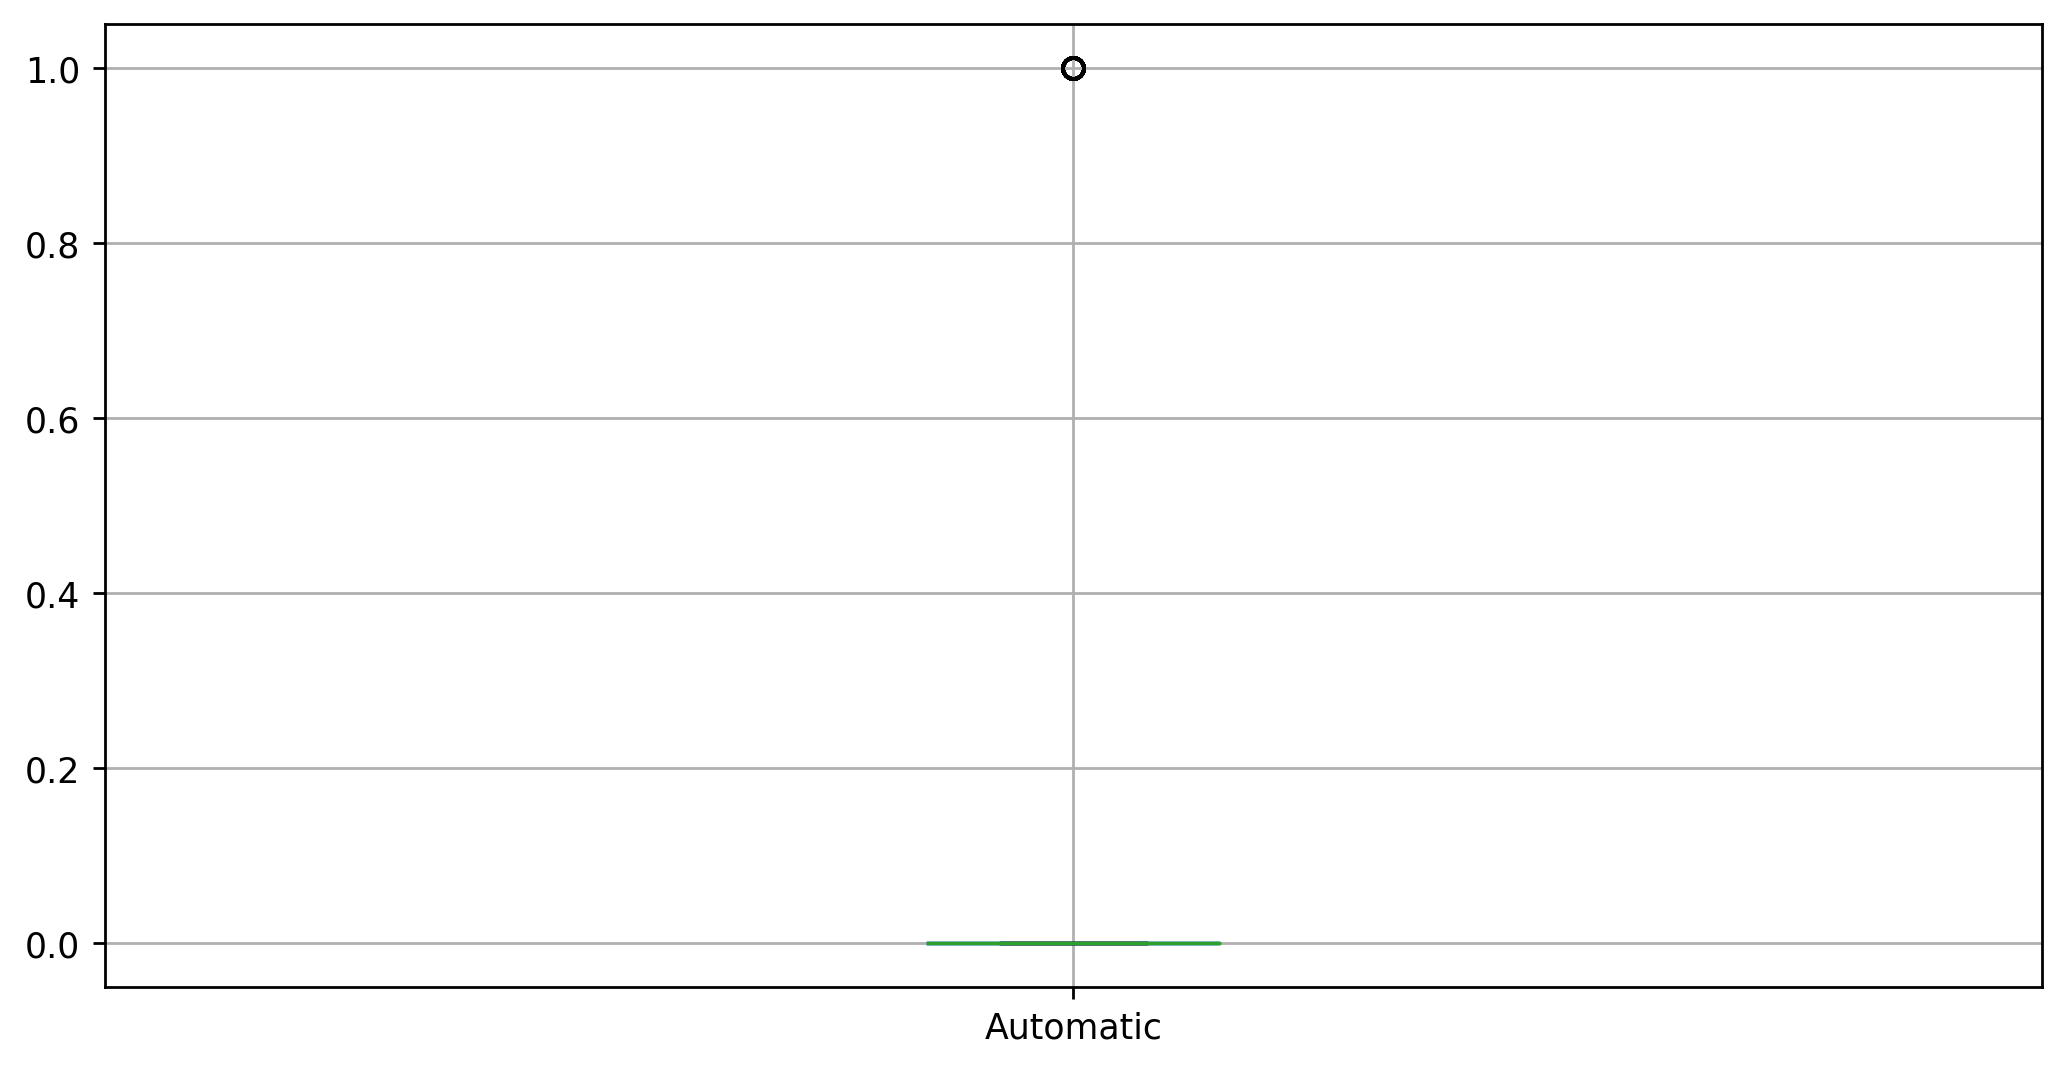

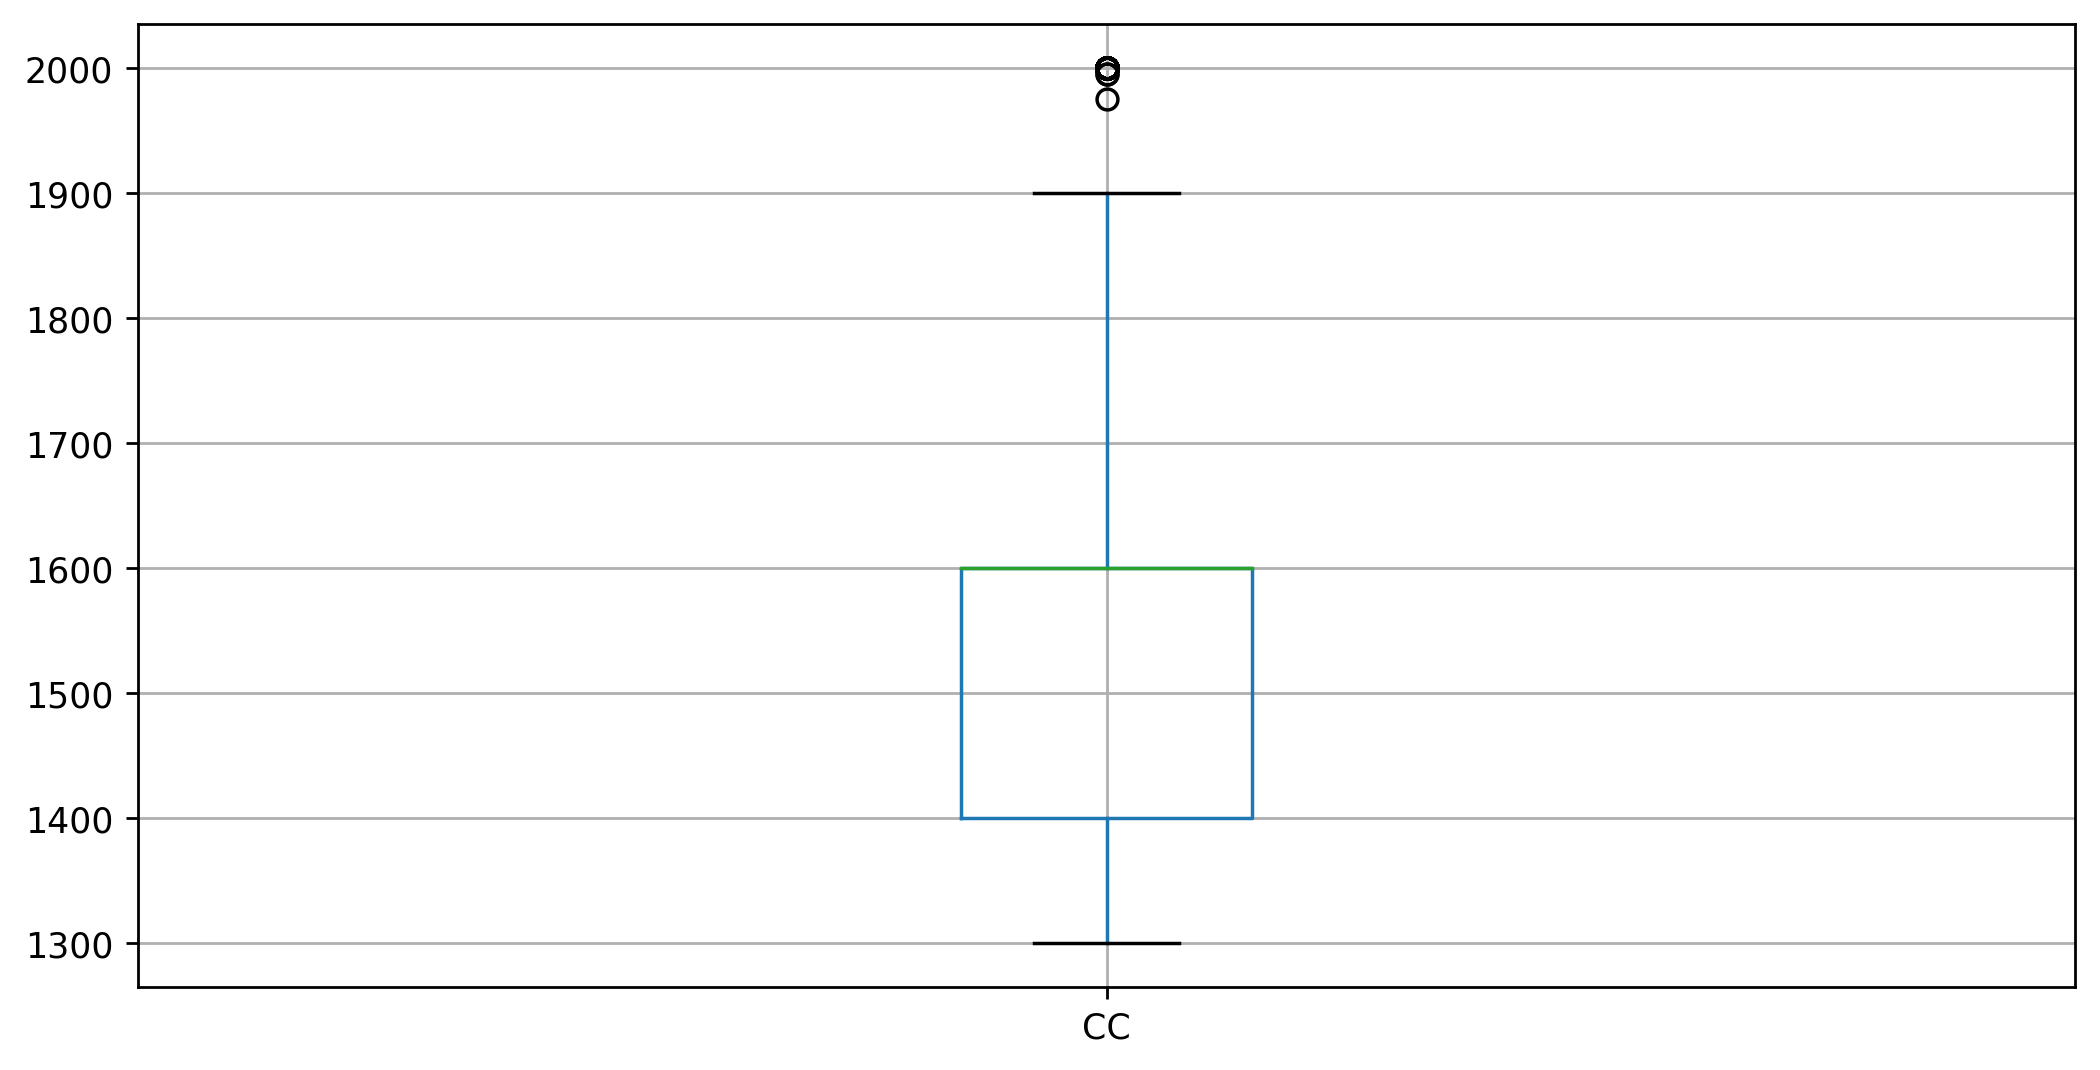

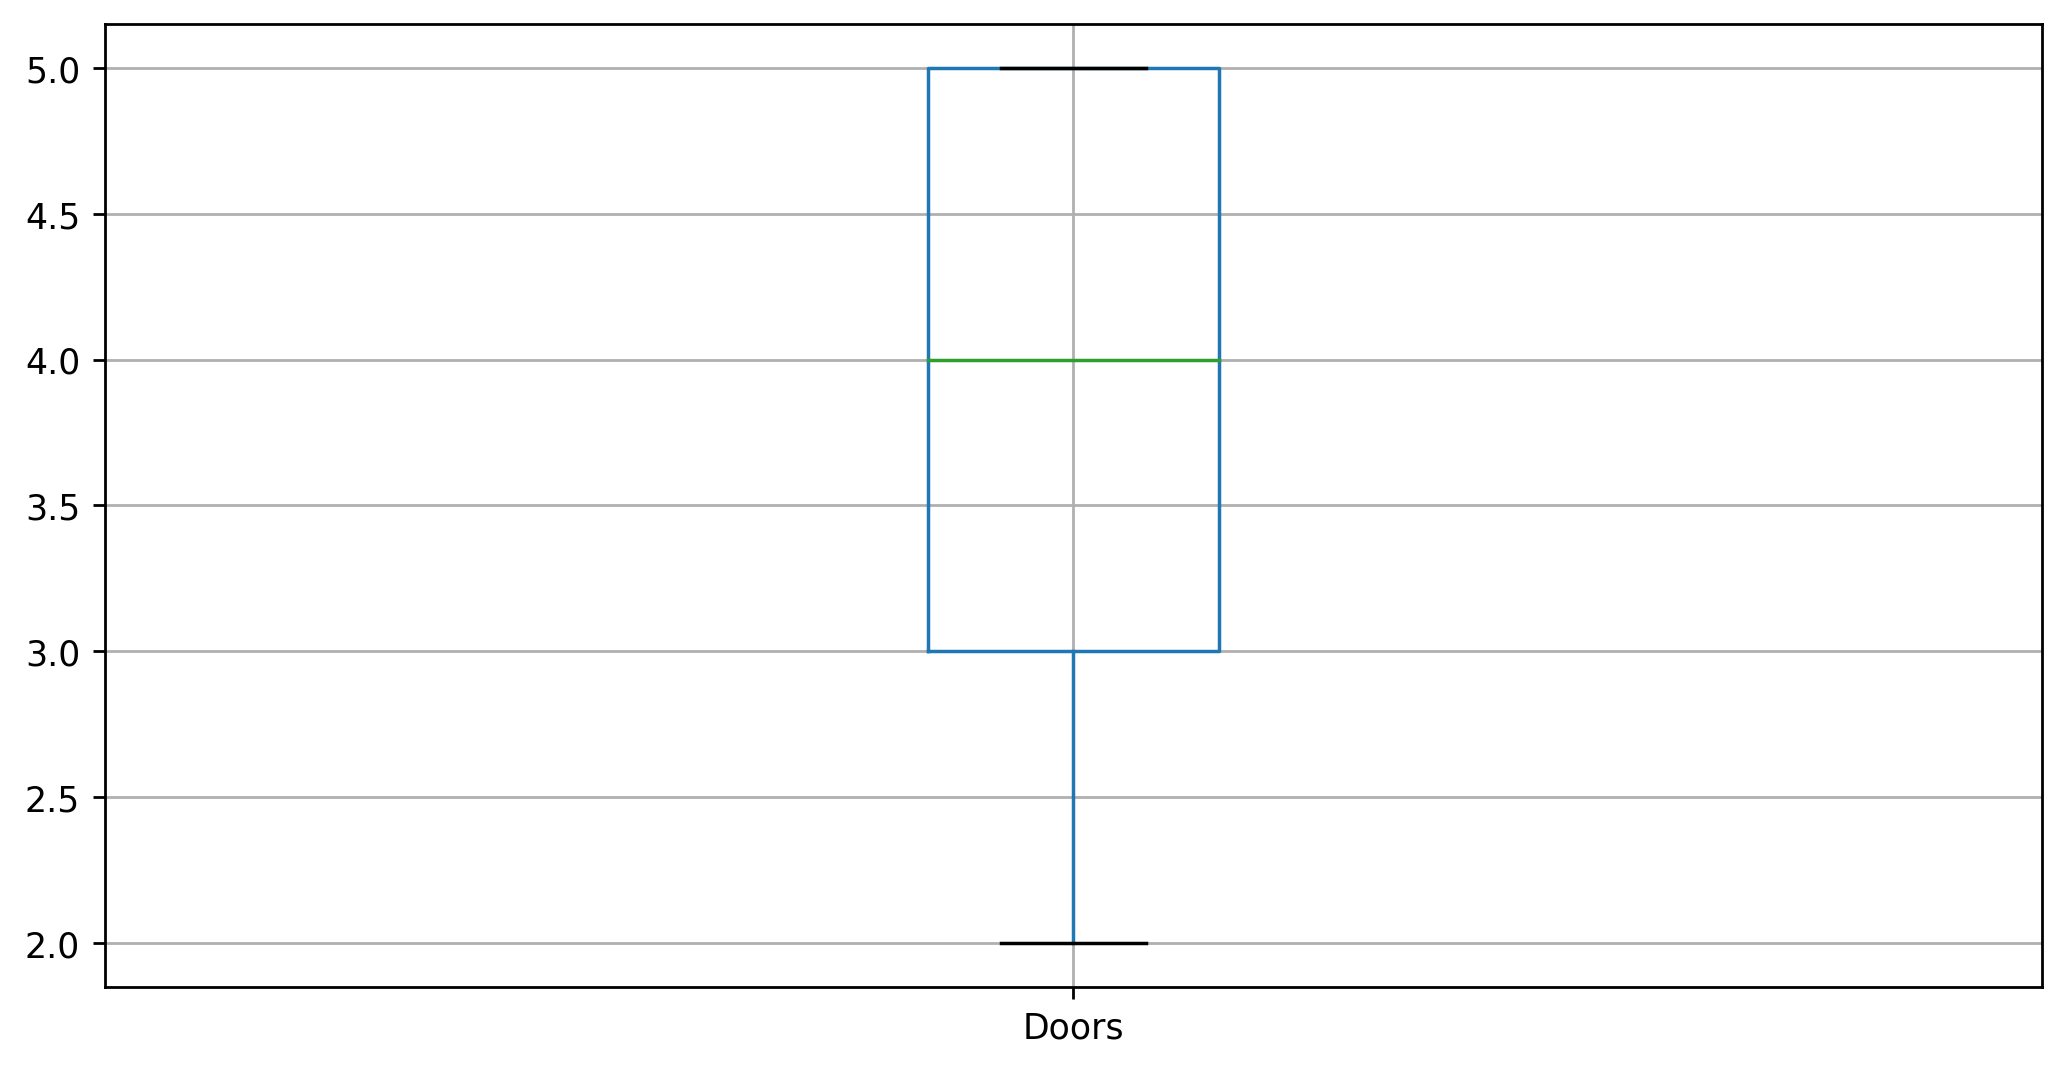

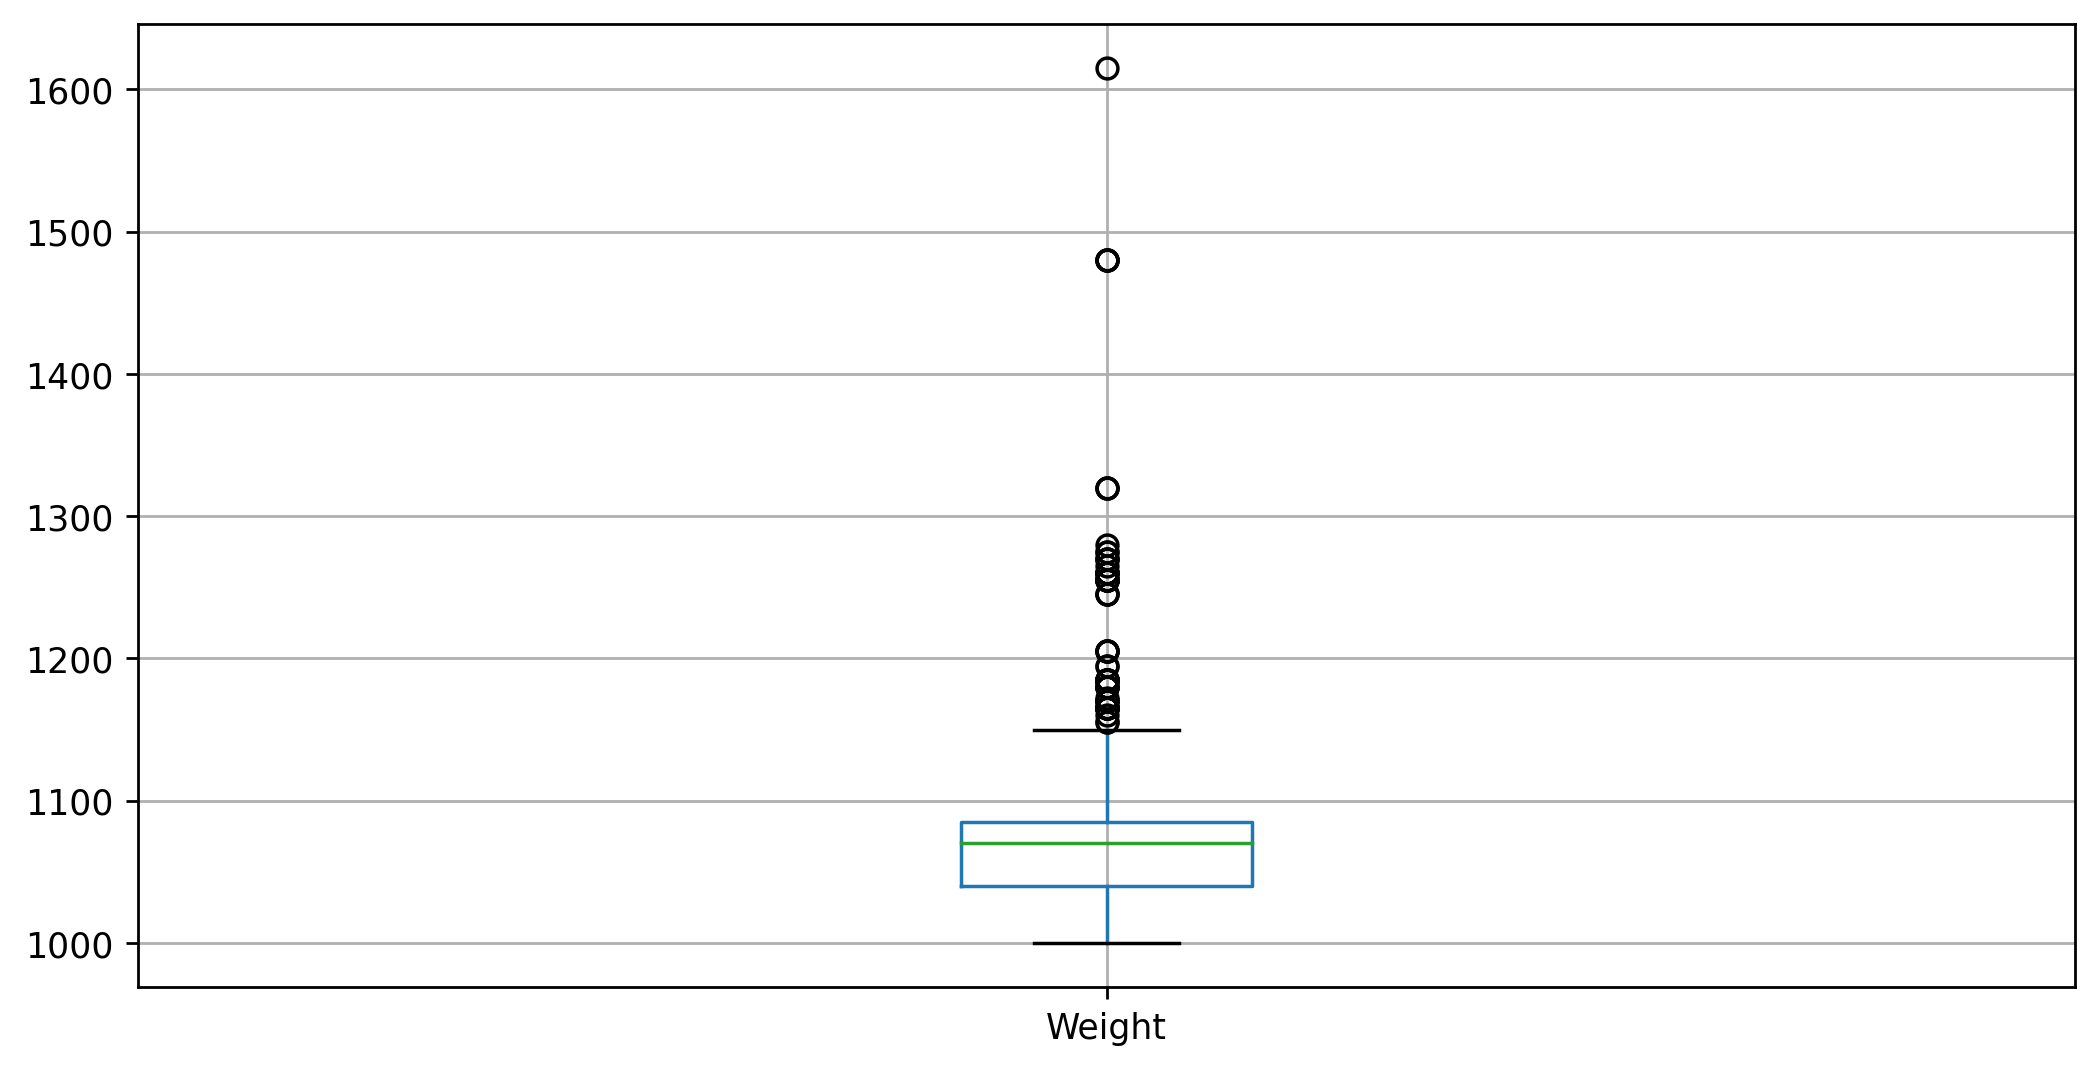

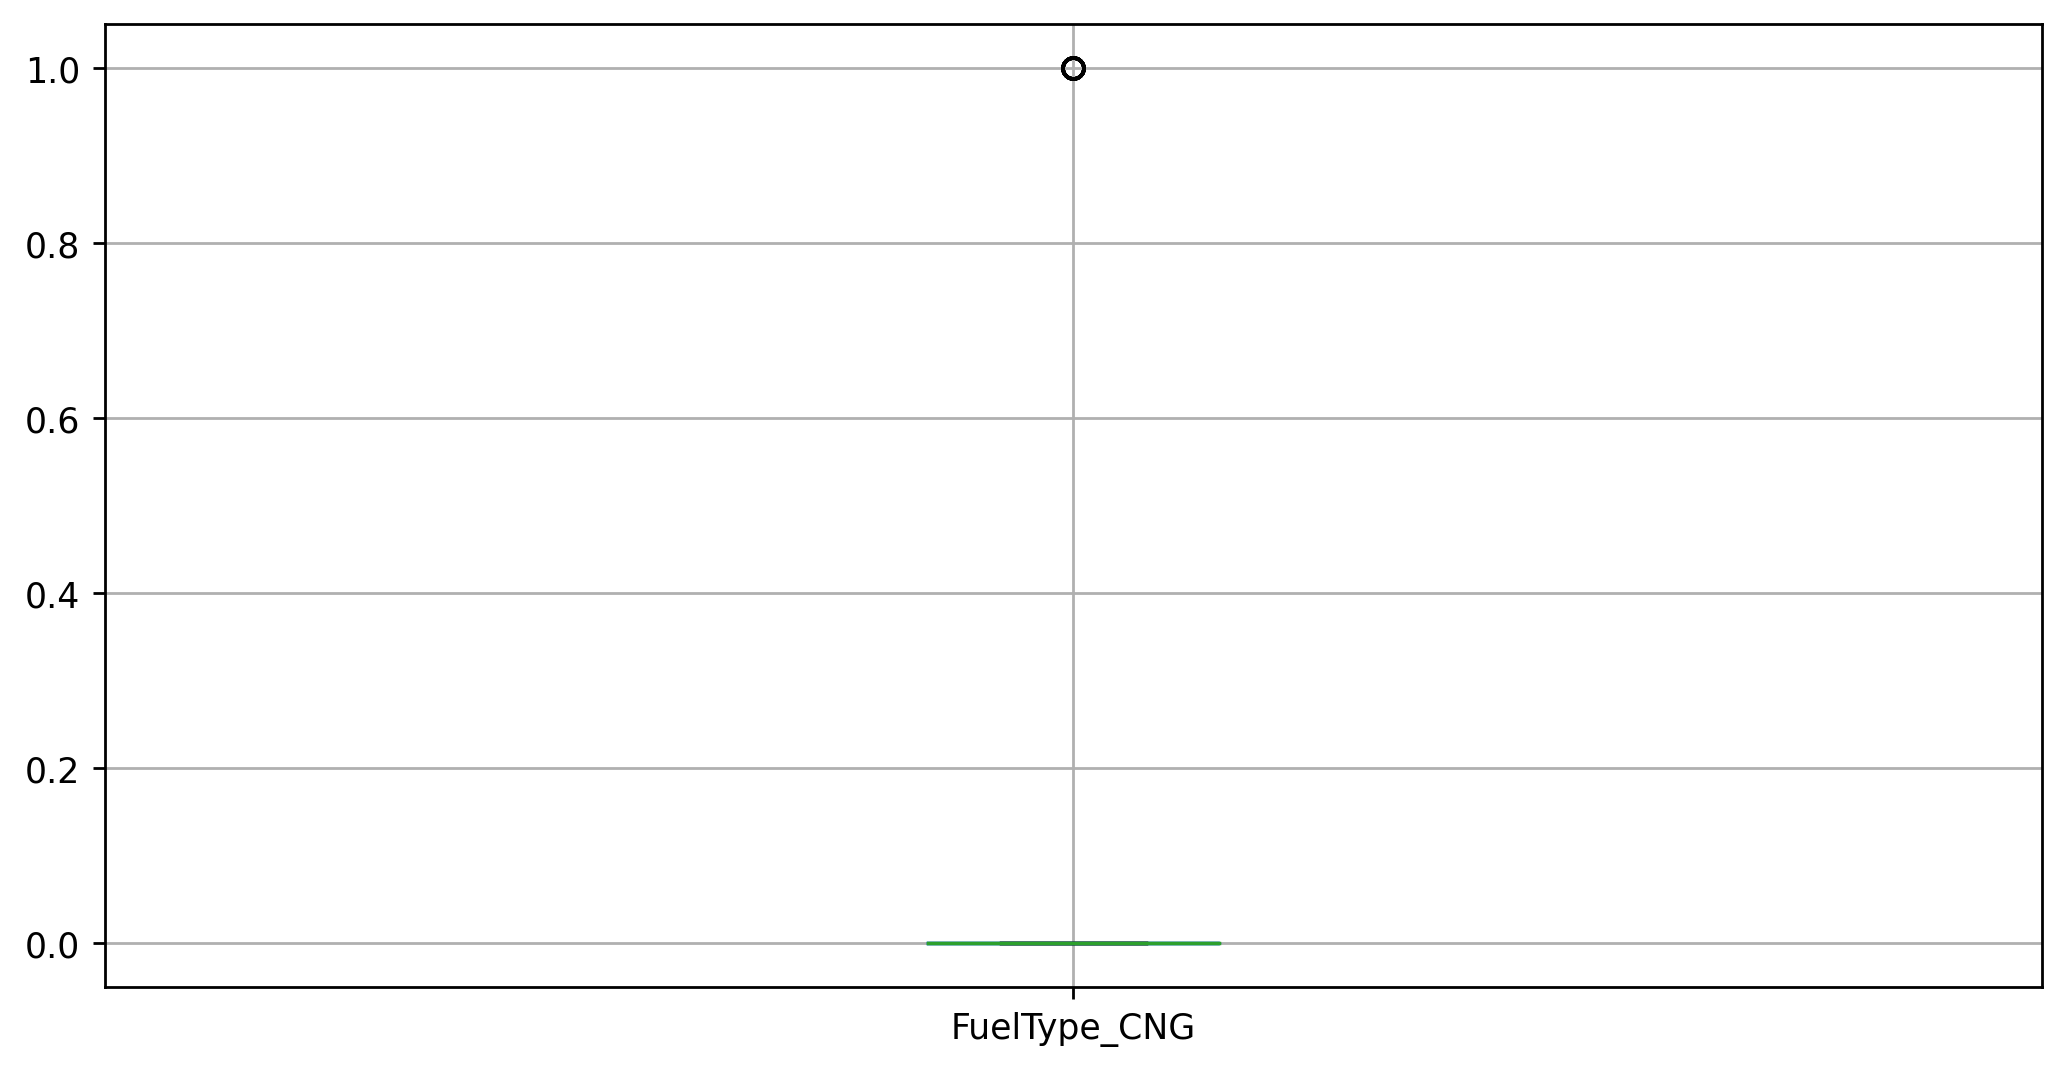

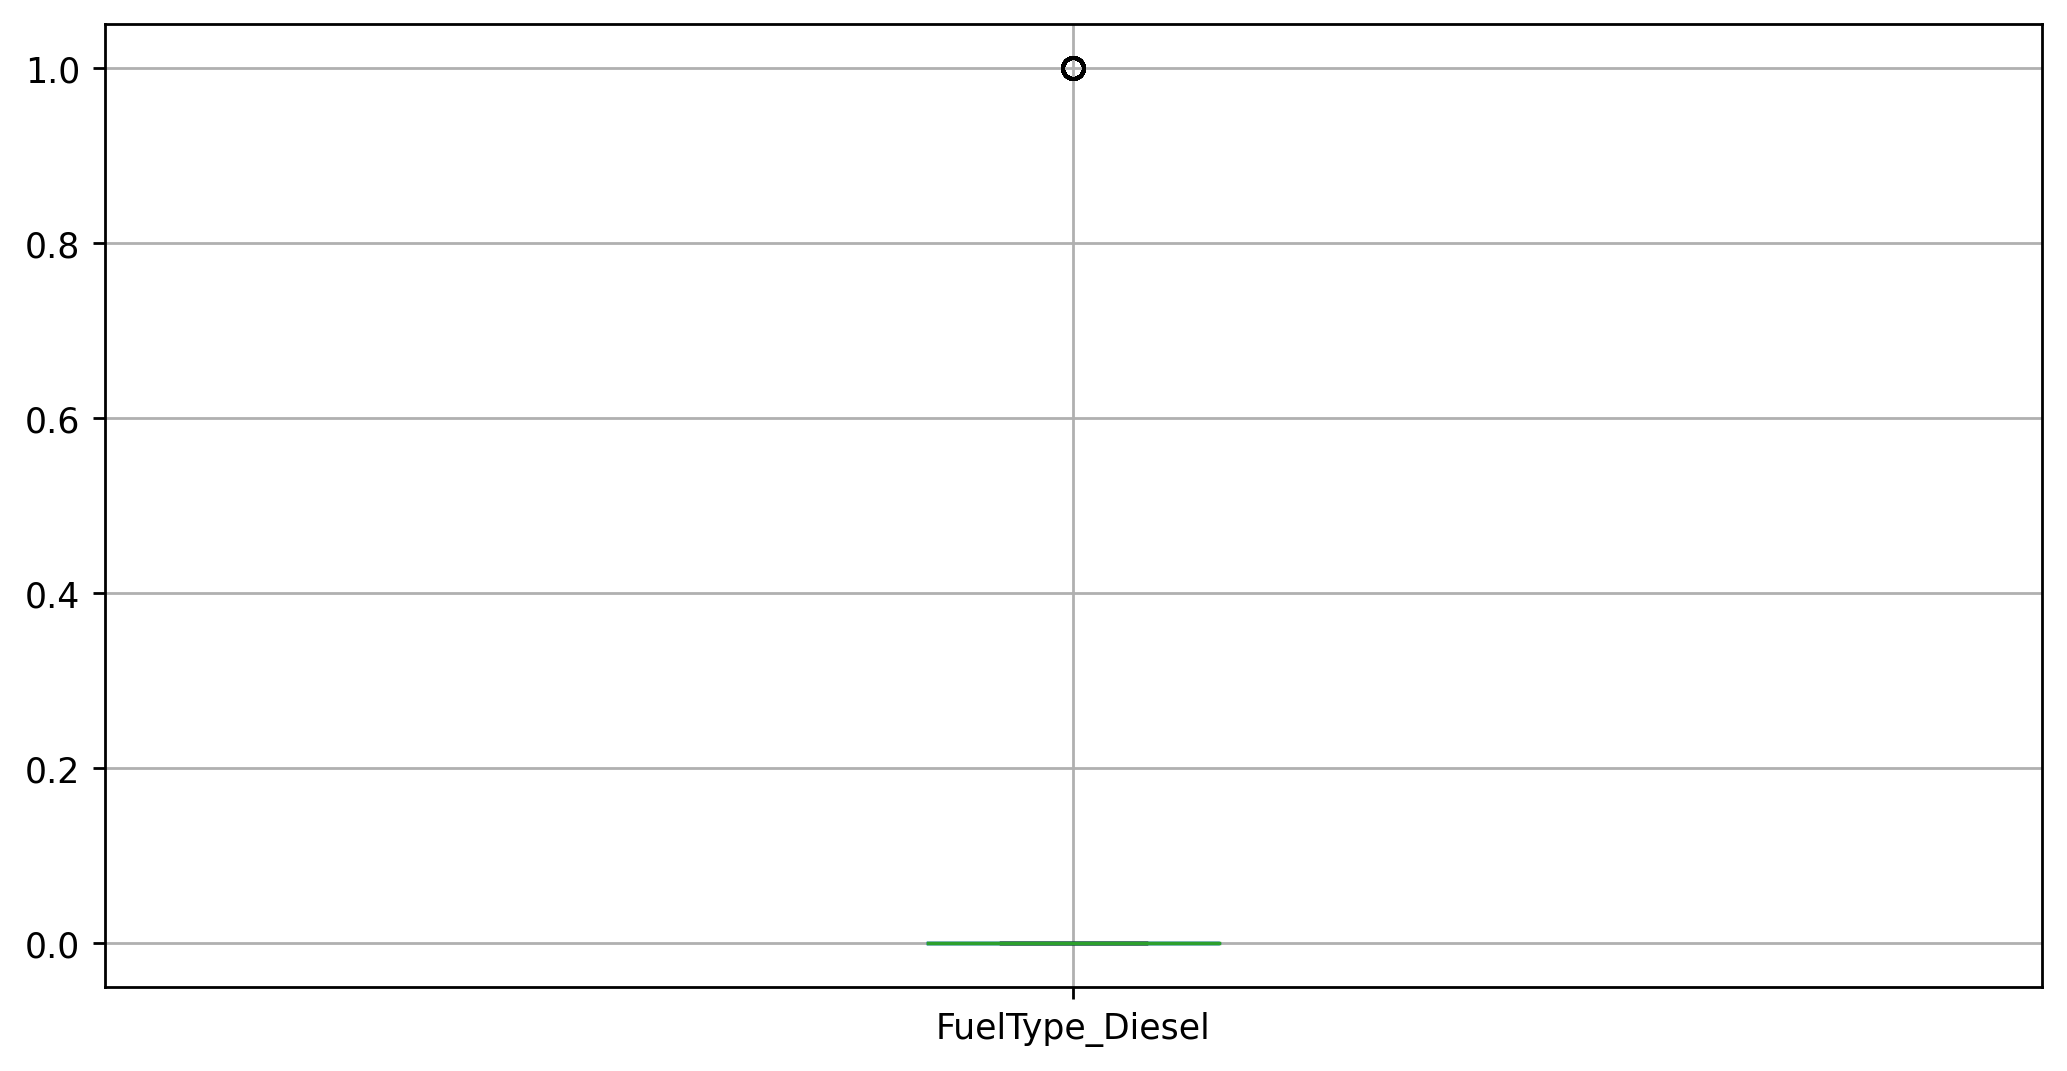

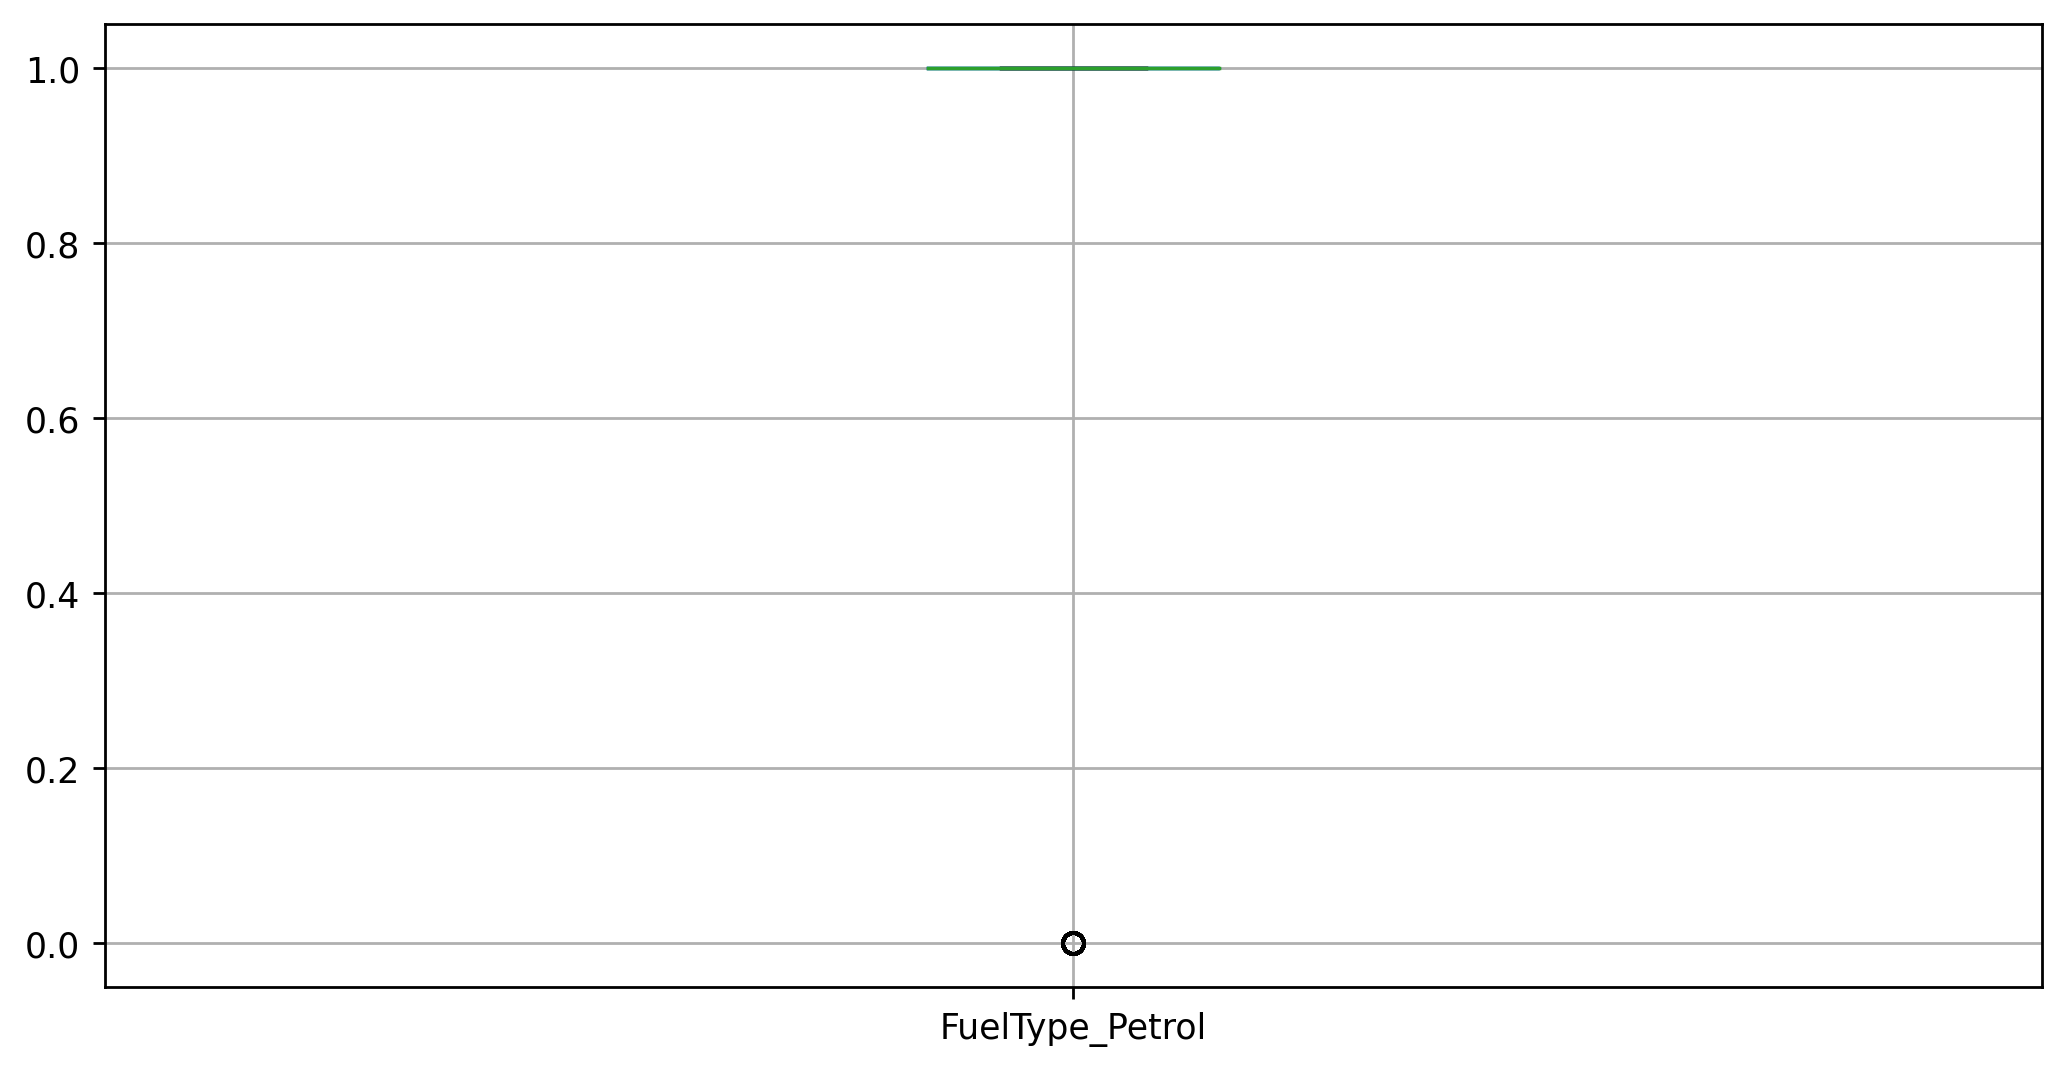

In [15]:
for columns in data:
    plt.figure()
    data.boxplot([columns])

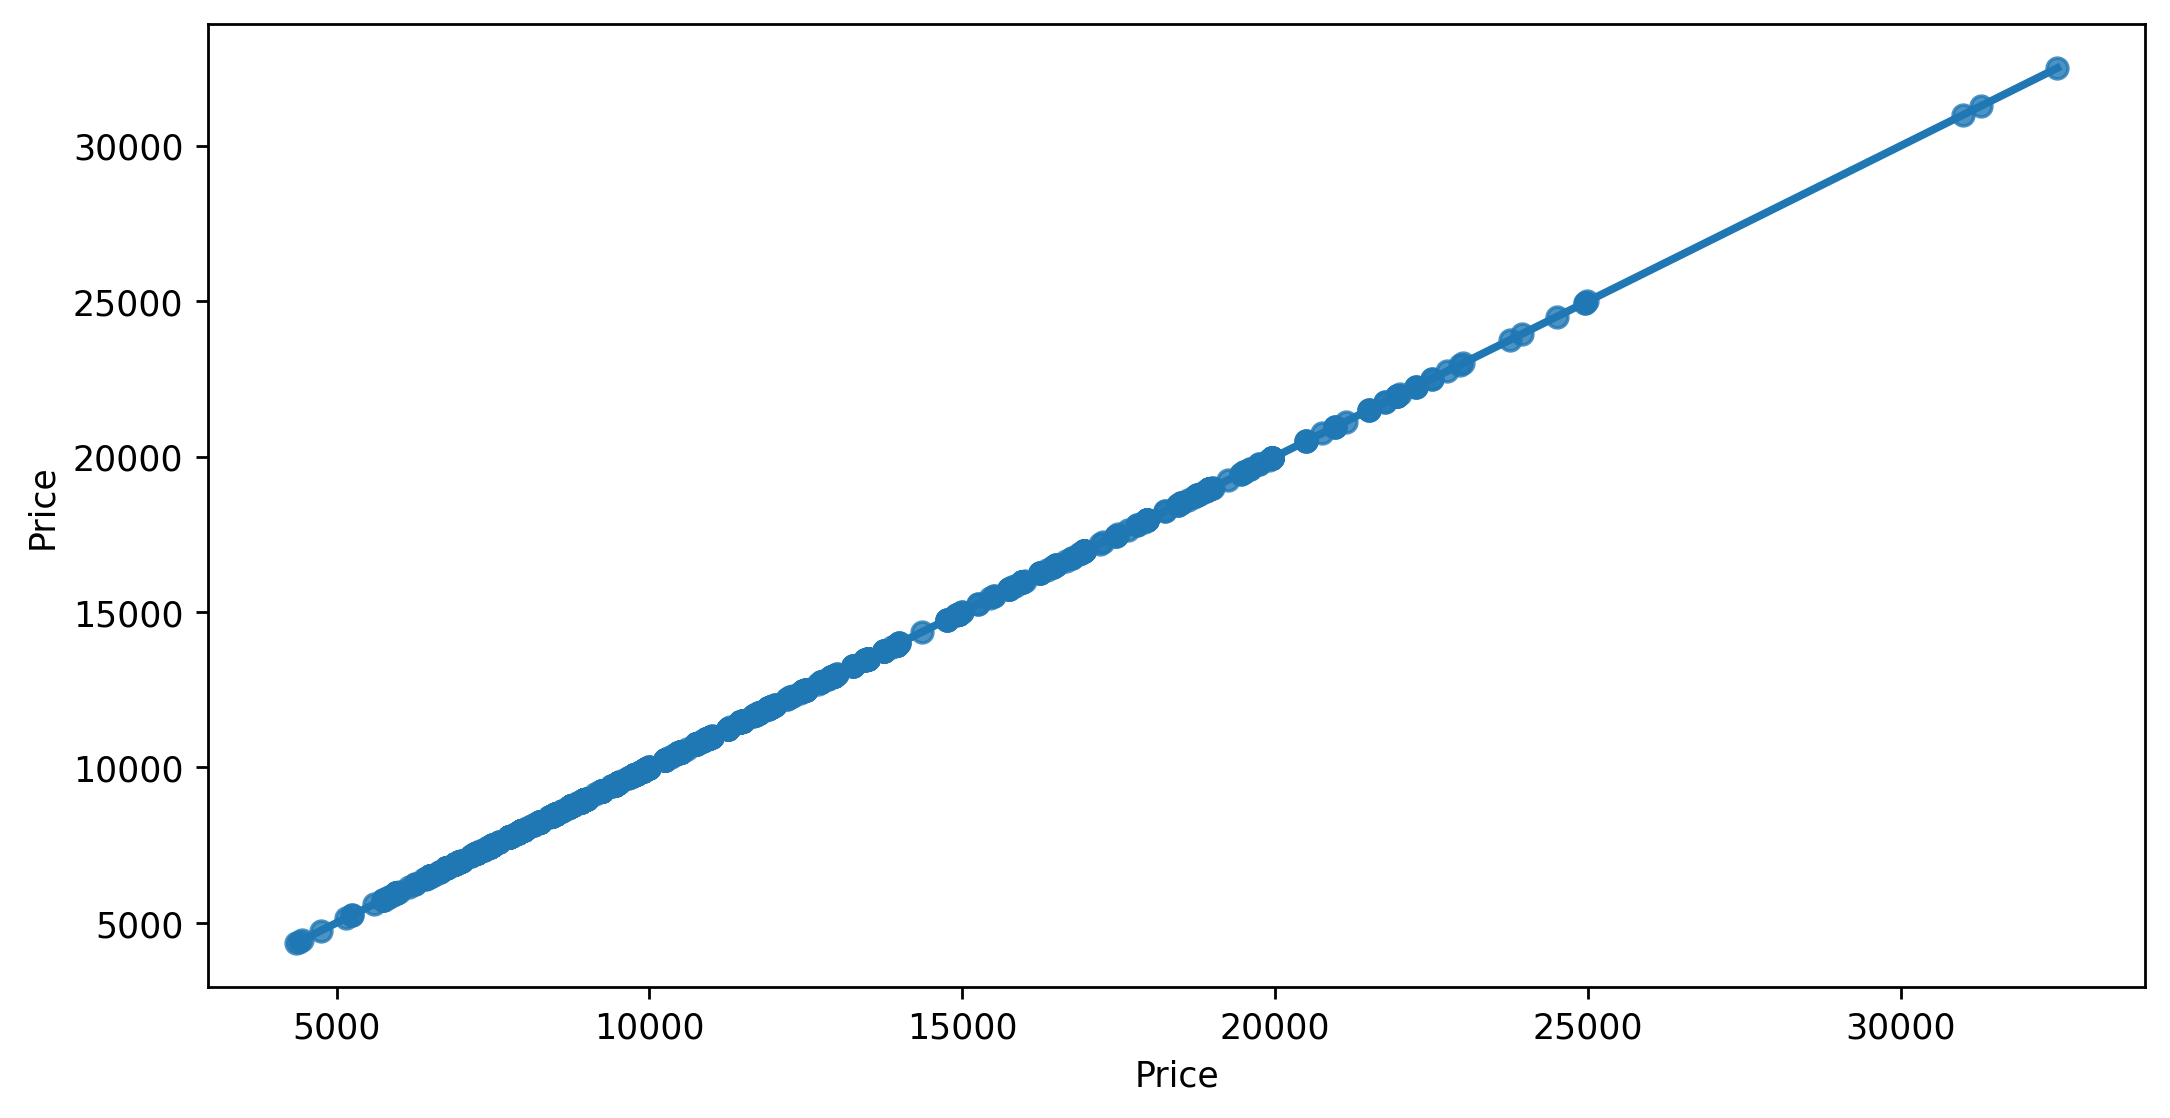

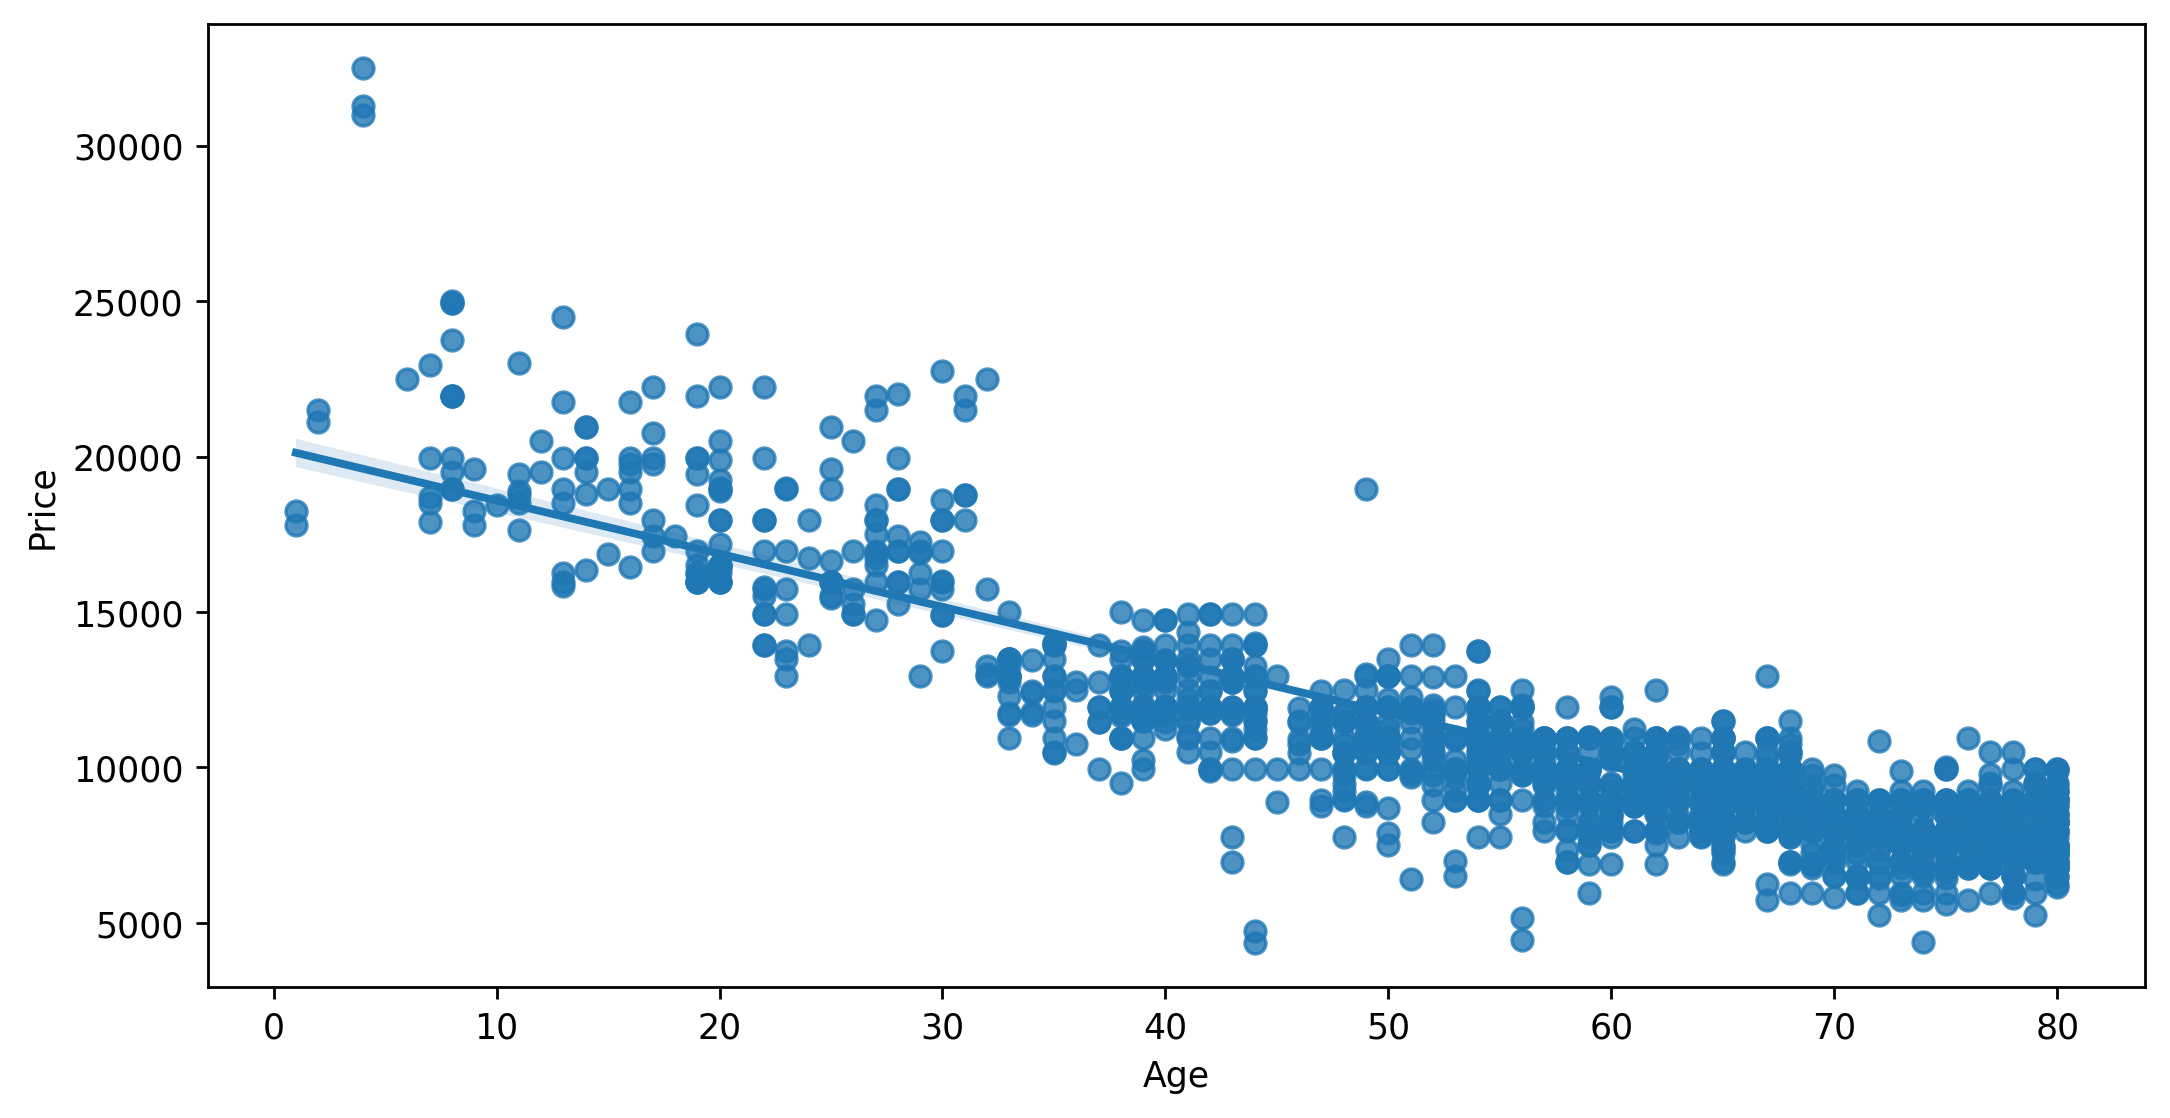

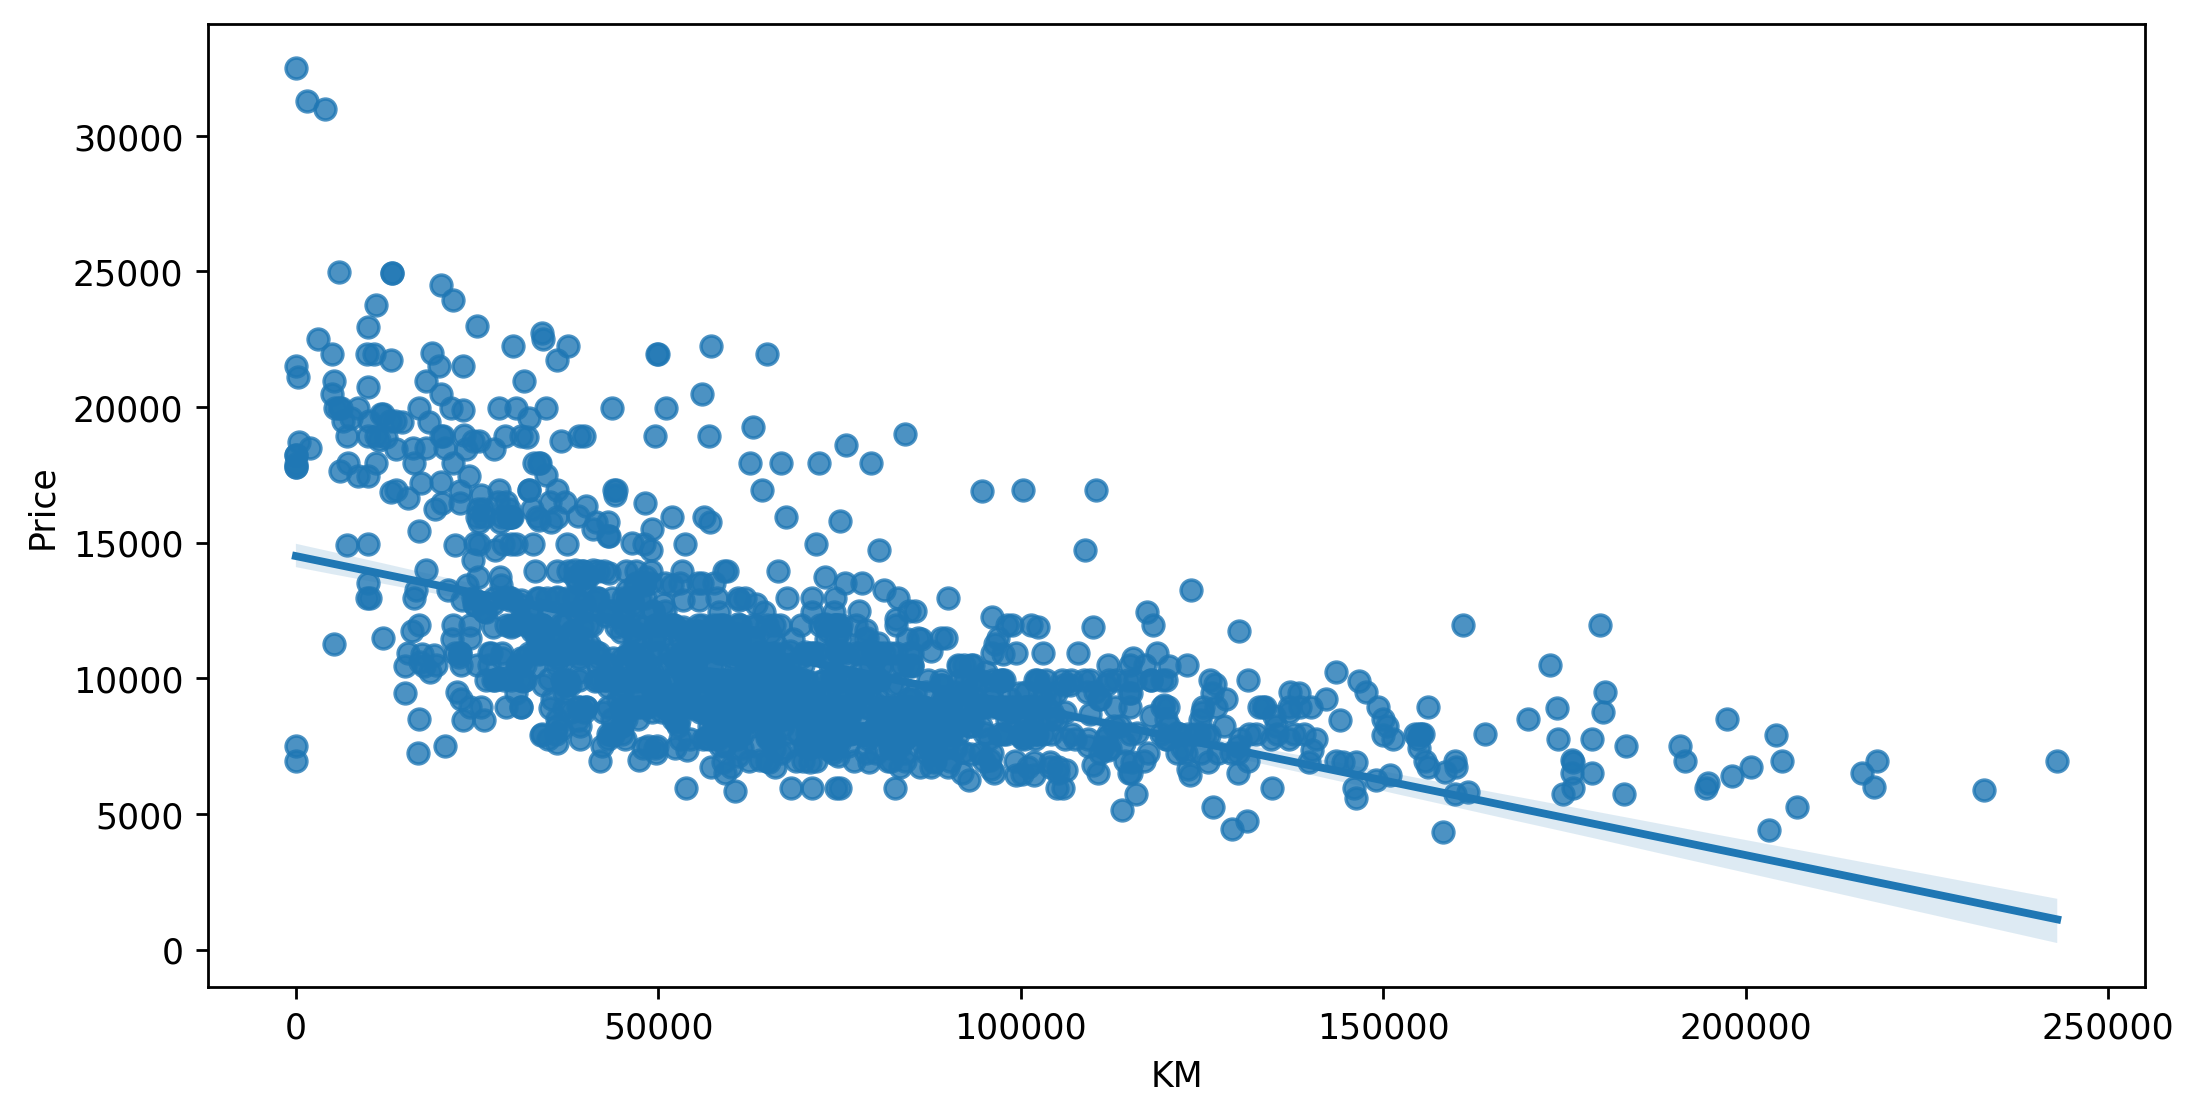

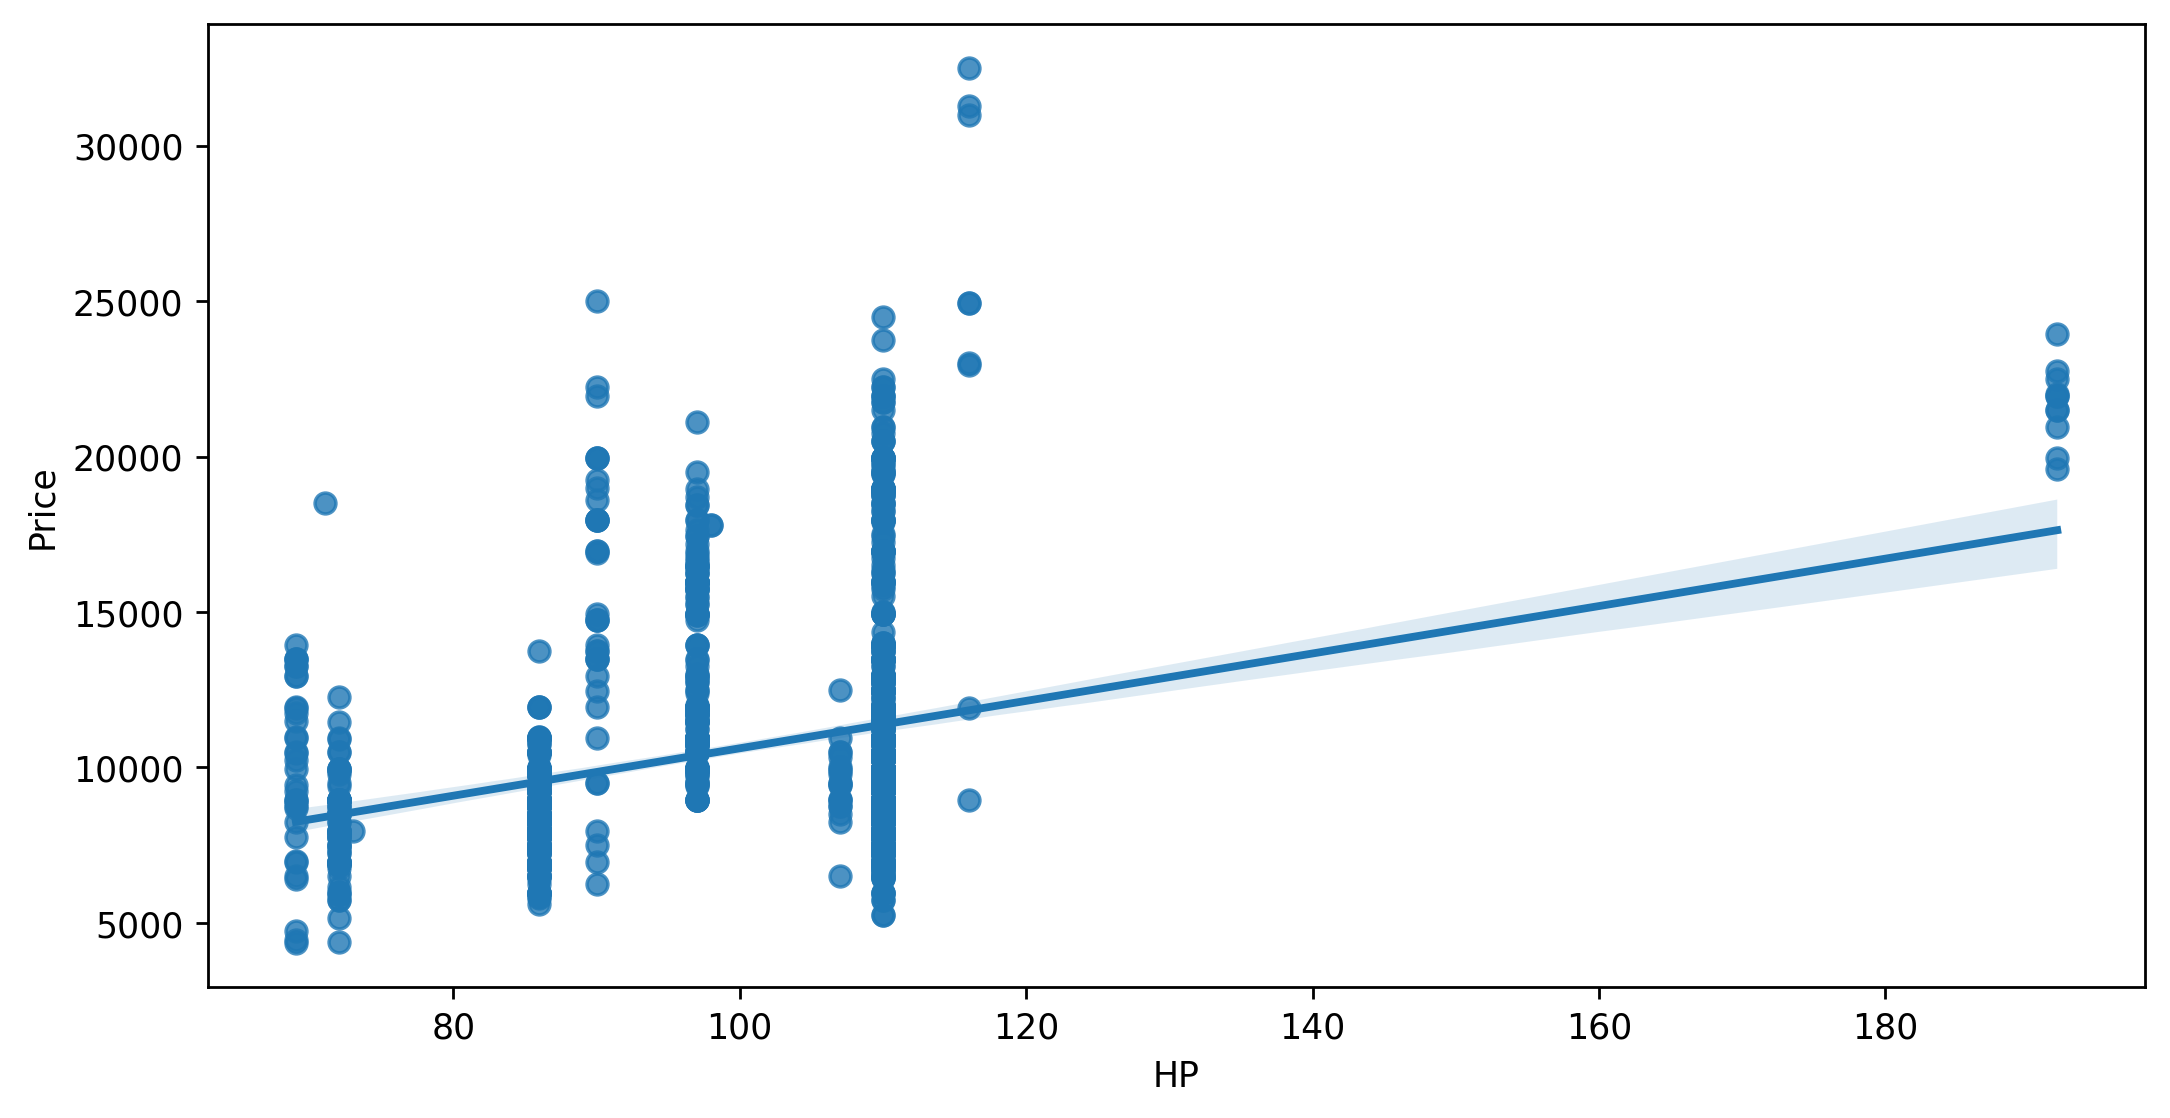

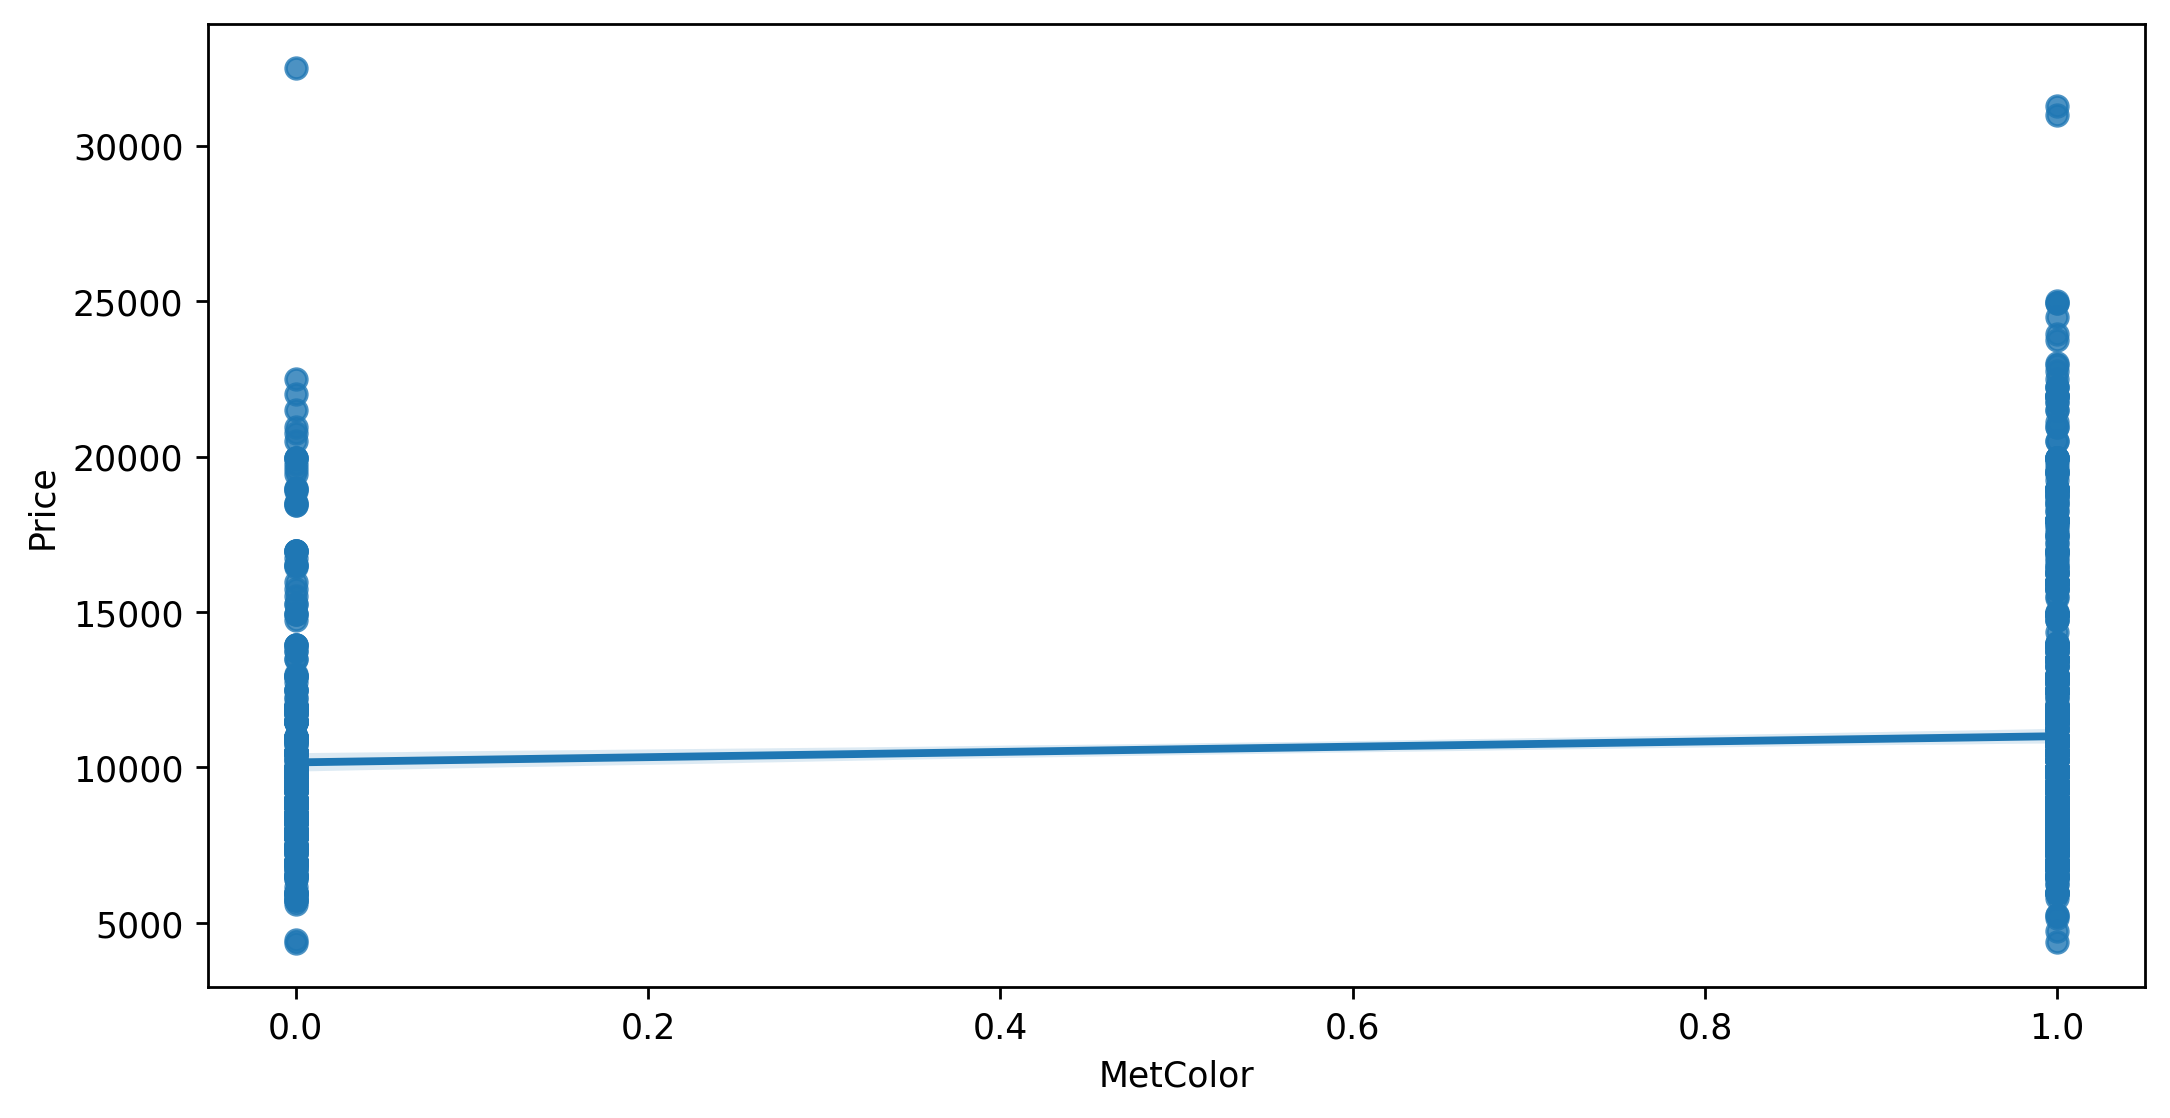

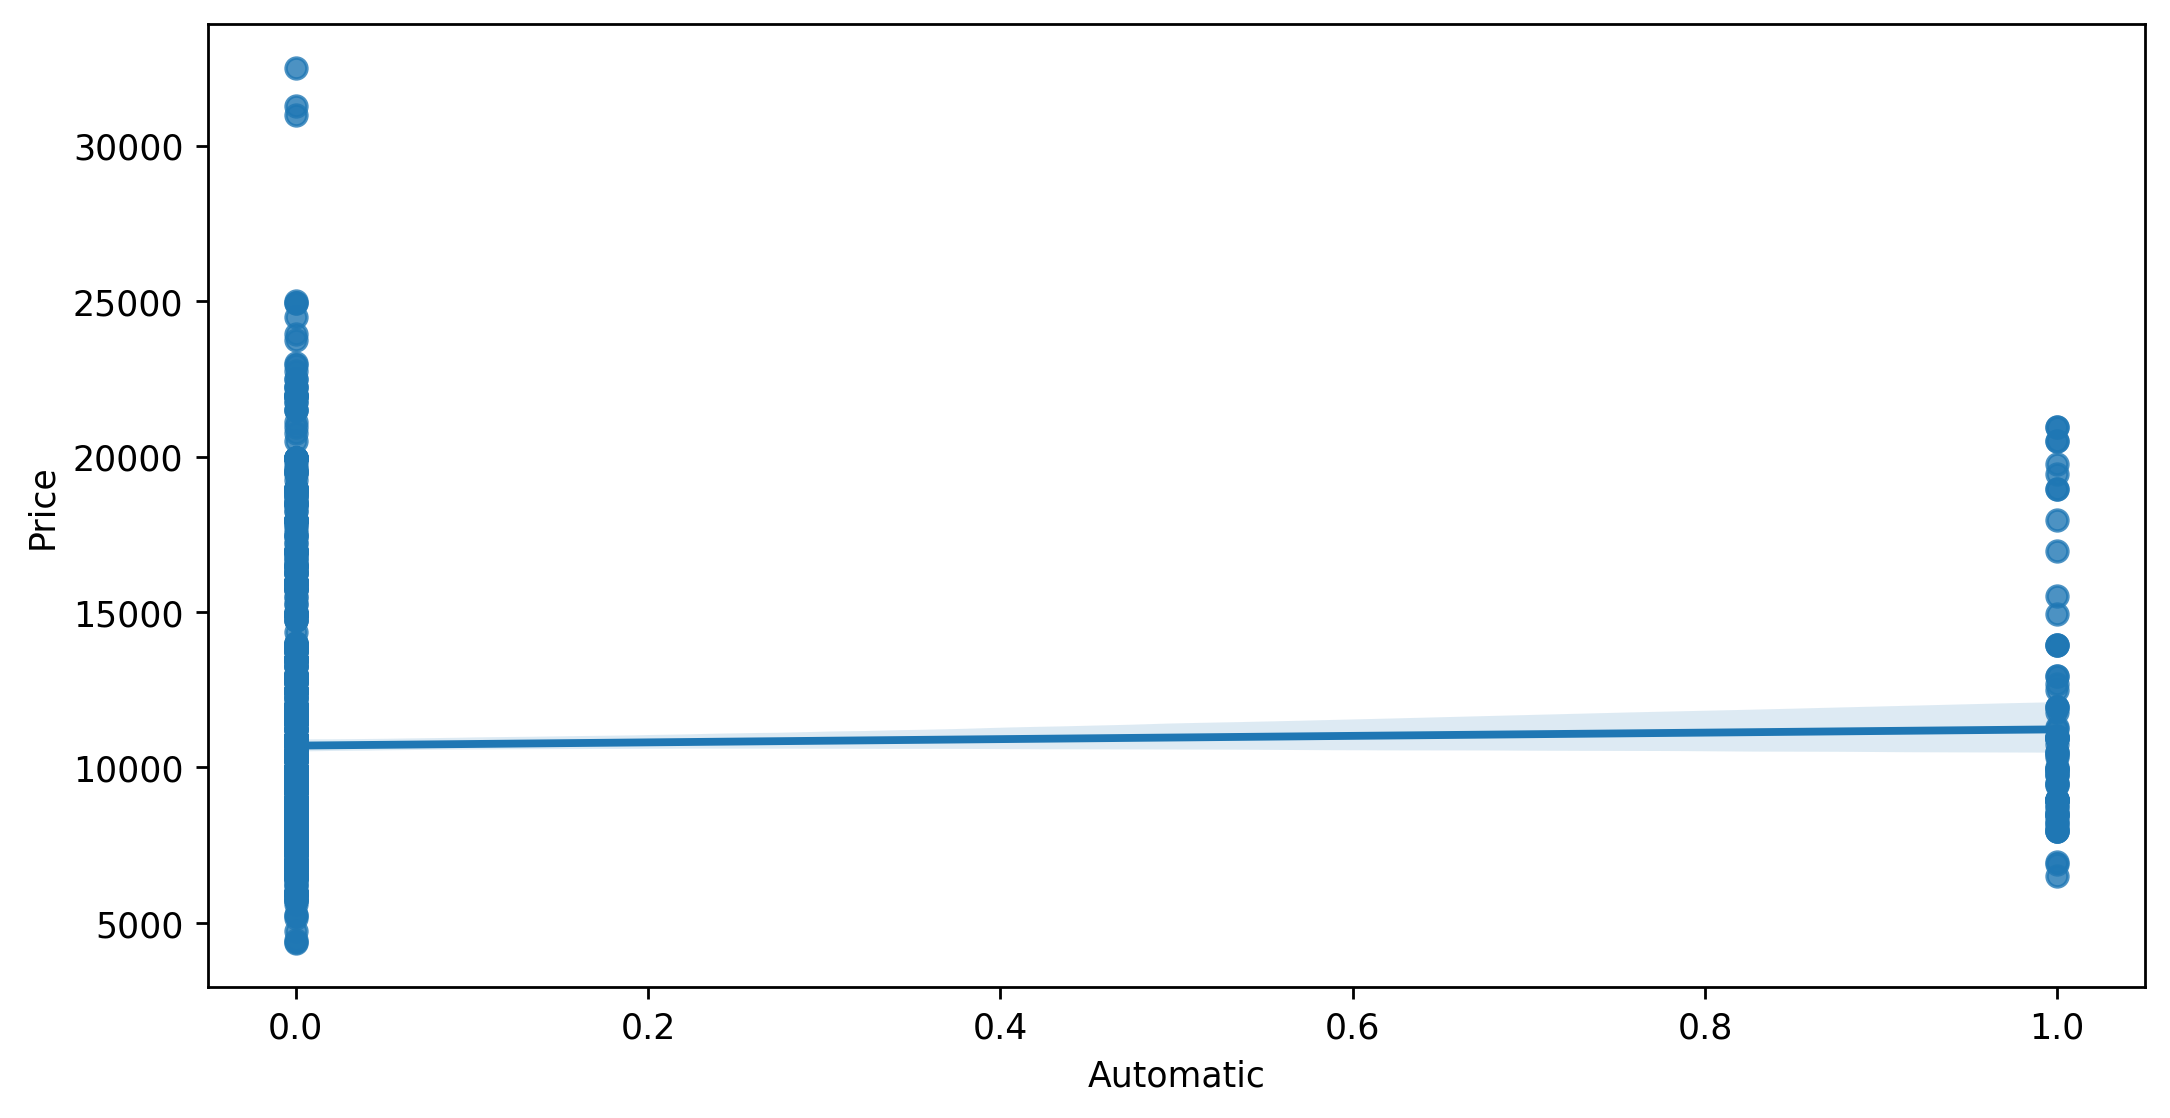

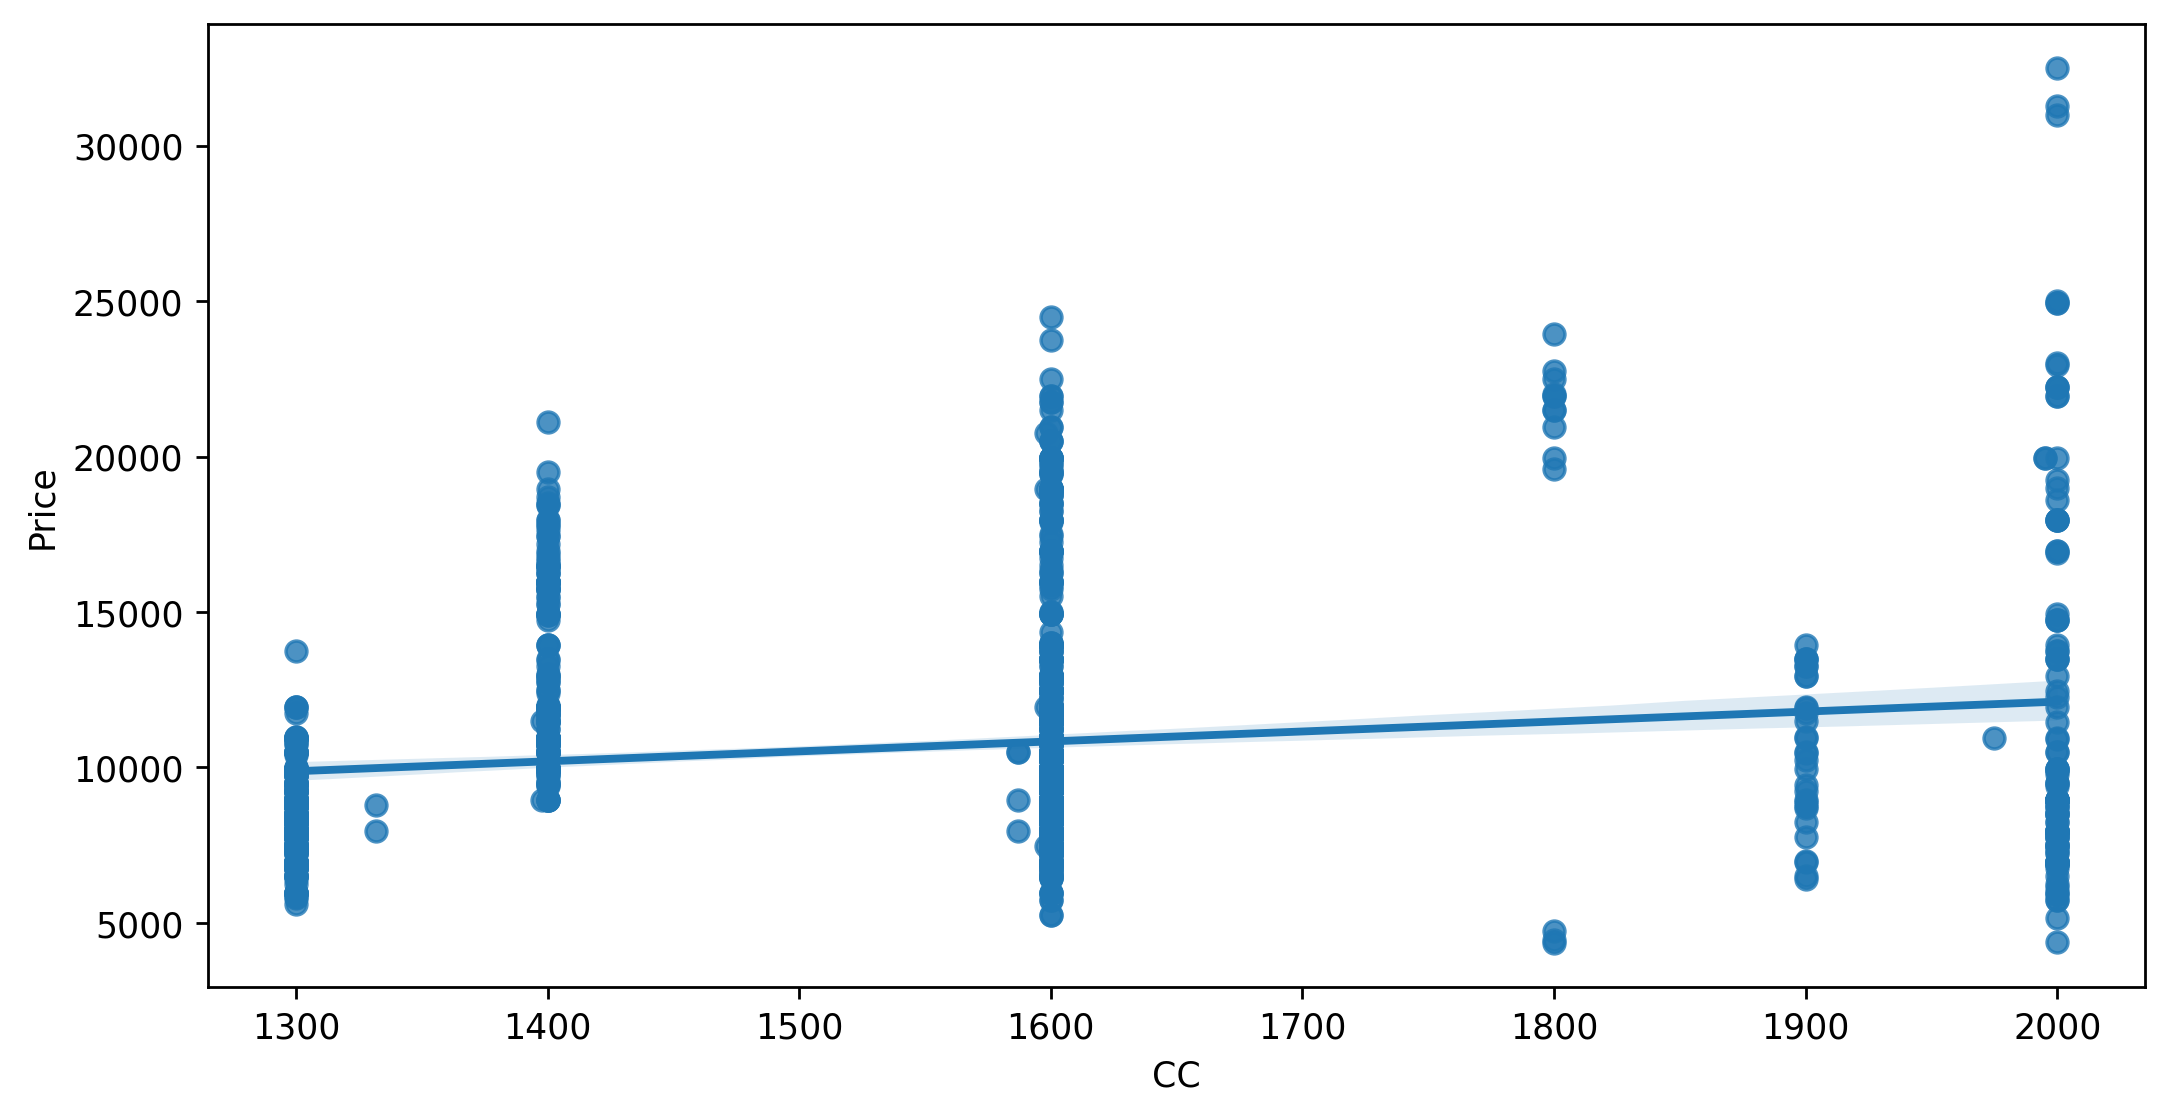

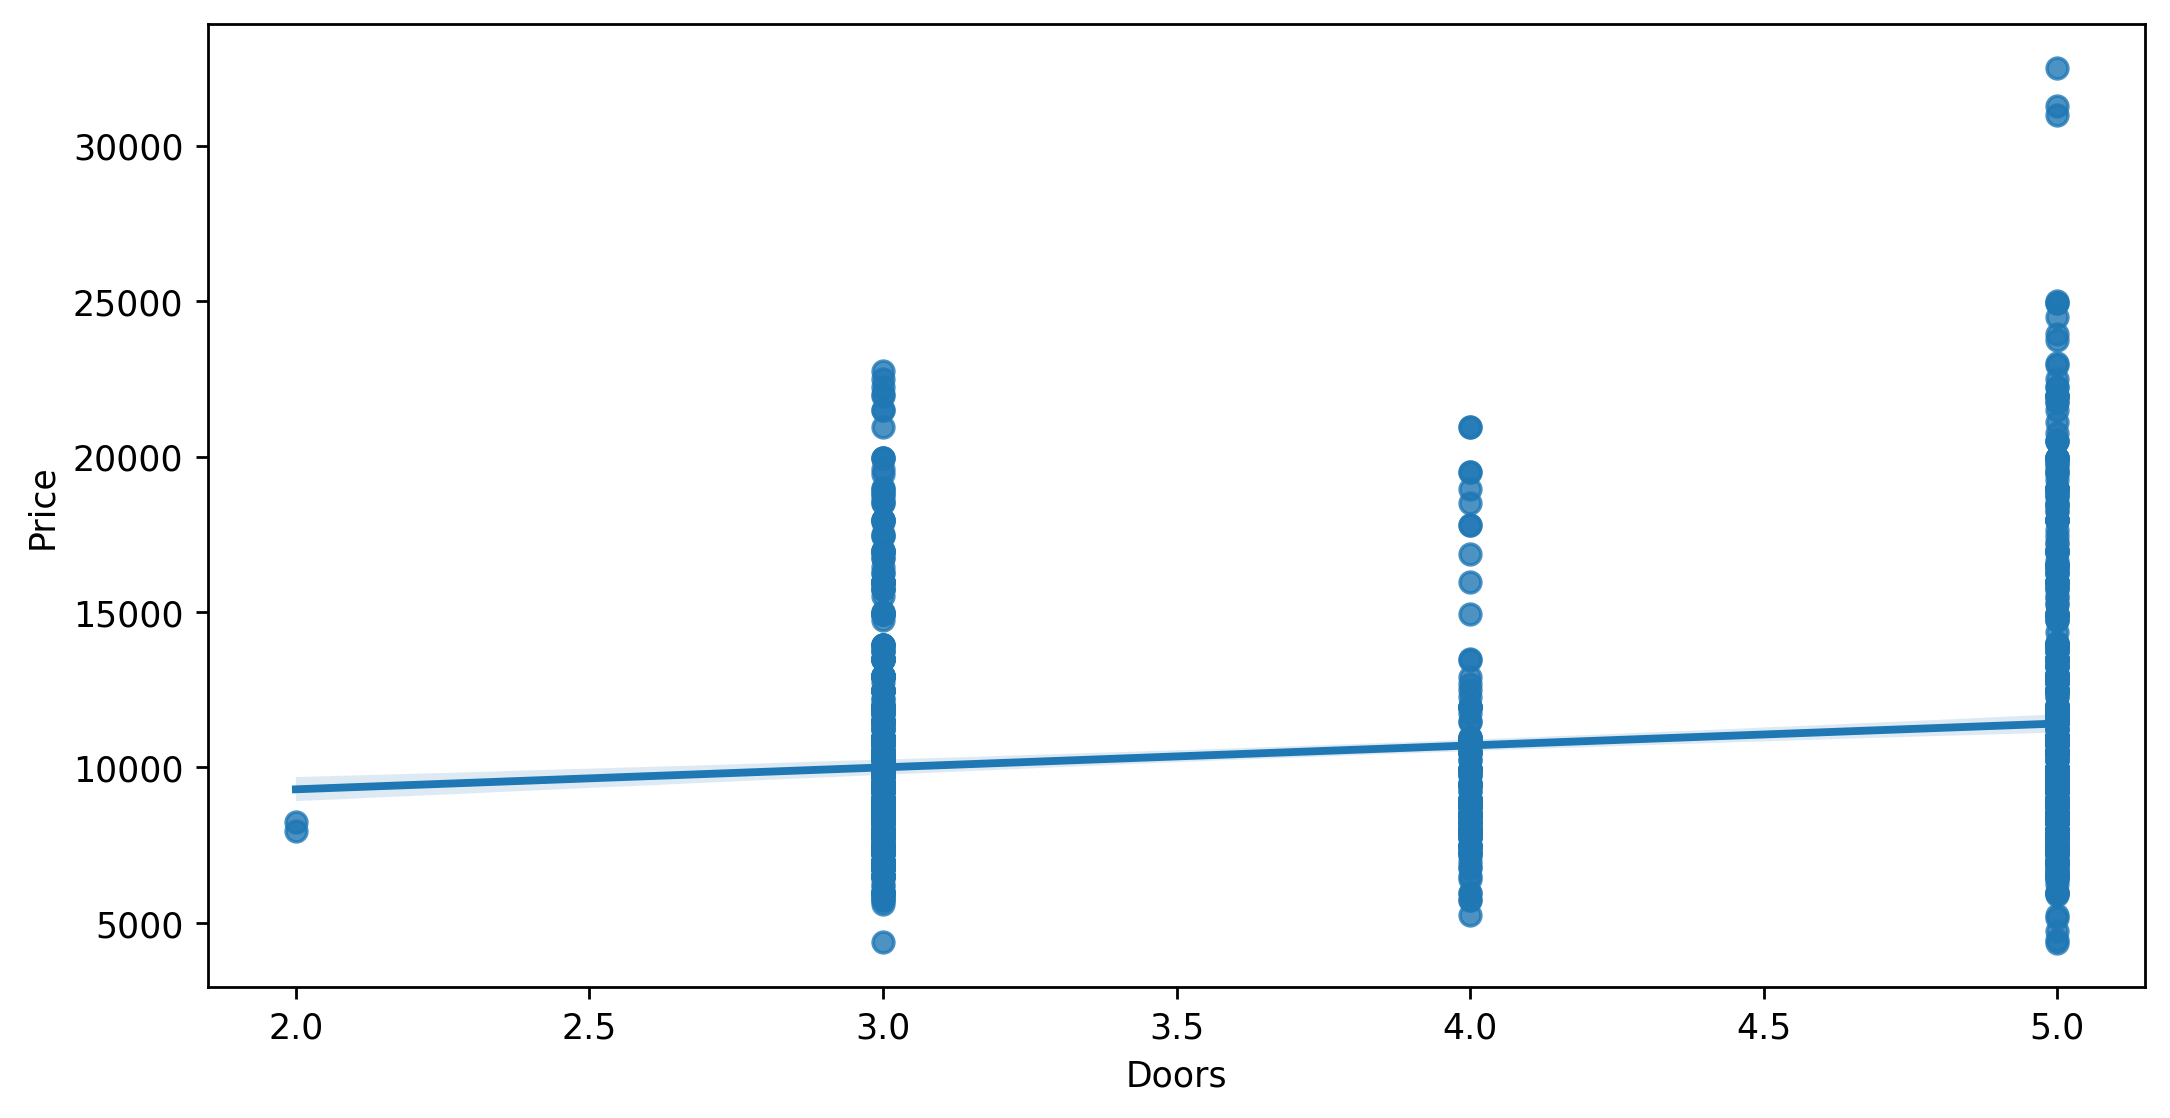

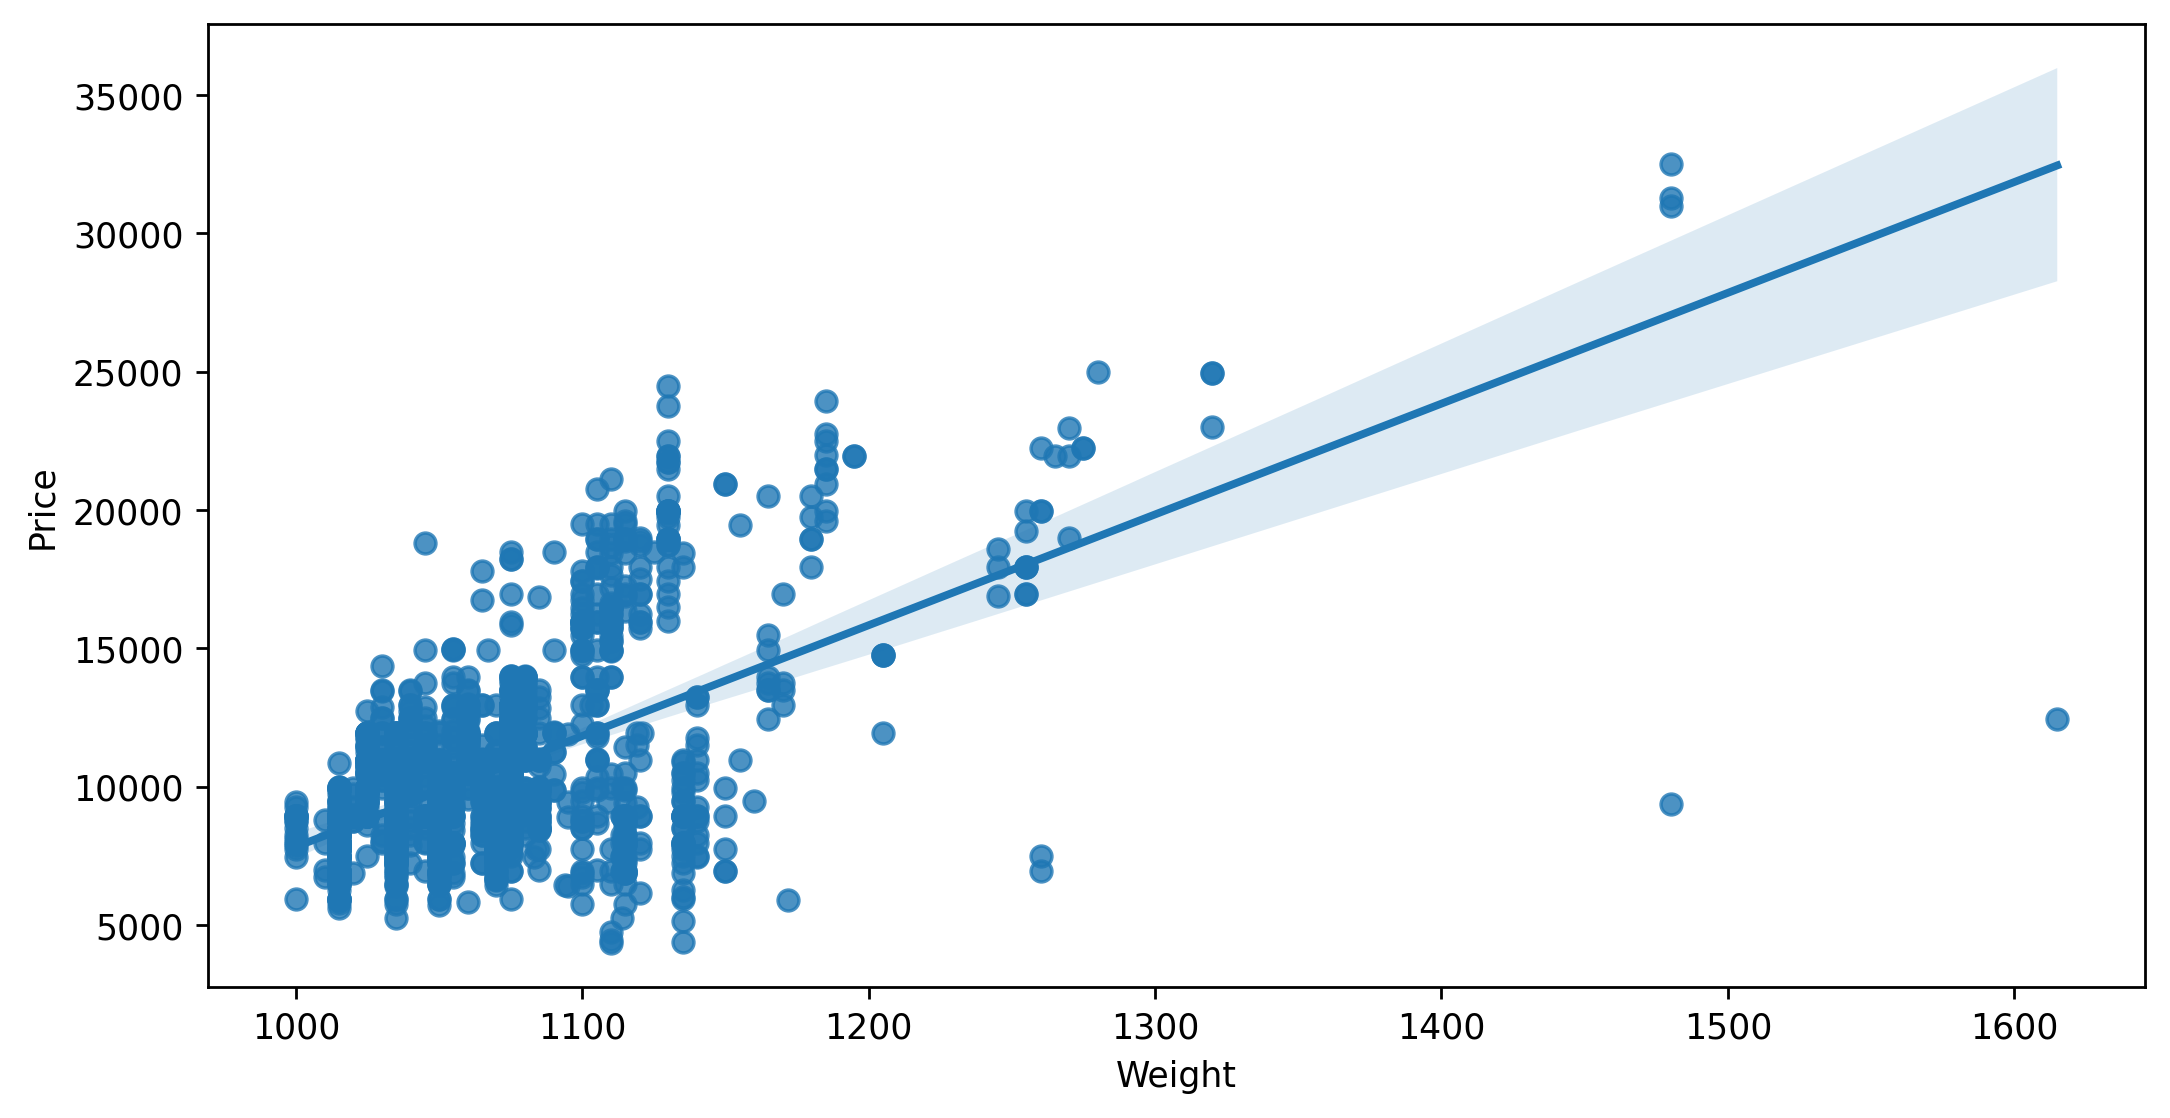

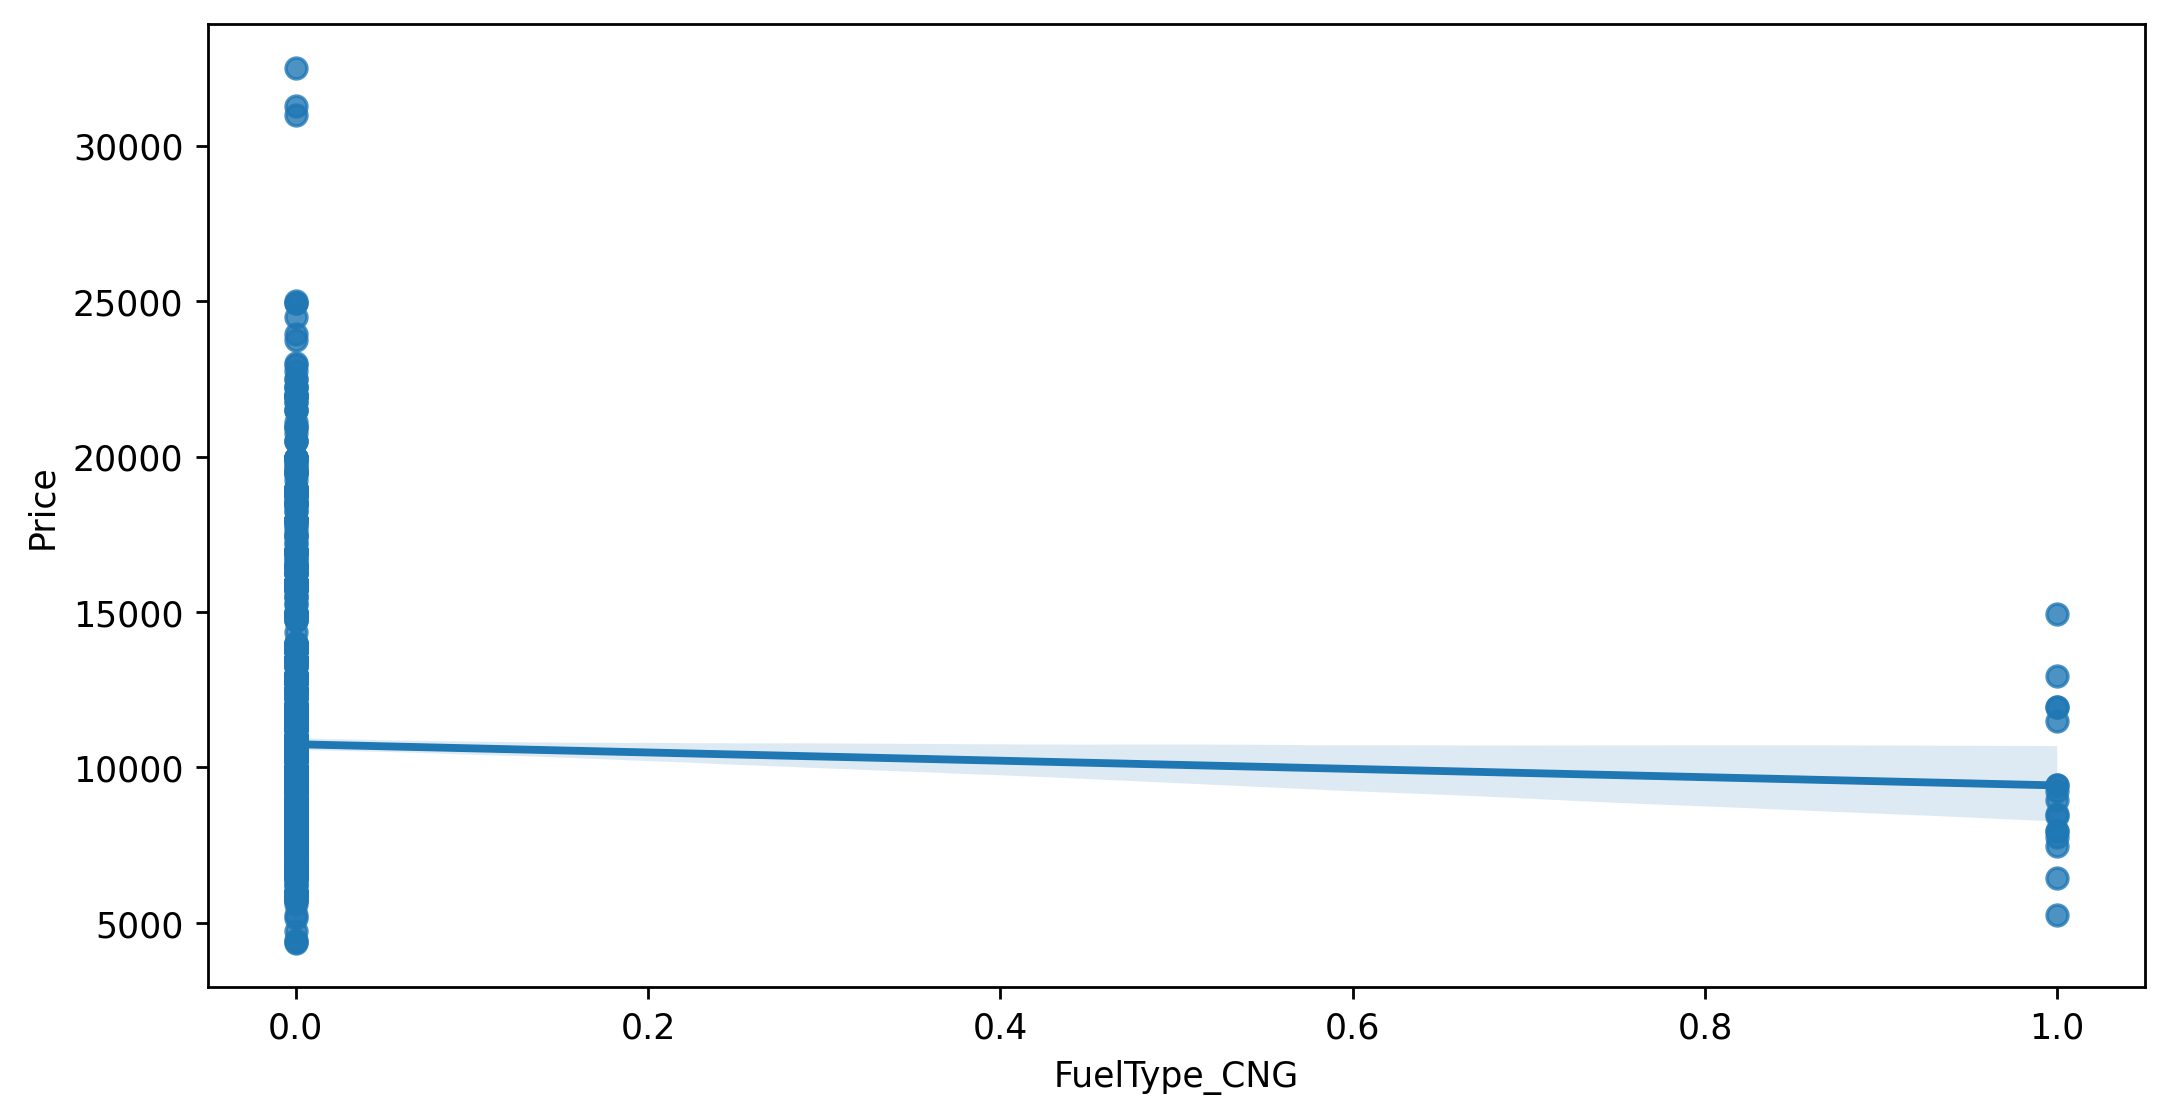

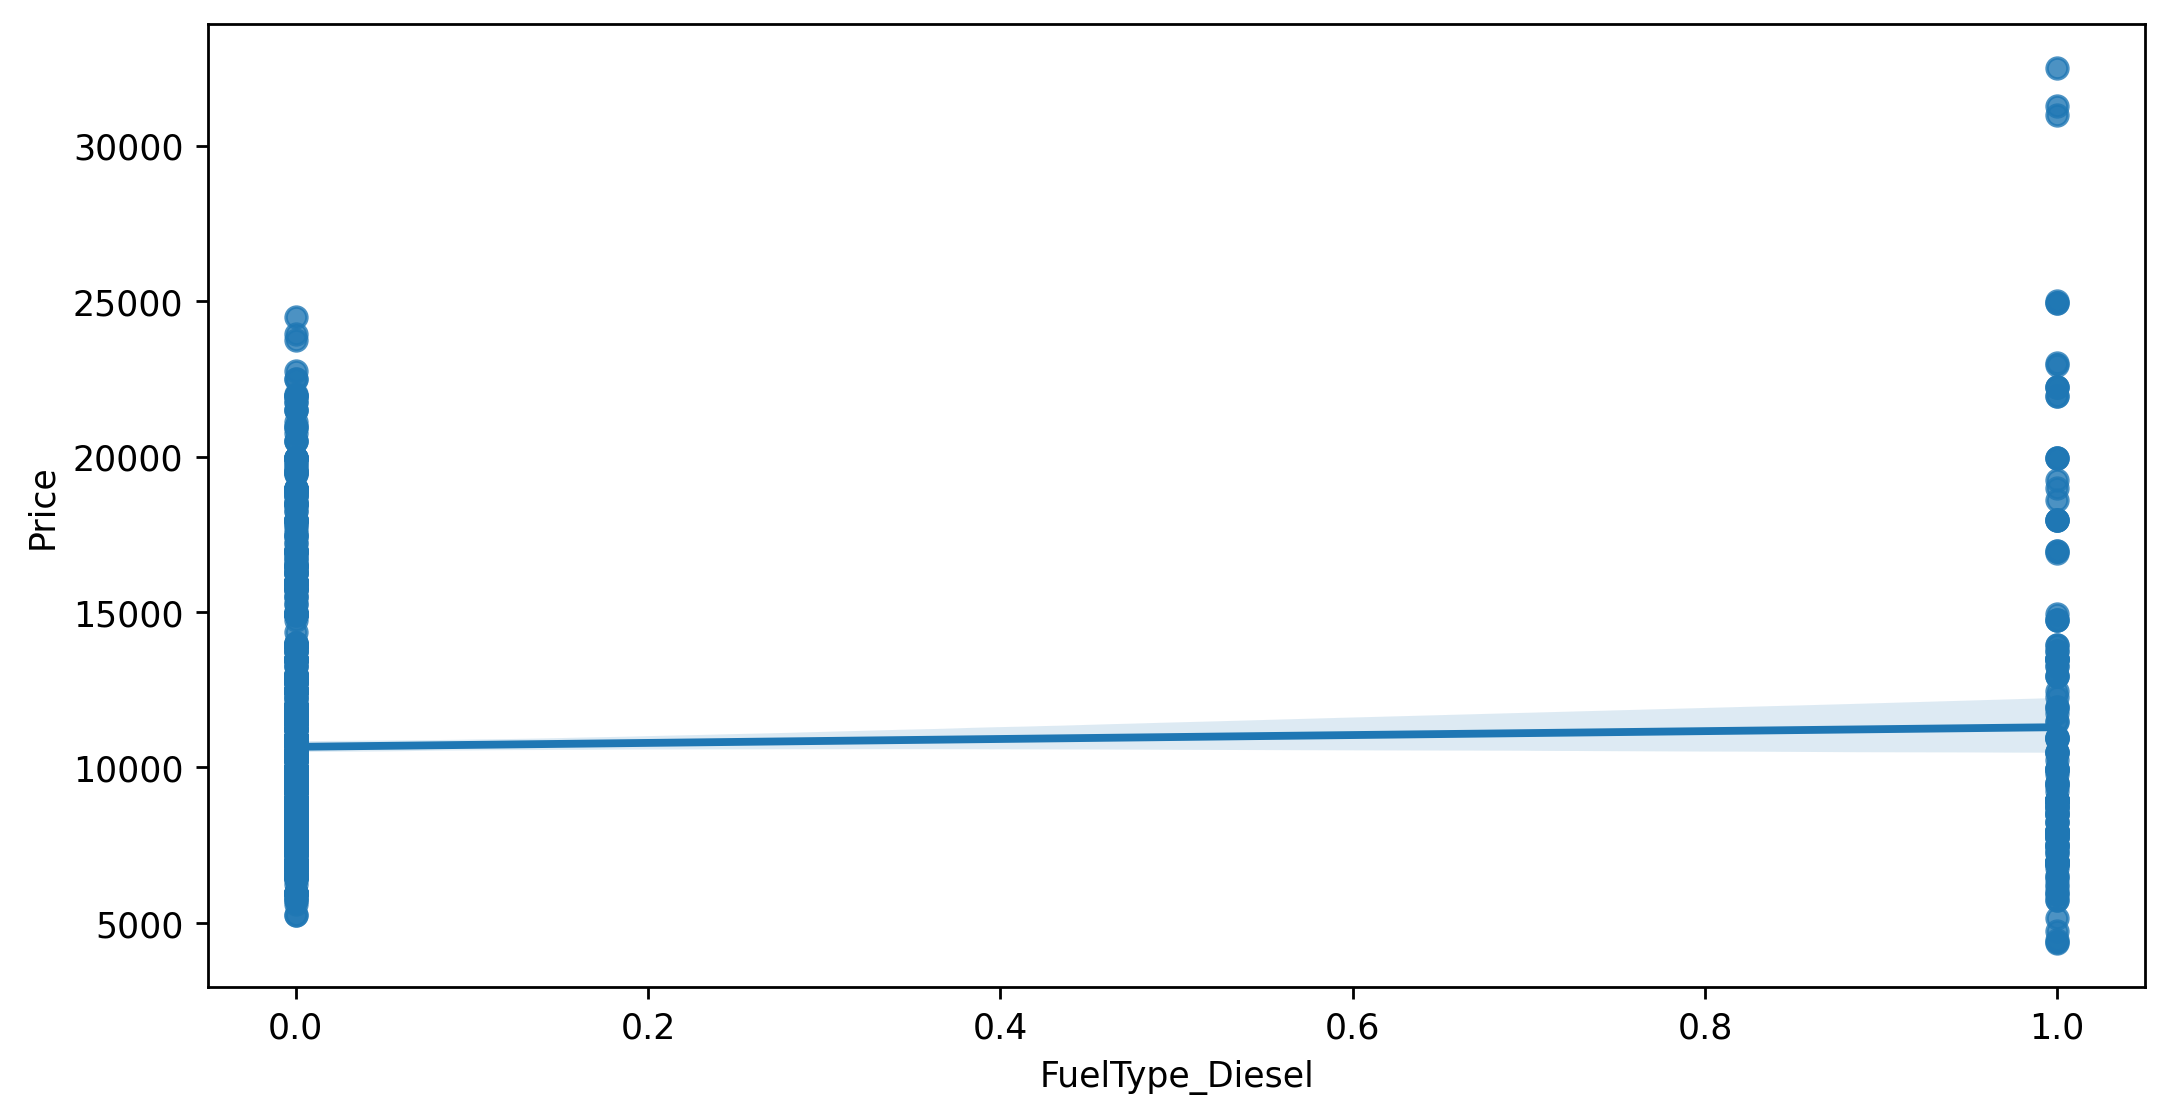

In [16]:
#sns.set(style='ticks',color_codes=True)
for column in data.columns[:-1]:
    sns.regplot(x=column,y='Price',data=data)
    plt.show()
    

- By observing regplots between independent columns and dependent columns ,we can drop metcolor,Automatics and doors they are not contributing to dependent column.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            1436 non-null   int64
 1   Age              1436 non-null   int64
 2   KM               1436 non-null   int64
 3   HP               1436 non-null   int64
 4   MetColor         1436 non-null   int64
 5   Automatic        1436 non-null   int64
 6   CC               1436 non-null   int64
 7   Doors            1436 non-null   int64
 8   Weight           1436 non-null   int64
 9   FuelType_CNG     1436 non-null   uint8
 10  FuelType_Diesel  1436 non-null   uint8
 11  FuelType_Petrol  1436 non-null   uint8
dtypes: int64(9), uint8(3)
memory usage: 105.3 KB


- Data.info shows there is no null values in data.

In [18]:
#myformula = 'Price~Age'
model = smf.ols('Price~KM',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          1.76e-124
Time:                        15:18:25   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model = smf.ols('Price~HP',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.93e-34
Time:                        15:18:25   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = smf.ols('Price~Doors',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.46e-12
Time:                        15:18:25   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model = smf.ols('Price~Weight',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          1.63e-130
Time:                        15:18:25   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model = smf.ols('Price~MetColor',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     17.21
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           3.54e-05
Time:                        15:18:25   Log-Likelihood:                -13798.
No. Observations:                1436   AIC:                         2.760e+04
Df Residuals:                    1434   BIC:                         2.761e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.016e+04    166.896     60.889      0.000    9834.661    1.05e+04
MetColor     842.8941    203.171      4.149      0.000     444.351    1241.437
==============================================================================
Omnibus:                      481.682   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.695
Skew:                           1.685   Prob(JB):                         0.00
Kurtosis:                       6.749   Cond. No.                         3.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model = smf.ols('Price~Automatic',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.571
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.210
Time:                        15:18:25   Log-Likelihood:                -13806.
No. Observations:                1436   AIC:                         2.762e+04
Df Residuals:                    1434   BIC:                         2.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.07e+04     98.475    108.674      0.000    1.05e+04    1.09e+04
Automatic    522.9333    417.214      1.253      0.210    -295.483    1341.349
==============================================================================
Omnibus:                      486.379   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1531.681
Skew:                           1.705   Prob(JB):                         0.00
Kurtosis:                       6.738   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model = smf.ols('Price~CC',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     40.17
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           3.12e-10
Time:                        15:18:25   Log-Likelihood:                -13787.
No. Observations:                1436   AIC:                         2.758e+04
Df Residuals:                    1434   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5719.4169    796.345      7.182      0.000    4157.291    7281.543
CC             3.1984      0.505      6.338      0.000       2.208       4.188
==============================================================================
Omnibus:                      408.630   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1064.115
Skew:                           1.500   Prob(JB):                    8.52e-232
Kurtosis:                       5.963   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
models = smf.ols('Price~ Age+KM+HP+MetColor+Automatic+CC+Doors+Weight',data=data).fit()

In [26]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1147.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:18:25   Log-Likelihood:                -12367.
No. Observations:                1436   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6033.3026   1004.680     -6.005      0.000   -8004.110   -4062.495
Age         -122.4717      2.623    -46.684      0.000    -127.618    -117.325
KM            -0.0166      0.001    -12.829      0.000      -0.019      -0.014
HP            32.7550      2.547     12.860      0.000      27.759      37.751
MetColor      36.5444     75.934      0.481      0.630    -112.409     185.498
Automatic    194.1748    157.233      1.235      0.217    -114.258     502.607
CC            -1.6315      0.281     -5.806      0.000      -2.183      -1.080
Doors        -57.0412     39.281     -1.452      0.147    -134.095      20.013
Weight        22.5459      1.082     20.845      0.000      20.424      24.668
==============================================================================
Omnibus:                      348.684   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4437.593
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                      11.478   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Models shows the 86% of accuracy ,here rsquared and adjusted rsquared value are same.

In [27]:
def cap_outliers(columns):
    Q1 = data[columns].quantile(0.25)
    print("Q1:", Q1)
    Q3 = data[columns].quantile(0.75)
    print("Q3:", Q3)
    IQR = Q3 -Q1
    print("IQR:",IQR)
    lower_bound = Q1-IQR * 1.5
    print("lower_bound:",lower_bound)
    upper_bound = Q3+IQR * 1.5
    print("upper_bound:",upper_bound)
    data[columns] = data[columns].clip(lower_bound,upper_bound)
    

In [28]:
cap_outliers('Age')

Q1: 44.0
Q3: 70.0
IQR: 26.0
lower_bound: 5.0
upper_bound: 109.0


In [29]:
cap_outliers('KM')

Q1: 43000.0
Q3: 87020.75
IQR: 44020.75
lower_bound: -23031.125
upper_bound: 153051.875


In [91]:
cap_outliers('Weight')

Q1: 1040.0
Q3: 1085.0
IQR: 45.0
lower_bound: 972.5
upper_bound: 1152.5


 # Calculate Vif

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [31]:
variables = data[['Price','Age','KM','HP','MetColor','Automatic','CC','Doors','Weight']]
variables

Price   Age       KM   HP  MetColor  Automatic    CC  Doors  Weight
0     13500  23.0  46986.0   90         1          0  2000      3    1165
1     13750  23.0  72937.0   90         1          0  2000      3    1165
2     13950  24.0  41711.0   90         1          0  2000      3    1165
3     14950  26.0  48000.0   90         0          0  2000      3    1165
4     13750  30.0  38500.0   90         0          0  2000      3    1170
...     ...   ...      ...  ...       ...        ...   ...    ...     ...
1431   7500  69.0  20544.0   86         1          0  1300      3    1025
1432  10845  72.0  19000.0   86         0          0  1300      3    1015
1433   8500  71.0  17016.0   86         0          0  1300      3    1015
1434   7250  70.0  16916.0   86         1          0  1300      3    1015
1435   6950  76.0      1.0  110         0          0  1600      5    1114

[1436 rows x 9 columns]

In [32]:
data.head()

Price   Age       KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500  23.0  46986.0  90         1          0  2000      3    1165   
1  13750  23.0  72937.0  90         1          0  2000      3    1165   
2  13950  24.0  41711.0  90         1          0  2000      3    1165   
3  14950  26.0  48000.0  90         0          0  2000      3    1165   
4  13750  30.0  38500.0  90         0          0  2000      3    1170   

   FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0             0                1                0  
1             0                1                0  
2             0                1                0  
3             0                1                0  
4             0                1                0

In [33]:
variables.values

array([[1.3500e+04, 2.3000e+01, 4.6986e+04, ..., 2.0000e+03, 3.0000e+00,
        1.1650e+03],
       [1.3750e+04, 2.3000e+01, 7.2937e+04, ..., 2.0000e+03, 3.0000e+00,
        1.1650e+03],
       [1.3950e+04, 2.4000e+01, 4.1711e+04, ..., 2.0000e+03, 3.0000e+00,
        1.1650e+03],
       ...,
       [8.5000e+03, 7.1000e+01, 1.7016e+04, ..., 1.3000e+03, 3.0000e+00,
        1.0150e+03],
       [7.2500e+03, 7.0000e+01, 1.6916e+04, ..., 1.3000e+03, 3.0000e+00,
        1.0150e+03],
       [6.9500e+03, 7.6000e+01, 1.0000e+00, ..., 1.6000e+03, 5.0000e+00,
        1.1140e+03]])

In [34]:
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [35]:
vif

VIF
0   70.218535
1   46.475717
2   10.040838
3   56.351929
4    3.124592
5    1.091711
6  136.944828
7   20.996209
8  381.771641

In [36]:
data.shape

(1436, 12)

In [37]:
vif['features']=variables.columns
vif

VIF   features
0   70.218535      Price
1   46.475717        Age
2   10.040838         KM
3   56.351929         HP
4    3.124592   MetColor
5    1.091711  Automatic
6  136.944828         CC
7   20.996209      Doors
8  381.771641     Weight

# Subset Selection

In [38]:
models.rsquared,models.aic

(0.8654037755238915, 24751.674458043868)

# Model Validation Techniques

In [39]:
import statsmodels.api as sm

In [40]:
models.resid

0      -2686.384555
1      -2005.759421
2      -2201.445070
3       -815.599037
4      -1796.082636
           ...     
1431   -1346.103390
1432    2602.693966
1433     102.300247
1434   -1308.375231
1435   -3532.298038
Length: 1436, dtype: float64

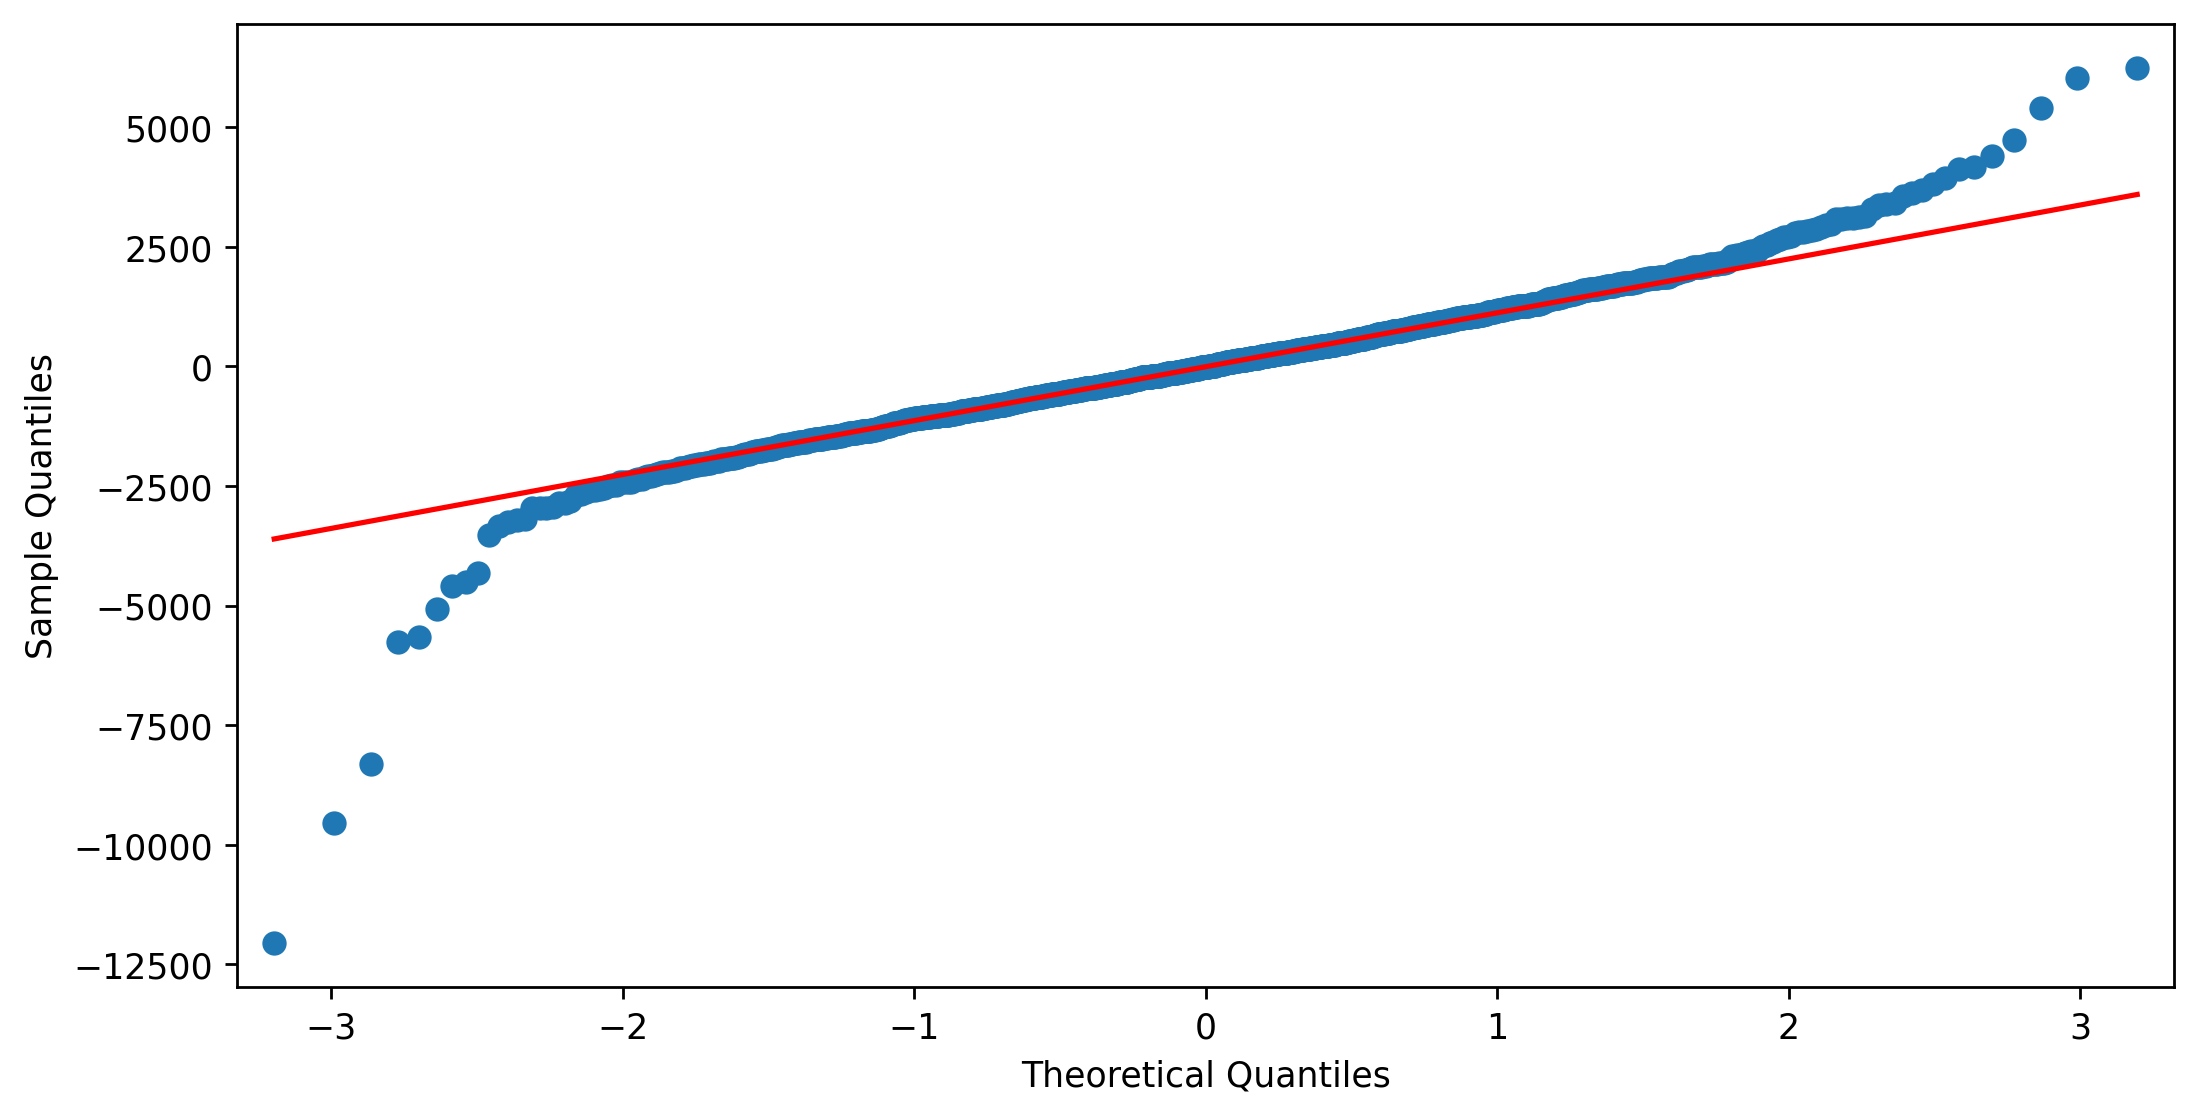

In [41]:
sm.qqplot(models.resid,line='q');

In [42]:
np.where(models.resid>5000)

(array([109, 147, 523], dtype=int64),)

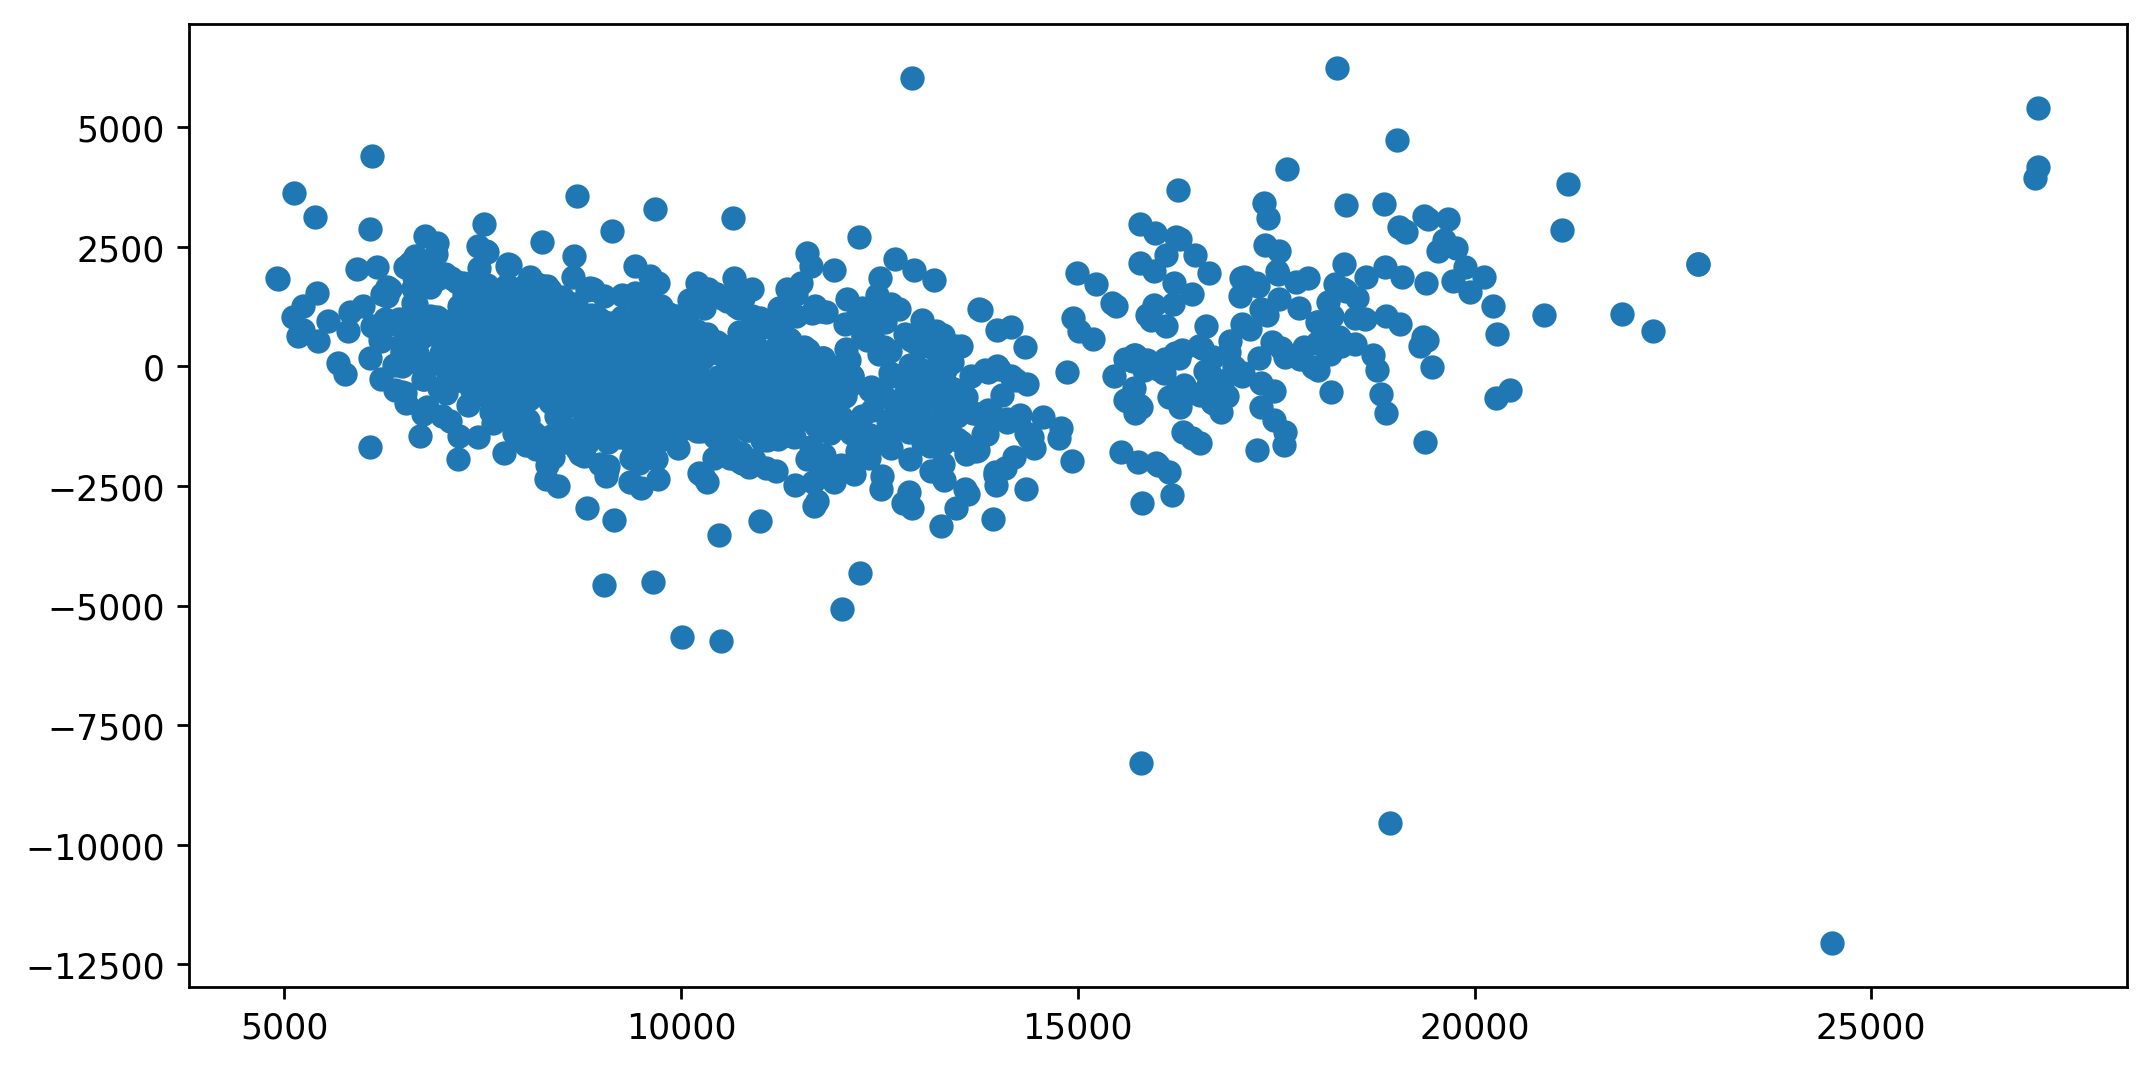

In [43]:
plt.scatter(models.fittedvalues,models.resid)

eval_env: 1


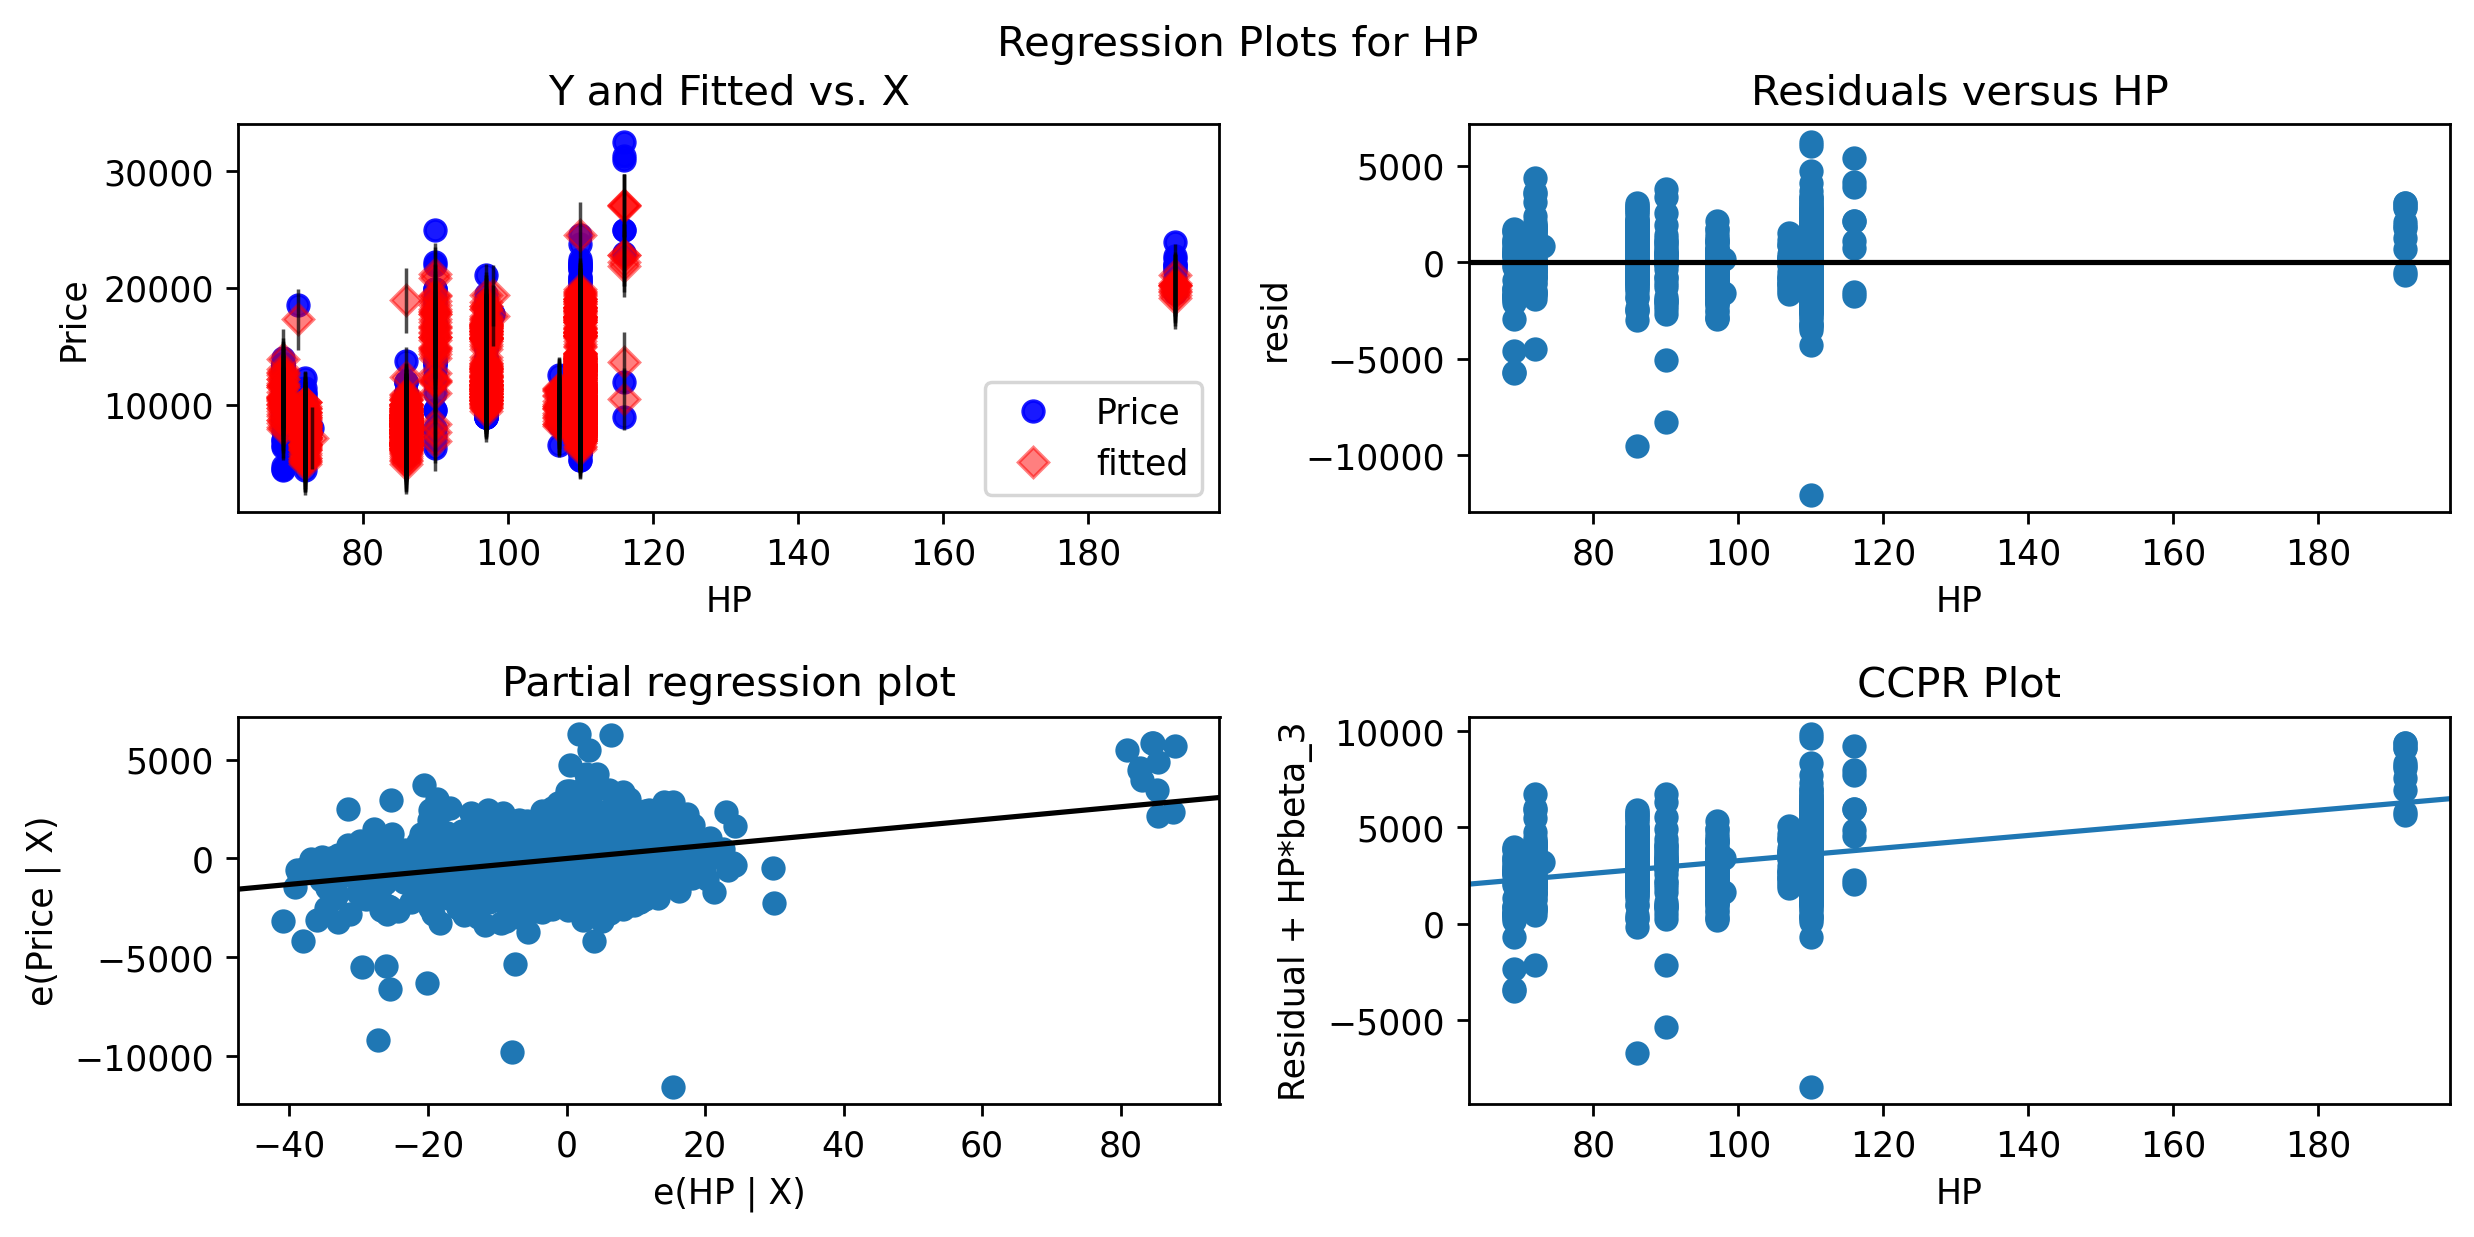

In [44]:
sm.graphics.plot_regress_exog(models,'HP');

eval_env: 1


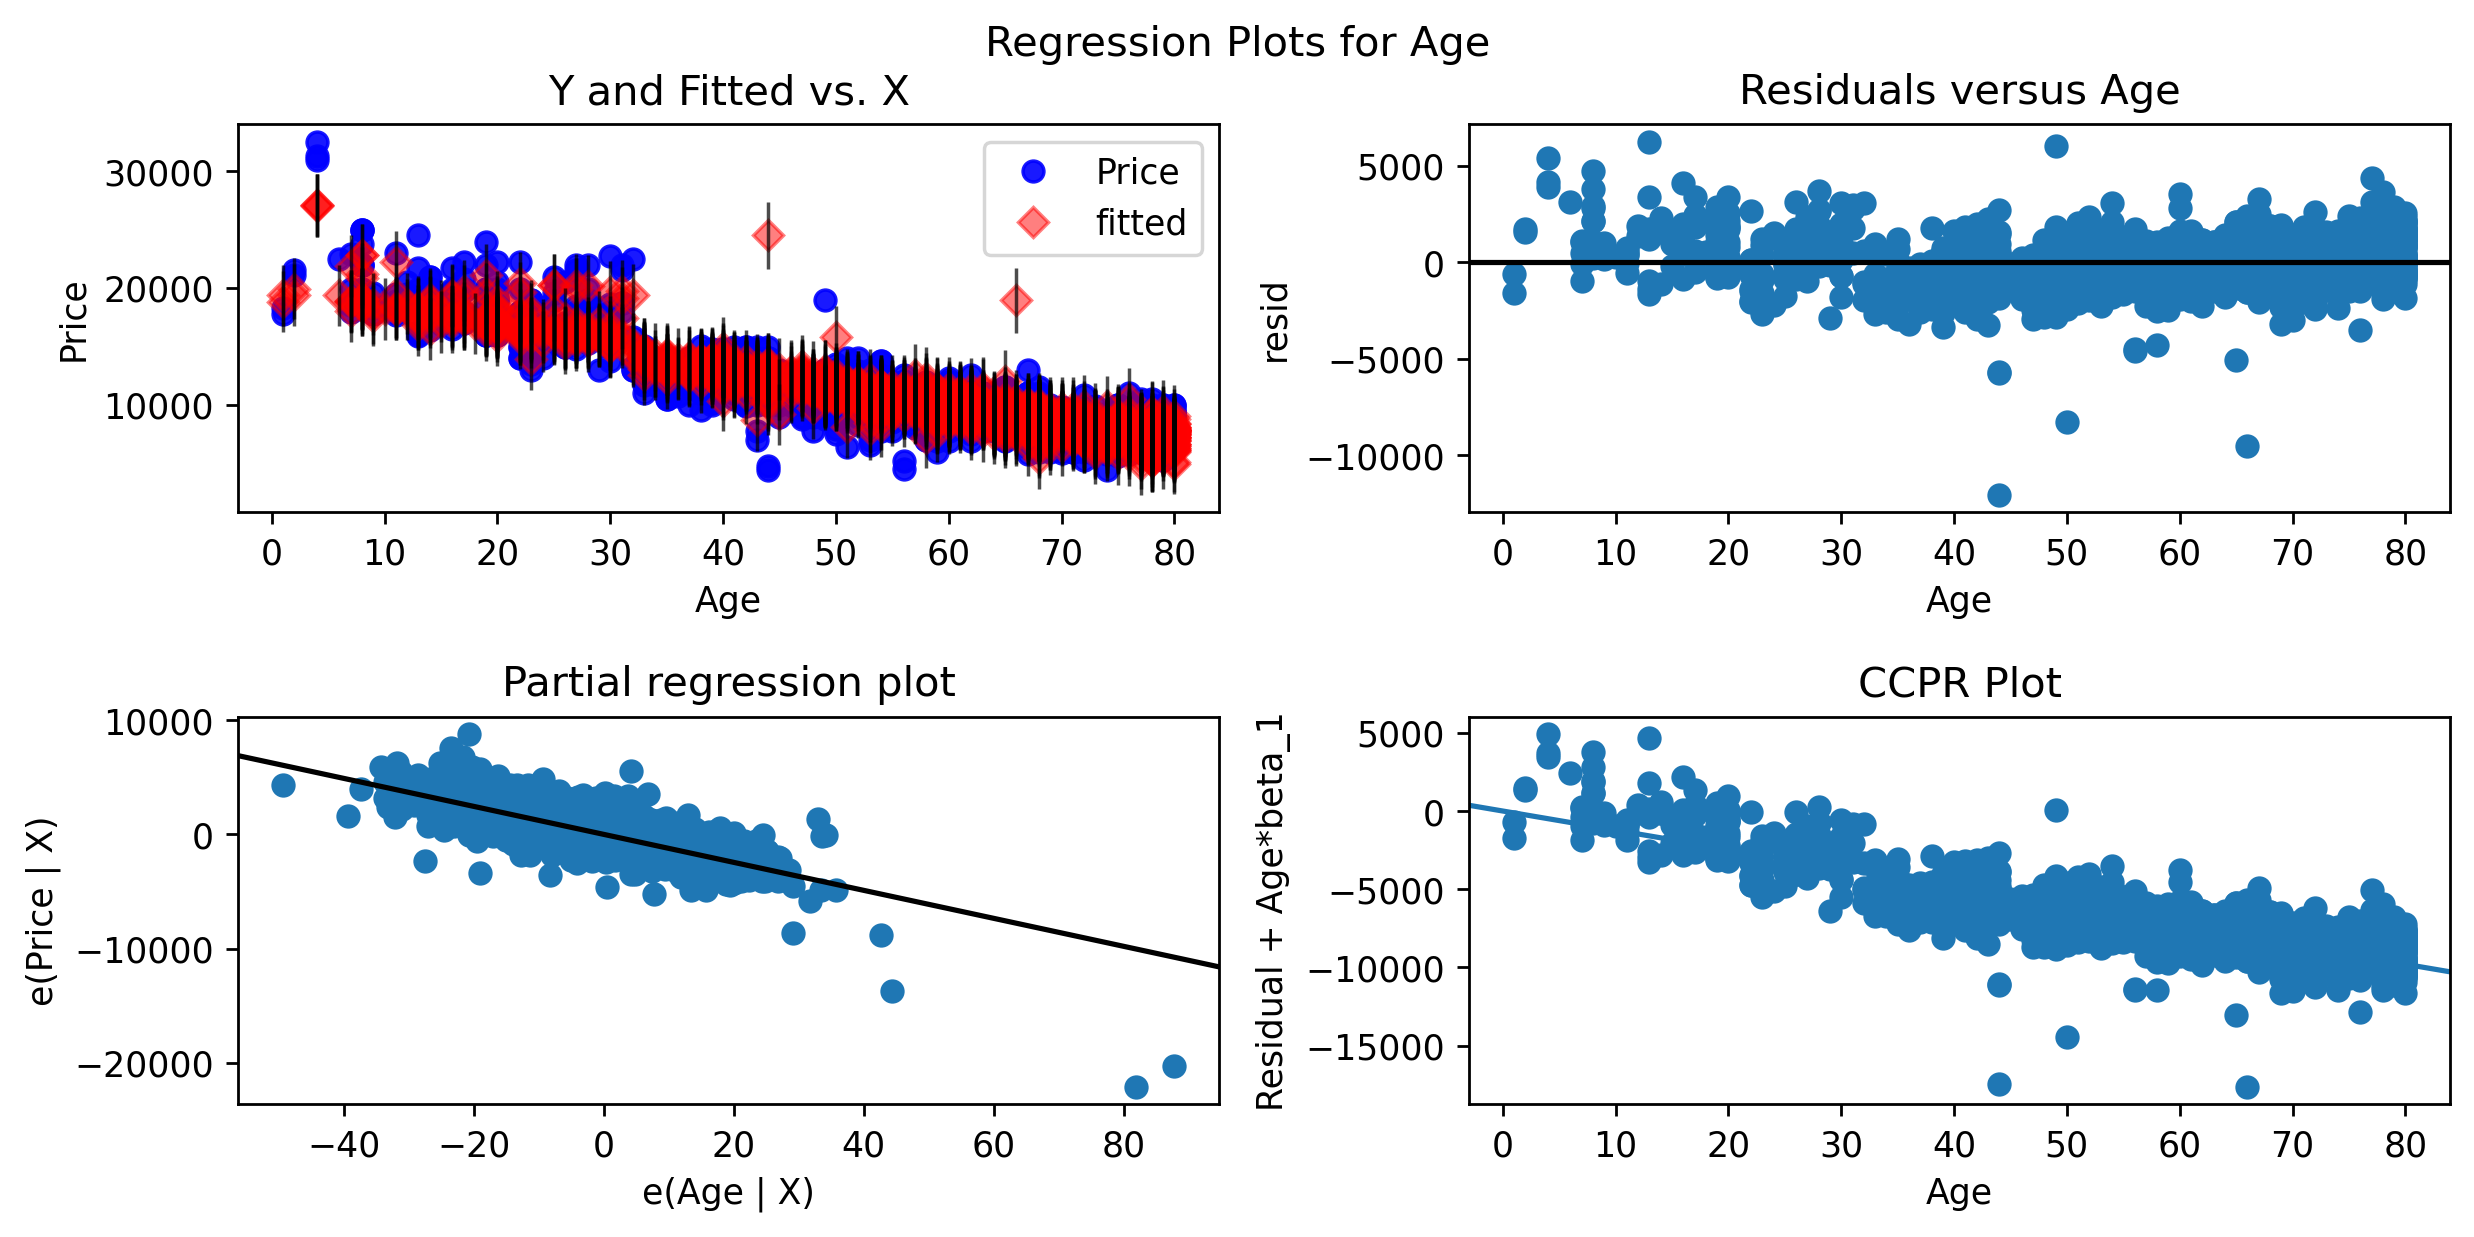

In [45]:
sm.graphics.plot_regress_exog(models,'Age');

In [46]:
inf = models.get_influence()
c,p = inf.cooks_distance

In [47]:
c

array([4.32201792e-03, 2.22816708e-03, 2.97303686e-03, ...,
       5.20330256e-06, 7.55319972e-04, 1.05141173e-02])

<StemContainer object of 3 artists>

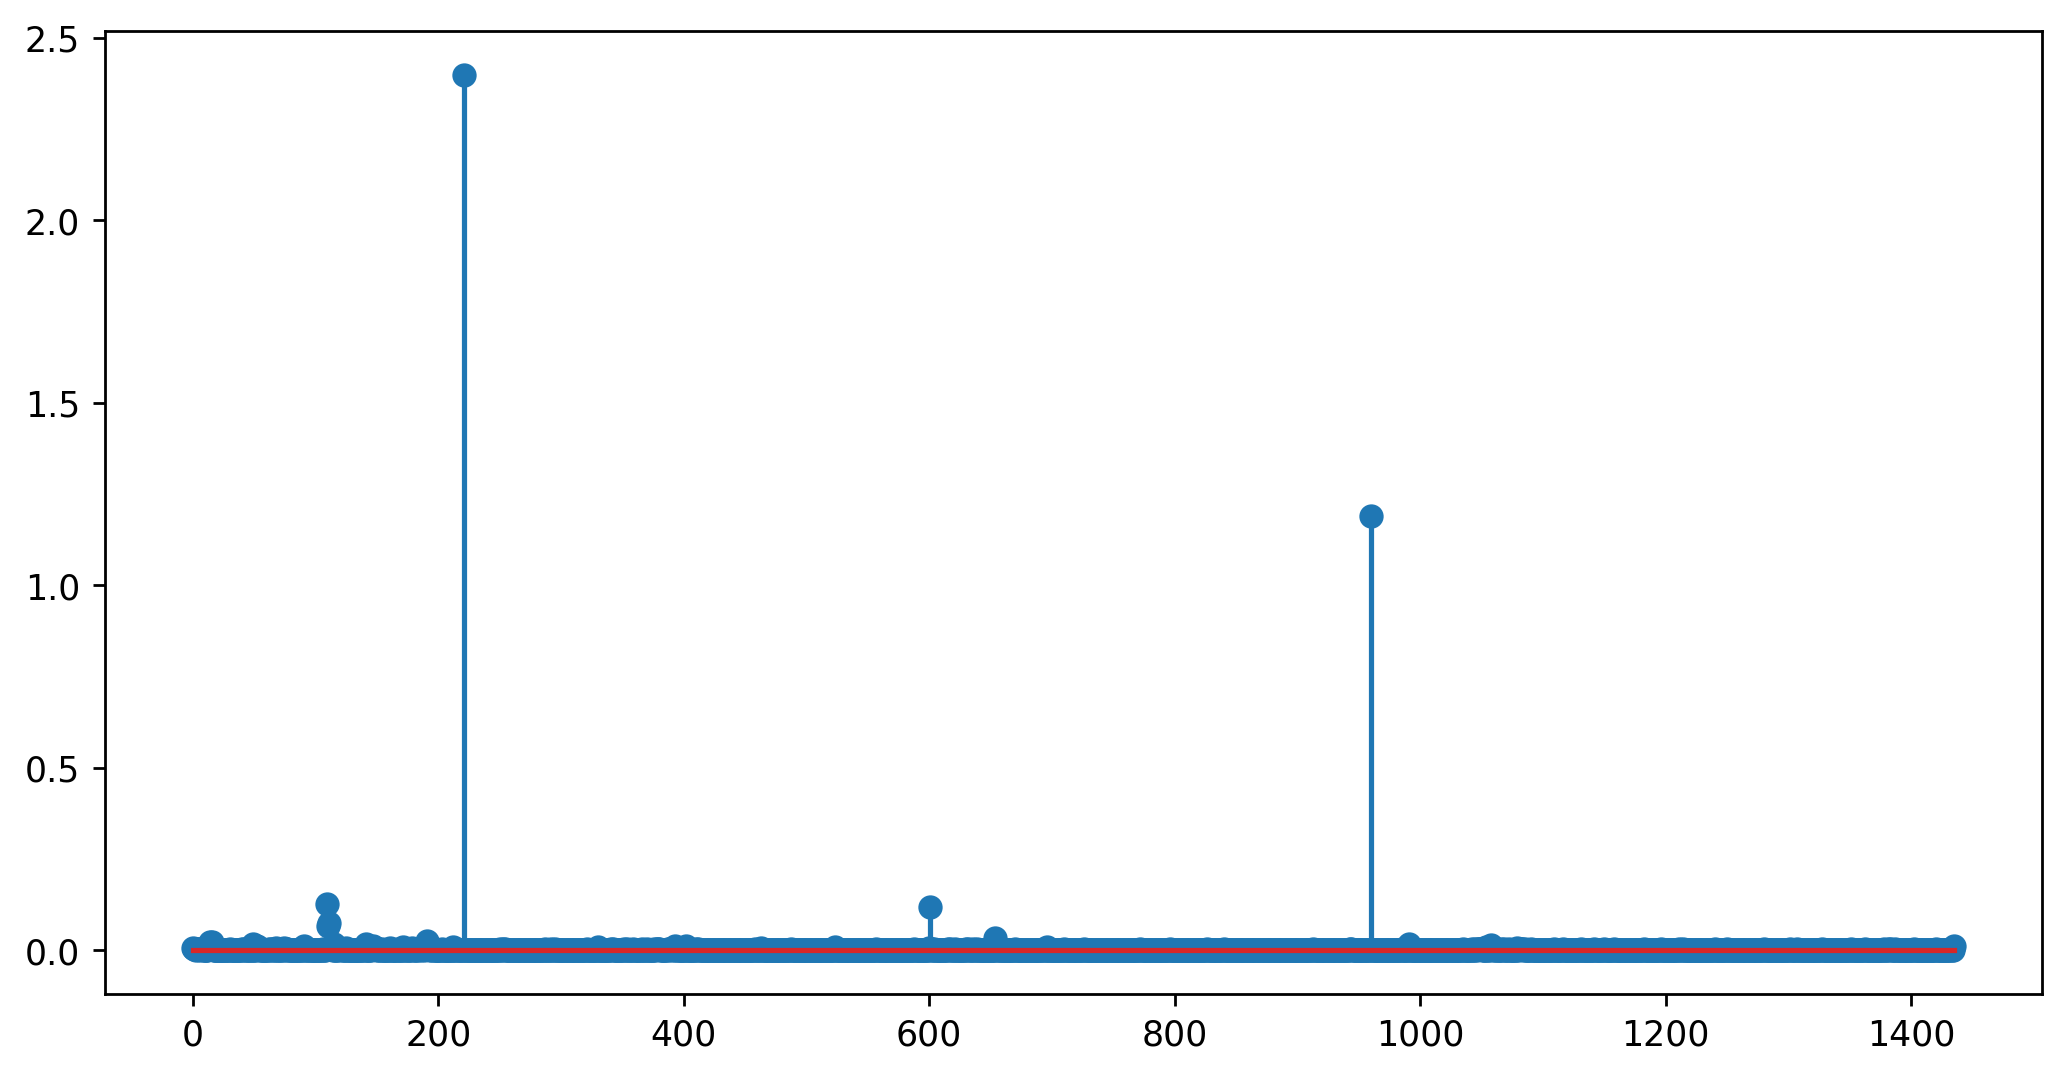

In [48]:
plt.stem(c)

In [49]:
np.argmax(c),np.max(c)

(221, 2.3982514647831854)

In [50]:
data.iloc[[221]]

Price   Age       KM   HP  MetColor  Automatic    CC  Doors  Weight  \
221  12450  44.0  74172.0  110         1          0  1600      5    1615   

     FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
221             0                0                1

In [51]:
data.head()

Price   Age       KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500  23.0  46986.0  90         1          0  2000      3    1165   
1  13750  23.0  72937.0  90         1          0  2000      3    1165   
2  13950  24.0  41711.0  90         1          0  2000      3    1165   
3  14950  26.0  48000.0  90         0          0  2000      3    1165   
4  13750  30.0  38500.0  90         0          0  2000      3    1170   

   FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0             0                1                0  
1             0                1                0  
2             0                1                0  
3             0                1                0  
4             0                1                0

In [52]:
from statsmodels.graphics.regressionplots import influence_plot

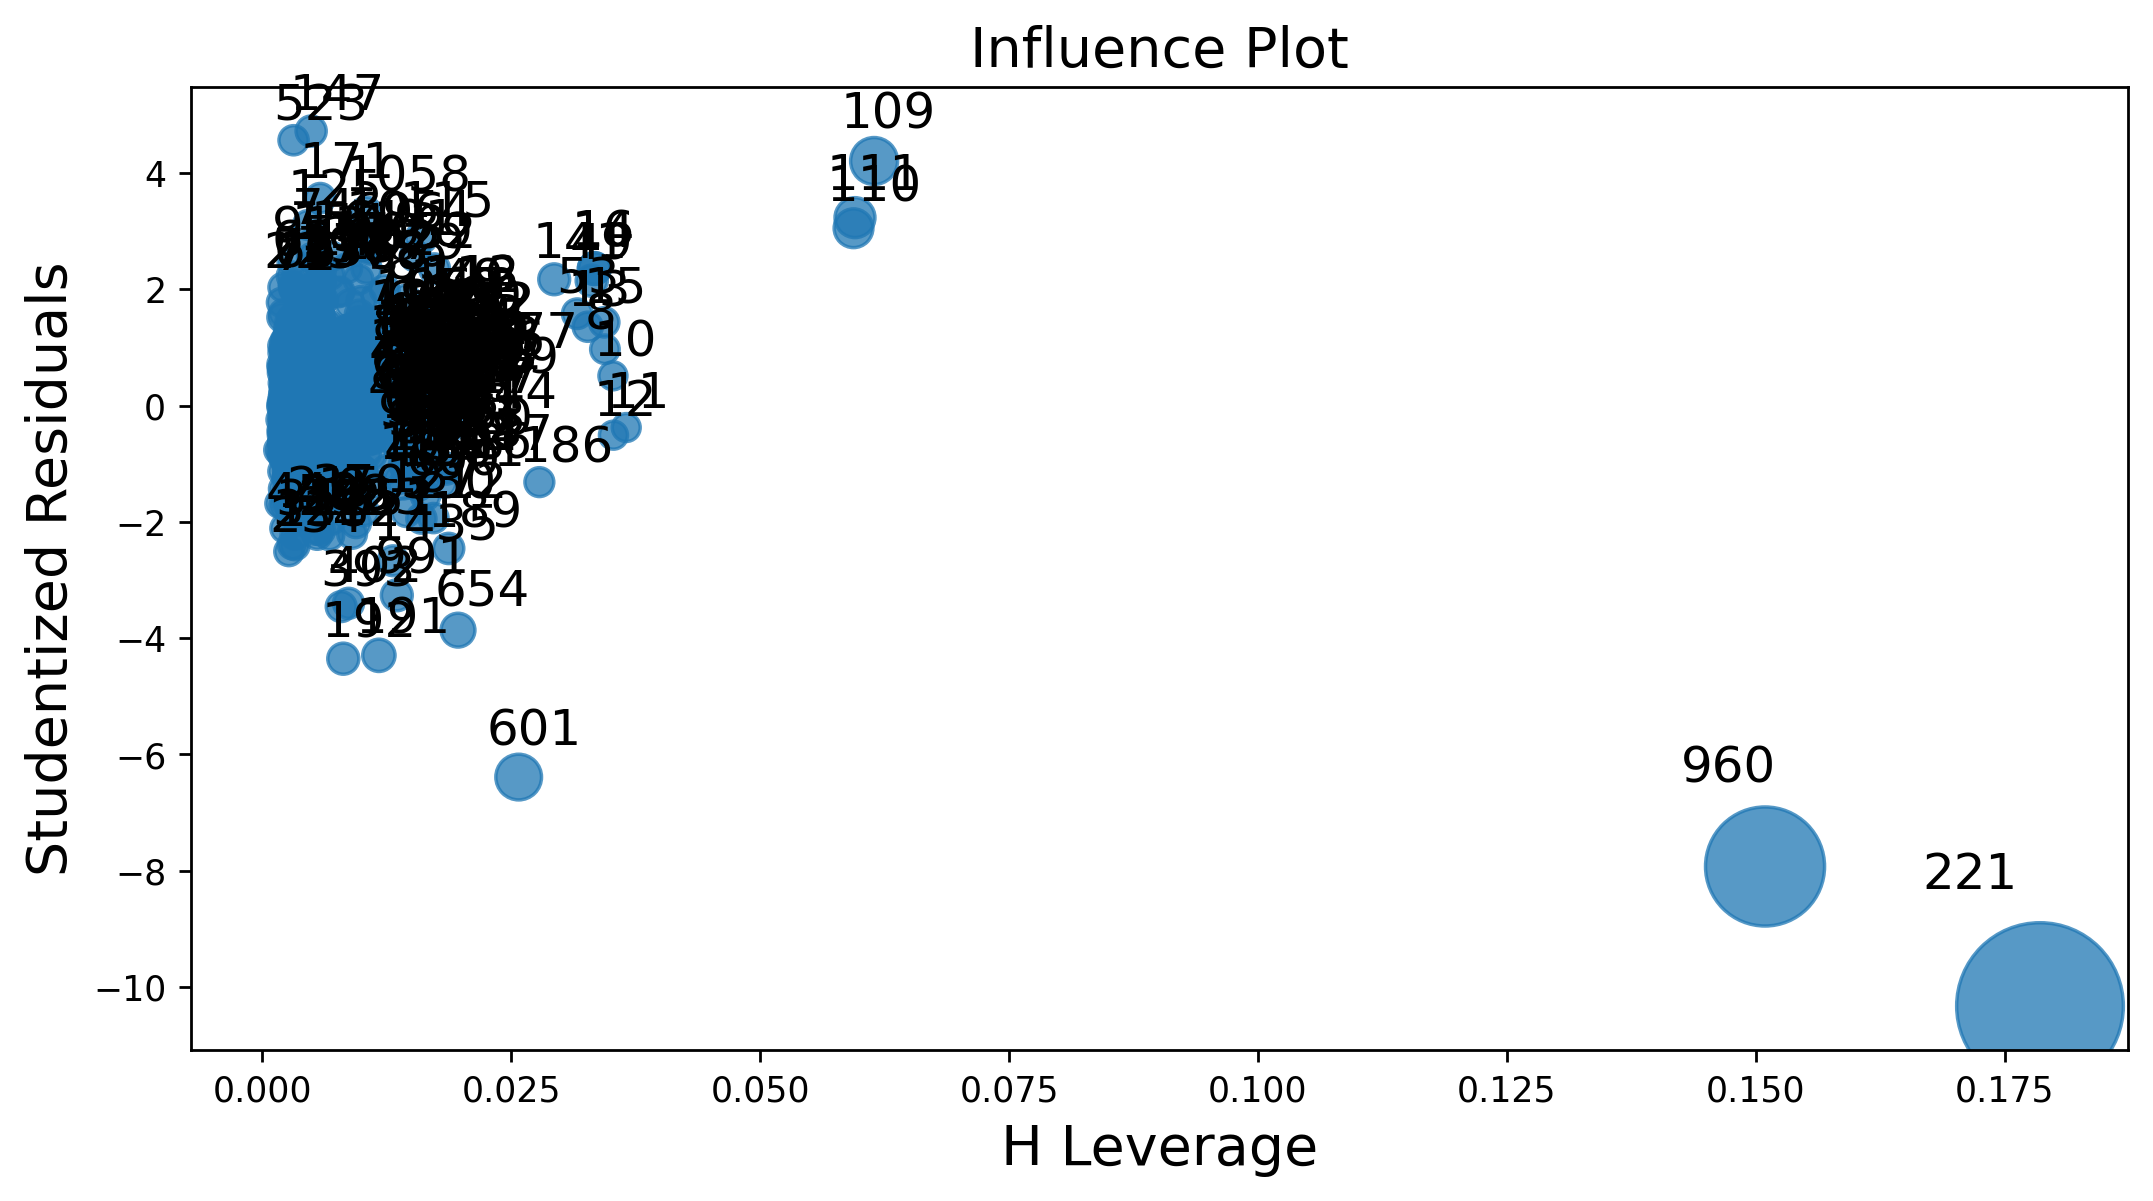

In [53]:
influence_plot(models);

In [54]:
k = len(data.columns)
n= len(data)

In [55]:
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.027158774373259052

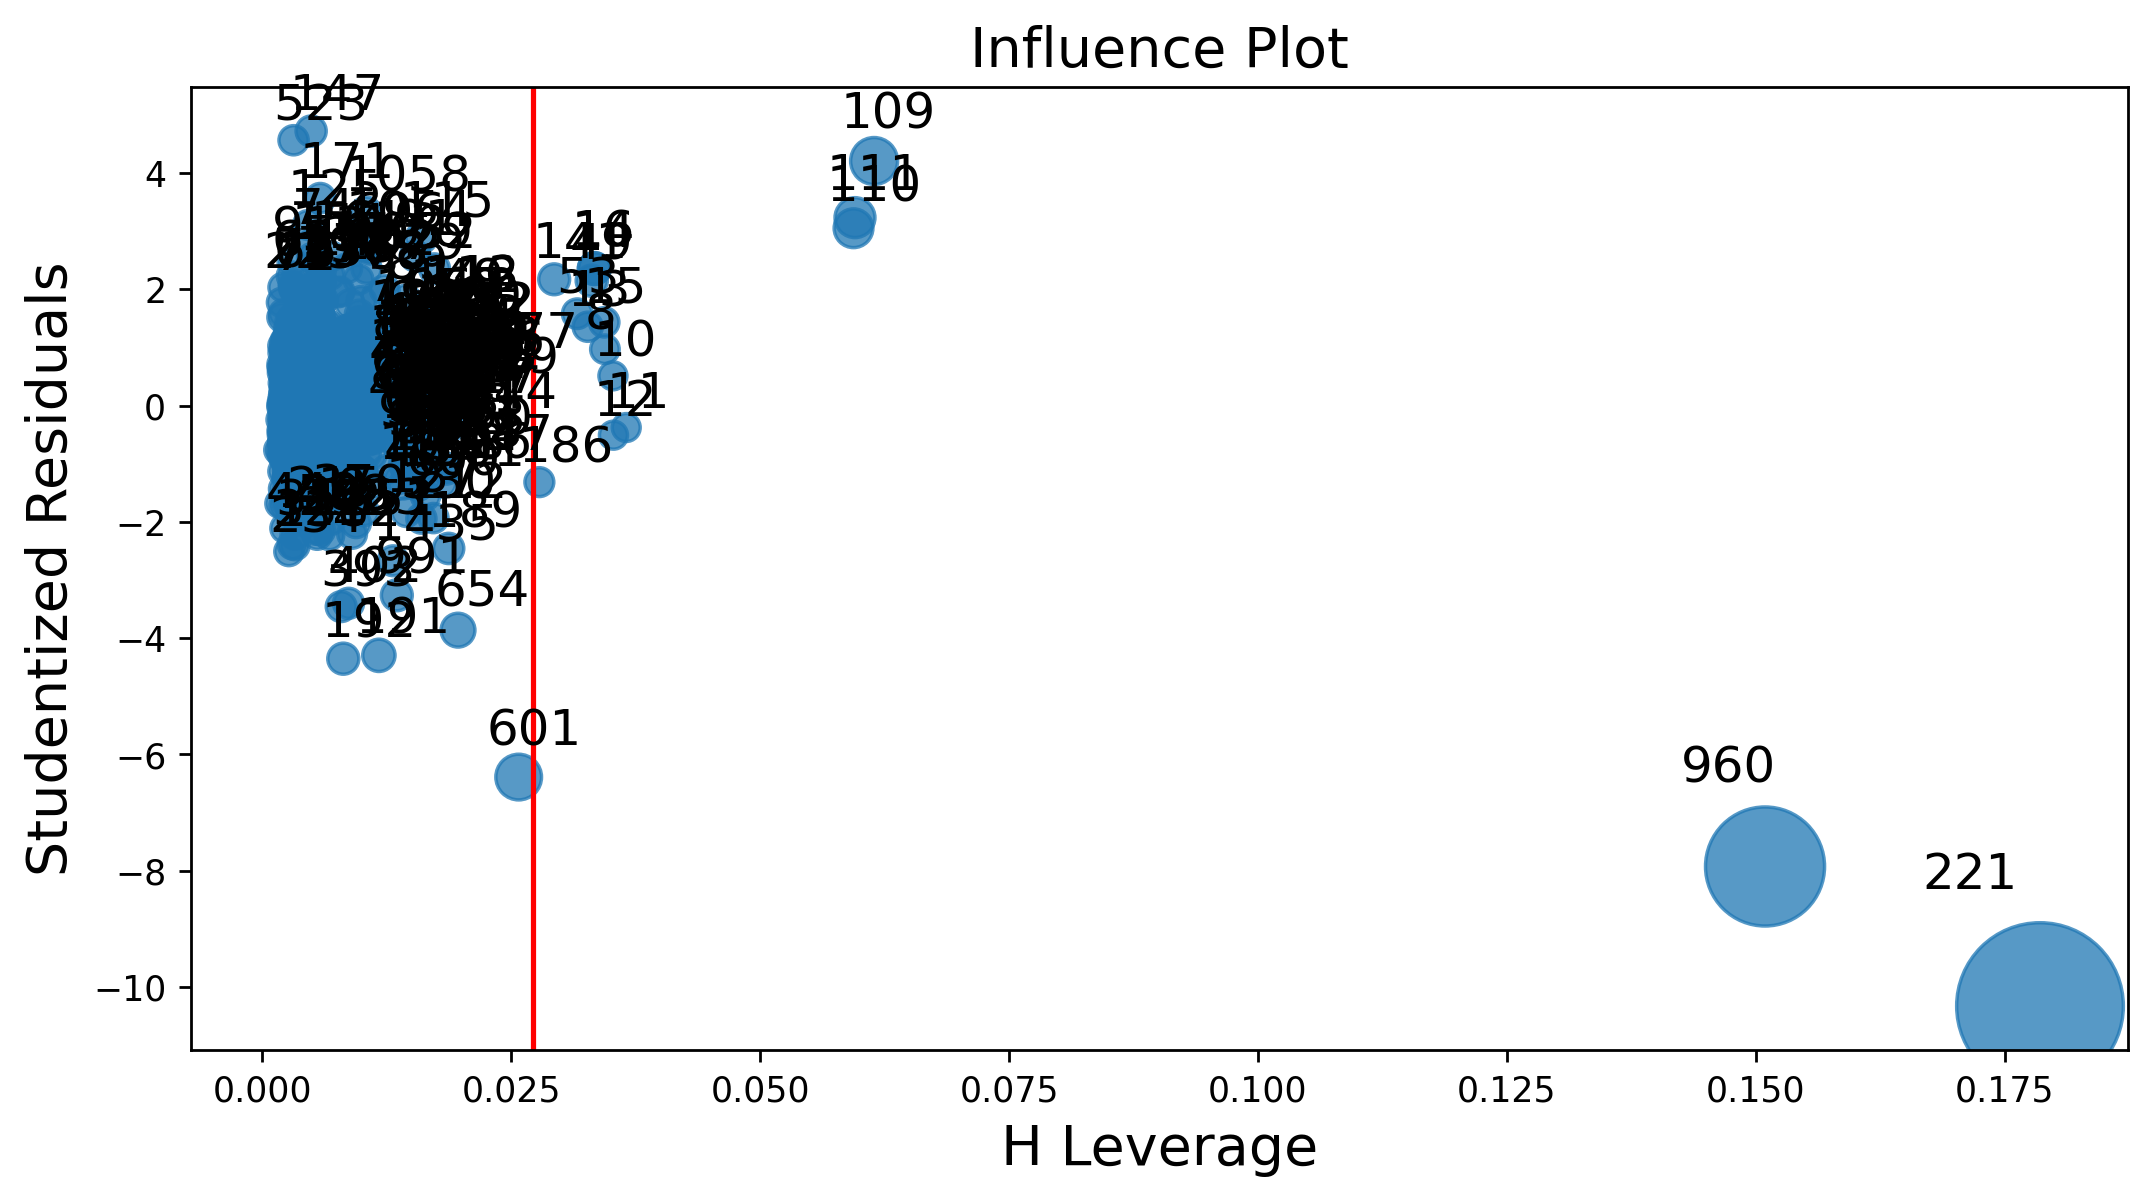

In [56]:
influence_plot(models)
plt.axvline(leverage_cutoff ,color='red')

In [57]:
df =data.drop(index=[221],inplace=True)

In [58]:
df

In [59]:
data.reset_index(inplace=True)

In [60]:
data

index  Price   Age       KM   HP  MetColor  Automatic    CC  Doors  \
0         0  13500  23.0  46986.0   90         1          0  2000      3   
1         1  13750  23.0  72937.0   90         1          0  2000      3   
2         2  13950  24.0  41711.0   90         1          0  2000      3   
3         3  14950  26.0  48000.0   90         0          0  2000      3   
4         4  13750  30.0  38500.0   90         0          0  2000      3   
...     ...    ...   ...      ...  ...       ...        ...   ...    ...   
1430   1431   7500  69.0  20544.0   86         1          0  1300      3   
1431   1432  10845  72.0  19000.0   86         0          0  1300      3   
1432   1433   8500  71.0  17016.0   86         0          0  1300      3   
1433   1434   7250  70.0  16916.0   86         1          0  1300      3   
1434   1435   6950  76.0      1.0  110         0          0  1600      5   

      Weight  FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0       1165             0                1                0  
1       1165             0                1                0  
2       1165             0                1                0  
3       1165             0                1                0  
4       1170             0                1                0  
...      ...           ...              ...              ...  
1430    1025             0                0                1  
1431    1015             0                0                1  
1432    1015             0                0                1  
1433    1015             0                0                1  
1434    1114             0                0                1  

[1435 rows x 13 columns]

In [61]:
data.drop(columns=['index'],inplace=True)

In [62]:
data

Price   Age       KM   HP  MetColor  Automatic    CC  Doors  Weight  \
0     13500  23.0  46986.0   90         1          0  2000      3    1165   
1     13750  23.0  72937.0   90         1          0  2000      3    1165   
2     13950  24.0  41711.0   90         1          0  2000      3    1165   
3     14950  26.0  48000.0   90         0          0  2000      3    1165   
4     13750  30.0  38500.0   90         0          0  2000      3    1170   
...     ...   ...      ...  ...       ...        ...   ...    ...     ...   
1430   7500  69.0  20544.0   86         1          0  1300      3    1025   
1431  10845  72.0  19000.0   86         0          0  1300      3    1015   
1432   8500  71.0  17016.0   86         0          0  1300      3    1015   
1433   7250  70.0  16916.0   86         1          0  1300      3    1015   
1434   6950  76.0      1.0  110         0          0  1600      5    1114   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0                0                1                0  
1                0                1                0  
2                0                1                0  
3                0                1                0  
4                0                1                0  
...            ...              ...              ...  
1430             0                0                1  
1431             0                0                1  
1432             0                0                1  
1433             0                0                1  
1434             0                0                1  

[1435 rows x 12 columns]

In [63]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1147.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:18:32   Log-Likelihood:                -12367.
No. Observations:                1436   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6033.3026   1004.680     -6.005      0.000   -8004.110   -4062.495
Age         -122.4717      2.623    -46.684      0.000    -127.618    -117.325
KM            -0.0166      0.001    -12.829      0.000      -0.019      -0.014
HP            32.7550      2.547     12.860      0.000      27.759      37.751
MetColor      36.5444     75.934      0.481      0.630    -112.409     185.498
Automatic    194.1748    157.233      1.235      0.217    -114.258     502.607
CC            -1.6315      0.281     -5.806      0.000      -2.183      -1.080
Doors        -57.0412     39.281     -1.452      0.147    -134.095      20.013
Weight        22.5459      1.082     20.845      0.000      20.424      24.668
==============================================================================
Omnibus:                      348.684   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4437.593
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                      11.478   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## prediction for new Records

In [64]:
data.head()

Price   Age       KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500  23.0  46986.0  90         1          0  2000      3    1165   
1  13750  23.0  72937.0  90         1          0  2000      3    1165   
2  13950  24.0  41711.0  90         1          0  2000      3    1165   
3  14950  26.0  48000.0  90         0          0  2000      3    1165   
4  13750  30.0  38500.0  90         0          0  2000      3    1170   

   FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0             0                1                0  
1             0                1                0  
2             0                1                0  
3             0                1                0  
4             0                1                0

In [65]:
newdf = pd.DataFrame({
    'Age':[23,22],
    'KM':[48080,48000],
    'HP':[80,73],
    'CC':[2000,2001],
    'MetColor':[1,0],
    'Automatic':[0,0],
    'Doors':[3,3],
    'Weight':[1165,1170]
    
})

In [66]:
models.predict(newdf)

0    15840.681213
1    15809.748930
dtype: float64

## Second Way

In [67]:

from sklearn.metrics import mean_squared_error

In [68]:
x = data.drop(columns=['Price'],axis=1)
y= data['Price']

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [70]:
xtrain

Age          KM   HP  MetColor  Automatic    CC  Doors  Weight  \
659   62.0  112000.000   72         0          0  2000      4    1135   
8     27.0   19700.000  192         0          0  1800      3    1185   
241   43.0   58277.000  110         1          0  1600      3    1045   
853   57.0   65000.000  110         0          0  1600      4    1035   
1330  75.0   65006.000   86         1          0  1300      3    1015   
...    ...         ...  ...       ...        ...   ...    ...     ...   
715   60.0   89576.000  110         0          0  1600      4    1035   
905   68.0   58860.000  110         1          0  1600      3    1055   
1096  74.0  124910.000   72         0          0  2000      5    1135   
235   44.0   60500.000  110         0          0  1600      5    1075   
1061  80.0  153051.875   86         0          0  1300      3    1015   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
659              0                1                0  
8                0                0                1  
241              0                0                1  
853              0                0                1  
1330             0                0                1  
...            ...              ...              ...  
715              0                0                1  
905              0                0                1  
1096             0                1                0  
235              0                0                1  
1061             0                0                1  

[1076 rows x 11 columns]

In [71]:
ytrain

659      7950
8       21500
241     11950
853      8950
1330     6950
        ...  
715      8750
905      9750
1096     7250
235     10950
1061     6750
Name: Price, Length: 1076, dtype: int64

In [72]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(x)

In [73]:
ypred

array([16258.50019945, 15846.92227229, 16222.34173122, ...,
        8368.80687081,  8611.56637686, 10479.65347296])

In [74]:
lr.score(xtrain,ytrain),lr.score(xtest,ytest)

(0.8711096847453565, 0.8903448373847365)

In [75]:
ypredtrain = lr.predict(xtrain)
ypredtest = lr.predict(xtest)

In [76]:
msetrain = print('mse value for train:',lr.score(xtrain,ypredtrain))

mse value for train: 1.0


In [77]:
msetest = print('mse value for test :',lr.score(xtest,ypredtest))

mse value for test : 1.0


# After Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()
x= sc.fit_transform(x)
x

array([[-1.77588643, -0.59341932, -0.76746519, ..., -0.109493  ,
         2.87368483, -2.70980133],
       [-1.77588643,  0.15362653, -0.76746519, ..., -0.109493  ,
         2.87368483, -2.70980133],
       [-1.72201822, -0.74526961, -0.76746519, ..., -0.109493  ,
         2.87368483, -2.70980133],
       ...,
       [ 0.80978739, -1.45615925, -1.03449861, ..., -0.109493  ,
        -0.34798527,  0.36903074],
       [ 0.75591919, -1.45903793, -1.03449861, ..., -0.109493  ,
        -0.34798527,  0.36903074],
       [ 1.07912842, -1.94596639,  0.56770187, ..., -0.109493  ,
        -0.34798527,  0.36903074]])

In [80]:
msetrain = print('mse value for train:',lr.score(xtrain,ypredtrain))

mse value for train: 1.0


In [81]:
msetest = print('mse value for train:',lr.score(xtest,ypredtest))

mse value for train: 1.0


In [82]:
data['ypred']=lr.predict(x)
data

Price   Age       KM   HP  MetColor  Automatic    CC  Doors  Weight  \
0     13500  23.0  46986.0   90         1          0  2000      3    1165   
1     13750  23.0  72937.0   90         1          0  2000      3    1165   
2     13950  24.0  41711.0   90         1          0  2000      3    1165   
3     14950  26.0  48000.0   90         0          0  2000      3    1165   
4     13750  30.0  38500.0   90         0          0  2000      3    1170   
...     ...   ...      ...  ...       ...        ...   ...    ...     ...   
1430   7500  69.0  20544.0   86         1          0  1300      3    1025   
1431  10845  72.0  19000.0   86         0          0  1300      3    1015   
1432   8500  71.0  17016.0   86         0          0  1300      3    1015   
1433   7250  70.0  16916.0   86         1          0  1300      3    1015   
1434   6950  76.0      1.0  110         0          0  1600      5    1114   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol        ypred  
0                0                1                0 -3525.419329  
1                0                1                0 -3525.431177  
2                0                1                0 -3531.871354  
3                0                1                0 -3803.790316  
4                0                1                0 -3827.177445  
...            ...              ...              ...          ...  
1430             0                0                1 -7645.982134  
1431             0                0                1 -7929.204481  
1432             0                0                1 -7922.749143  
1433             0                0                1 -7657.287439  
1434             0                0                1 -7980.216576  

[1435 rows x 13 columns]

In [83]:
data['error']= data['Price']-data['ypred']

In [84]:
data['error']

0       17025.419329
1       17275.431177
2       17481.871354
3       18753.790316
4       17577.177445
            ...     
1430    15145.982134
1431    18774.204481
1432    16422.749143
1433    14907.287439
1434    14930.216576
Name: error, Length: 1435, dtype: float64

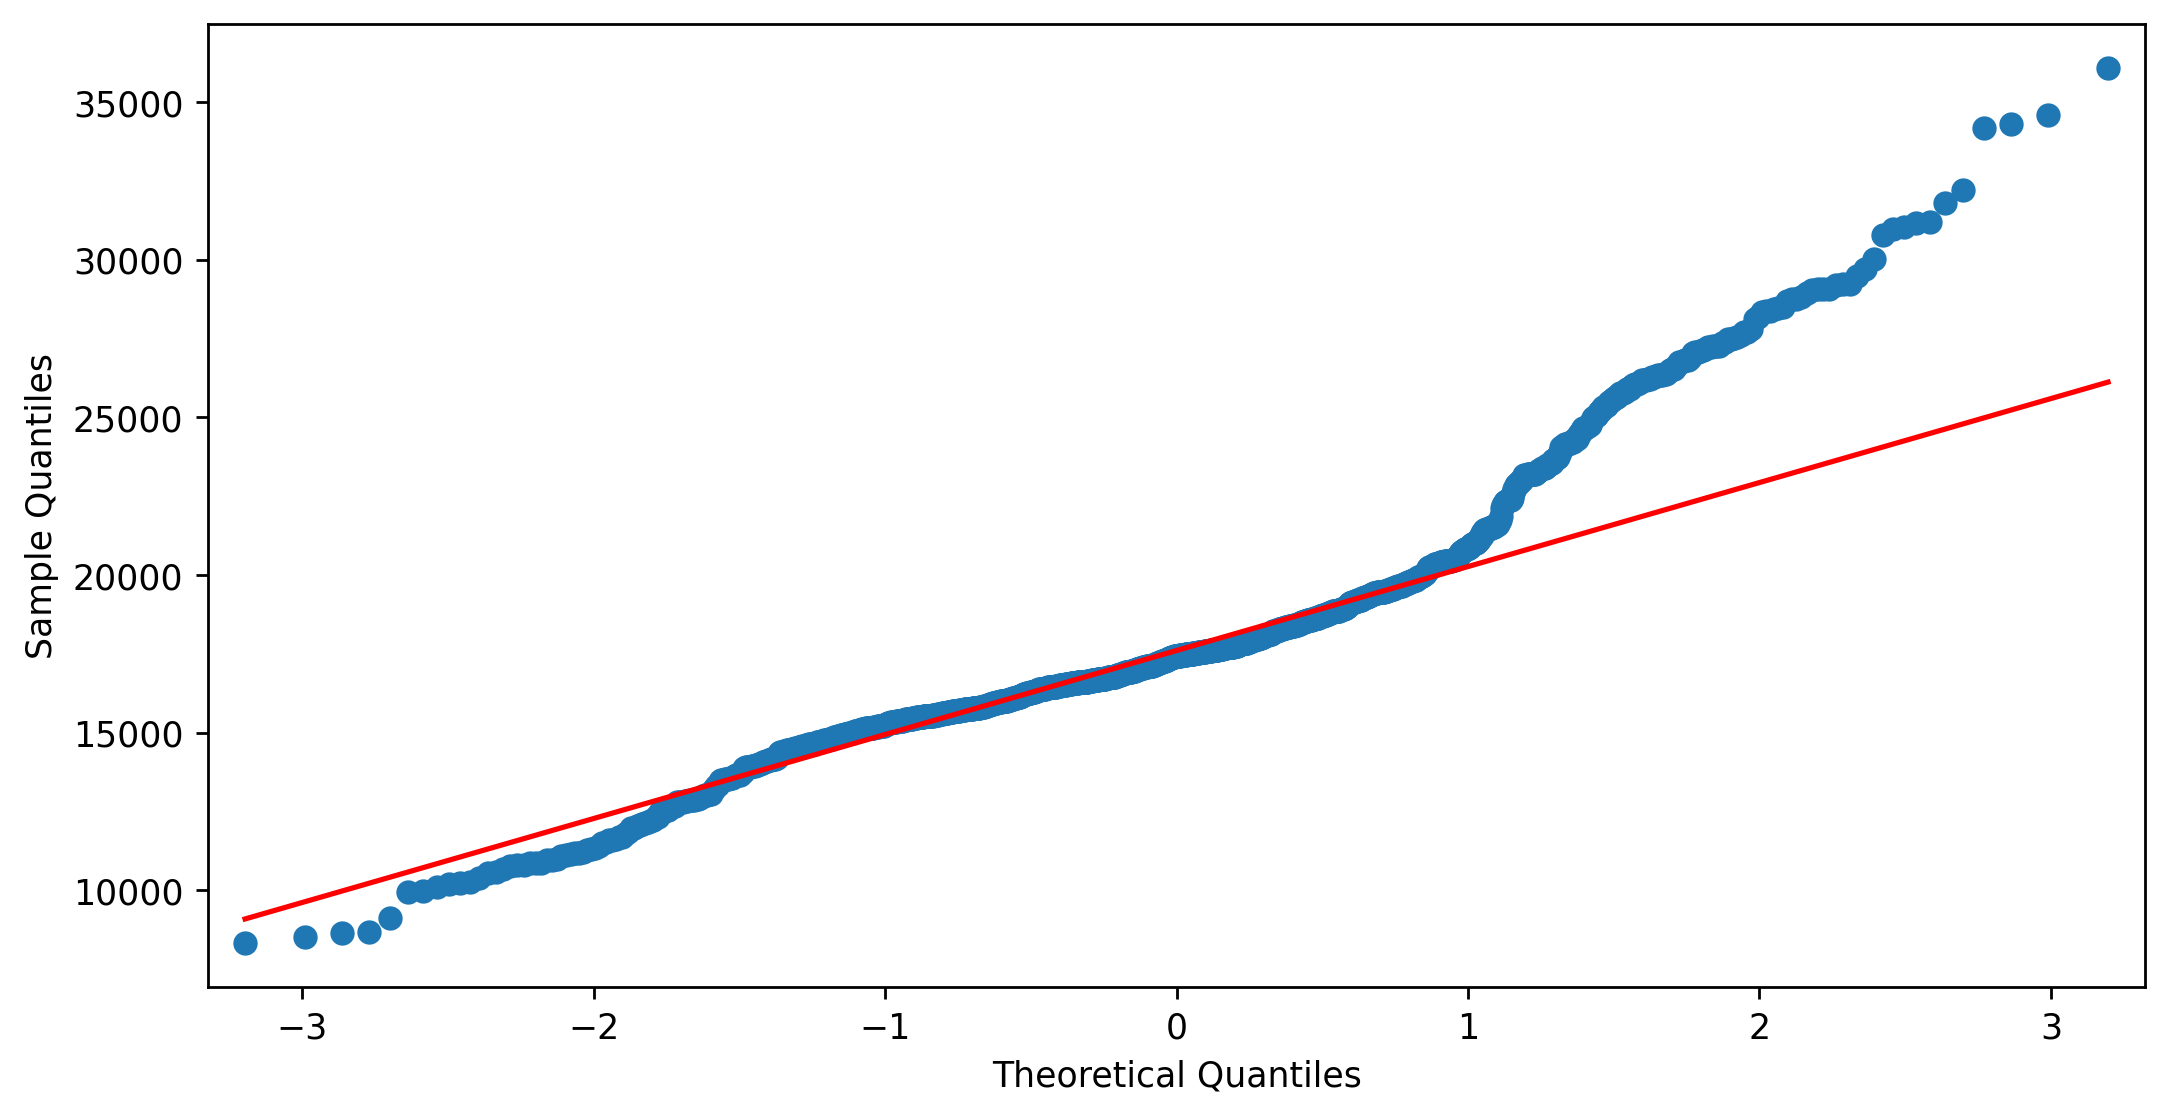

In [85]:
qqplot = sm.qqplot(data['error'],line='q')